In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
#import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import utils

import seaborn as sns

import CLO_SQL_Updated as cs



In [2]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
#file = 'EQ Comparison.xlsx'
#tab = 'bbTickers'


In [3]:
pd.options.display.precision
pd.options.display.float_format = '{:,.4f}'.format

6

# Straight from .GSGSS
PDSP .gsgss 

In [134]:
def read_bbGSSrpt():
    bbsheet = pd.read_excel(dirpath+'MasterMap4GSS_orig.xlsx',skiprows=9,sheet_name='Worksheet') #.dropna(subset=['Market Value %'])
    bbsheet = bbsheet.loc[~bbsheet['Security'].isin(['<Search>','Totals','Cash','EUR/CAD  3/24/2022','GBP/CAD  3/24/2022',
                                    'INR','USD','USD/CAD  3/24/2022','EUR/CAD  4/27/2022','GBP/CAD  4/27/2022',
                                   'SEK/CAD  4/27/2022', 'SEK/CAD  3/24/2022','USD/CAD  4/27/2022'  ])]
    bbsheet['Weights'] = bbsheet['Principal']/bbsheet['Principal'].sum()
    return bbsheet

In [135]:
bb_df = read_bbGSSrpt()

In [136]:
bb_df['PK'].describe()

count              133
unique             132
top       BX US Equity
freq                 2
Name: PK, dtype: object

# Bloomberg Grab

In [227]:
from datetime import datetime, date
from pandas.tseries.offsets import *
sdate = (pd.Timestamp.today()-252*BusinessDay()).strftime("%Y-%m-%d")
date = pd.Timestamp.today().strftime("%Y-%m-%d")

In [138]:

eq_prices = blp.bdh(tickers=bb_df['PK'].unique() , flds=['RT117'],start_date=sdate, end_date=date)
eq_prices

AAL US Equity ACCD US Equity ACVA US Equity AEO US Equity  \
                   RT117          RT117          RT117         RT117   
2021-04-07       2.4e+01        4.7e+01        3.1e+01       3.1e+01   
2021-04-08       2.4e+01        4.7e+01        3.2e+01       3.1e+01   
2021-04-09       2.4e+01        4.7e+01        3.1e+01       3.3e+01   
2021-04-12       2.3e+01        4.7e+01        3.2e+01       3.3e+01   
2021-04-13       2.3e+01        4.8e+01        3.4e+01       3.3e+01   
...                  ...            ...            ...           ...   
2022-03-21       1.6e+01        1.6e+01        1.4e+01       1.9e+01   
2022-03-22       1.7e+01        1.7e+01        1.4e+01       1.9e+01   
2022-03-23       1.6e+01        1.6e+01        1.4e+01       1.8e+01   
2022-03-24       1.7e+01        1.7e+01        1.5e+01       1.8e+01   
2022-03-25       1.7e+01        1.6e+01        1.4e+01       1.8e+01   

           AMC US Equity AON US Equity APG US Equity APO US Equity  \
                   RT117         RT117         RT117         RT117   
2021-04-07           9.8       2.4e+02       2.2e+01       4.7e+01   
2021-04-08           9.8       2.4e+02       2.2e+01       4.7e+01   
2021-04-09           9.4       2.4e+02       2.2e+01       4.7e+01   
2021-04-12           8.6       2.4e+02       2.2e+01       4.8e+01   
2021-04-13           8.8       2.4e+02       2.2e+01       4.7e+01   
...                  ...           ...           ...           ...   
2022-03-21       1.6e+01       3.2e+02       2.1e+01       6.4e+01   
2022-03-22       1.8e+01       3.2e+02       2.1e+01       6.7e+01   
2022-03-23       2.1e+01       3.2e+02       2.1e+01       6.5e+01   
2022-03-24         2e+01       3.2e+02       2.1e+01       6.6e+01   
2022-03-25         2e+01       3.2e+02       2.1e+01       6.4e+01   

           APPN US Equity ARMK US Equity  ... UBER US Equity VFC US Equity  \
                    RT117          RT117  ...          RT117         RT117   
2021-04-07        1.3e+02        3.9e+01  ...        5.7e+01       8.4e+01   
2021-04-08        1.4e+02        3.9e+01  ...        5.8e+01       8.3e+01   
2021-04-09        1.3e+02        3.9e+01  ...        5.8e+01       8.5e+01   
2021-04-12        1.3e+02        3.9e+01  ...        5.9e+01       8.5e+01   
2021-04-13        1.4e+02        3.9e+01  ...        6.1e+01       8.4e+01   
...                   ...            ...  ...            ...           ...   
2022-03-21        6.1e+01        3.7e+01  ...        3.2e+01       5.8e+01   
2022-03-22        6.3e+01        3.7e+01  ...        3.3e+01       5.8e+01   
2022-03-23        6.3e+01        3.7e+01  ...        3.3e+01       5.7e+01   
2022-03-24        6.3e+01        3.8e+01  ...        3.5e+01       5.8e+01   
2022-03-25        5.9e+01        3.8e+01  ...        3.4e+01       5.9e+01   

           VLRS US Equity WOLF US Equity WSC US Equity WSM US Equity  \
                    RT117          RT117         RT117         RT117   
2021-04-07        1.5e+01        1.1e+02       2.9e+01       1.8e+02   
2021-04-08        1.6e+01        1.1e+02       2.9e+01       1.9e+02   
2021-04-09        1.6e+01        1.1e+02         3e+01       1.8e+02   
2021-04-12        1.6e+01        1.1e+02       2.9e+01       1.8e+02   
2021-04-13        1.6e+01        1.1e+02       2.9e+01       1.7e+02   
...                   ...            ...           ...           ...   
2022-03-21        1.6e+01          1e+02       3.8e+01       1.6e+02   
2022-03-22        1.6e+01          1e+02       3.9e+01       1.6e+02   
2022-03-23        1.6e+01          1e+02       3.8e+01       1.5e+02   
2022-03-24        1.6e+01        1.1e+02       3.9e+01       1.5e+02   
2022-03-25        1.6e+01        1.1e+02         4e+01       1.5e+02   

           WTW US Equity XP US Equity ZEN US Equity ZZZ CN Equity  
                   RT117        RT117         RT117         RT117  
2021-04-07       2.4e+02      3.8e+01       1.4e+02       3.2e+01  
2021-04

In [139]:
VIX = blp.bdh(tickers='VIX Index' , flds=['RT117'],start_date=sdate, end_date=date)

In [140]:
gssrets = eq_prices.droplevel(1,axis=1).pct_change()
gssrets.info()


<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-04-07 to 2022-03-25
Columns: 131 entries, AAL US Equity to ZZZ CN Equity
dtypes: float64(131)
memory usage: 260.9+ KB


In [141]:
#index_ntr = blp.bdh(tickers=stocks['Bbcall'] , flds=['RT117'],start_date=sdate, end_date=date)
#index_ntr.to_csv(dirpath + 'GSS_NTR.csv')
    
#index_ntr
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-07            NaN             NaN             NaN            NaN   
2021-04-08         -0.012         -0.0013           0.035          0.012   
2021-04-09        -0.0047          0.0079          -0.011          0.035   
2021-04-12         -0.027          0.0038           0.017          0.018   
2021-04-13         -0.015          0.0099           0.058         -0.019   
...                   ...             ...             ...            ...   
2022-03-21         -0.039          -0.082         -0.0098         -0.066   
2022-03-22          0.029           0.085            0.02          0.011   
2022-03-23         -0.021          -0.036          -0.011         -0.046   
2022-03-24          0.031            0.02            0.03         0.0029   
2022-03-25          0.013          -0.057          -0.036        -0.0094   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-07            NaN            NaN            NaN            NaN   
2021-04-08        -0.0061        -0.0054          0.005          -0.01   
2021-04-09         -0.038         0.0085          0.012           0.01   
2021-04-12         -0.085         0.0077          -0.01          0.011   
2021-04-13          0.026         0.0017        0.00045         -0.004   
...                   ...            ...            ...            ...   
2022-03-21         0.0038        -0.0015         -0.032        -0.0013   
2022-03-22           0.15        -0.0084         0.0075          0.035   
2022-03-23           0.14        -0.0047         -0.027         -0.029   
2022-03-24         -0.025          0.011          0.019          0.018   
2022-03-25        -0.0017           0.01        -0.0038         -0.026   

            APPN US Equity  ARMK US Equity  ...  UBER US Equity  \
2021-04-07             NaN             NaN  ...             NaN   
2021-04-08           0.036          -0.015  ...           0.017   
2021-04-09         -0.0074          0.0046  ...         -0.0026   
2021-04-12          -0.033           0.015  ...           0.031   
2021-04-13           0.062         -0.0051  ...            0.02   
...                    ...             ...  ...             ...   
2022-03-21          -0.018          -0.016  ...          -0.041   
2022-03-22           0.027          0.0019  ...           0.043   
2022-03-23          0.0029          0.0016  ...         -0.0087   
2022-03-24           0.012           0.016  ...            0.05   
2022-03-25          -0.069        -0.00053  ...          -0.028   

            VFC US Equity  VLRS US Equity  WOLF US Equity  WSC US Equity  \
2021-04-07            NaN             NaN             NaN            NaN   
2021-04-08          -0.01           0.044           0.006          0.017   
2021-04-09          0.022          0.0096          -0.034          0.013   
2021-04-12         0.0054         -0.0064          0.0032         -0.014   
2021-04-13         -0.018          0.0058         -0.0039         -0.018   
...                   ...             ...             ...            ...   
2022-03-21         -0.018           -0.04          -0.016         -0.011   
2022-03-22         0.0044           0.029          0.0042         0.0091   
2022-03-23         -0.019           -0.03         -0.0085        -0.0052   
2022-03-24          0.011         -0.0032           0.053          0.025   
2022-03-25          0.015         -0.0038           0.013         0.0071   

            WSM US Equity  WTW US Equity  XP US Equity  ZEN US Equity  \
2021-04-07            NaN            NaN           NaN            NaN   
2021-04-08          0.038        -0.0032         0.014          0.032   
2021-04-09         -0.011          0.012      -0.00026          0.016   
2021-04-12         -0.034          0.017        -0.019          0.014   
2021-04-13         -0.012        -0.0086         0.011          0.023   
...                   ...            ...           ...

In [142]:
indices = ['SPX Index','SPXT Index','SPTR Index','RU20INTR Index','RU10INTR Index','SPTSXN Index',
           'SP400NTR Index','SPTRSMCN Index']

beta_df = blp.bdh(tickers=indices, flds=['PX_LAST'],start_date=sdate, end_date=date)
betarets = beta_df.droplevel(1,axis=1).pct_change()
betarets.fillna(0,inplace=True)
   
beta_df

SPX Index SPXT Index SPTR Index RU20INTR Index RU10INTR Index  \
             PX_LAST    PX_LAST    PX_LAST        PX_LAST        PX_LAST   
2021-04-07   4.1e+03    8.5e+03    8.5e+03        1.1e+04        1.4e+04   
2021-04-08   4.1e+03    8.5e+03    8.5e+03        1.2e+04        1.4e+04   
2021-04-09   4.1e+03    8.6e+03    8.6e+03        1.2e+04        1.4e+04   
2021-04-12   4.1e+03    8.6e+03    8.6e+03        1.1e+04        1.4e+04   
2021-04-13   4.1e+03    8.6e+03    8.6e+03        1.1e+04        1.4e+04   
...              ...        ...        ...            ...            ...   
2022-03-21   4.5e+03    9.4e+03    9.4e+03        1.1e+04        1.5e+04   
2022-03-22   4.5e+03    9.5e+03    9.5e+03        1.1e+04        1.5e+04   
2022-03-23   4.5e+03    9.4e+03    9.4e+03        1.1e+04        1.5e+04   
2022-03-24   4.5e+03    9.5e+03    9.5e+03        1.1e+04        1.5e+04   
2022-03-25   4.5e+03        NaN        NaN            NaN            NaN   

           SPTSXN Index SP400NTR Index SPTRSMCN Index  
                PX_LAST        PX_LAST        PX_LAST  
2021-04-07      2.4e+02        3.9e+03        1.7e+03  
2021-04-08      2.4e+02        3.9e+03        1.7e+03  
2021-04-09      2.4e+02        3.9e+03        1.7e+03  
2021-04-12      2.4e+02        3.9e+03        1.7e+03  
2021-04-13      2.4e+02        3.9e+03        1.7e+03  
...                 ...            ...            ...  
2022-03-21      2.8e+02          4e+03        1.7e+03  
2022-03-22      2.8e+02          4e+03        1.7e+03  
2022-03-23      2.8e+02        3.9e+03        1.7e+03  
2022-03-24      2.8e+02          4e+03        1.7e+03  
2022-03-25          NaN            NaN            NaN  

[251 rows x 8 columns]

# Aggregate to Groups, Long/Short and Total Portfolio

In [143]:
bb_df = bb_df.loc[bb_df['PK'].isin(gssrets.columns)]

In [144]:
bb_df

Security              PK          Security Description            ID  \
3     AAL US   AAL US Equity   AMERICAN AIRLINES GROUP INC           AAL   
4    ACCD US  ACCD US Equity                  ACCOLADE INC          ACCD   
5    ACVA US  ACVA US Equity            ACV AUCTIONS INC-A          ACVA   
6     AEO US   AEO US Equity     AMERICAN EAGLE OUTFITTERS           AEO   
7     AMC US   AMC US Equity   AMC ENTERTAINMENT HLDS-CL A           AMC   
..       ...             ...                           ...           ...   
130   WSM US   WSM US Equity           WILLIAMS-SONOMA INC           WSM   
131   WTW US   WTW US Equity      WILLIS TOWERS WATSON PLC  IE00BDB6Q211   
132    XP US    XP US Equity              XP INC - CLASS A  KYG982391099   
133   ZEN US   ZEN US Equity                   ZENDESK INC           ZEN   
134   ZZZ CN   ZZZ CN Equity  SLEEP COUNTRY CANADA HOLDING  CA83125J1049   

     Position   Price   PCS  FX Rate  Principal  Accrued  Market Val  Price.1  \
3    -4.3e+04 1.6e+01  USER      1.3   -8.8e+05      NaN    -8.8e+05  1.8e+01   
4    -5.7e+03 1.6e+01  USER      1.3   -1.2e+05      NaN    -1.2e+05  1.8e+01   
5    -7.4e+03 1.4e+01  USER      1.3   -1.3e+05      NaN    -1.3e+05  1.6e+01   
6    -3.5e+04 1.8e+01  USER      1.3   -7.6e+05      NaN    -7.6e+05  1.9e+01   
7    -1.2e+05 2.1e+01  USER      1.3   -3.1e+06      NaN    -3.1e+06  1.5e+01   
..        ...     ...   ...      ...        ...      ...         ...      ...   
130  -4.4e+03 1.5e+02  USER      1.3   -8.2e+05      NaN    -8.2e+05  1.4e+02   
131   3.8e+04 2.3e+02  USER      1.3    1.1e+07      NaN     1.1e+07  2.1e+02   
132  -4.9e+03 3.1e+01  USER      1.3   -1.9e+05      NaN    -1.9e+05  2.9e+01   
133  -1.3e+03 1.2e+02  USER      1.3     -2e+05      NaN      -2e+05  9.7e+01   
134  -1.8e+04 3.1e+01  USER      1.0   -5.4e+05      NaN    -5.4e+05    3e+01   

     FX Rate.1  Principal.1  Accrued.1  Cost Val Cost Date          STRATEGY  \
3          1.3     -9.5e+05        NaN  -9.5e+05  01/31/22       SHORT HEDGE   
4          1.3     -1.3e+05        NaN  -1.3e+05  01/18/22       IPO&HD beta   
5          1.3     -1.5e+05        NaN  -1.5e+05  01/18/22       IPO&HD beta   
6          1.3     -8.4e+05        NaN  -8.4e+05  02/28/22     DISCRETIONARY   
7          1.3     -2.3e+06        NaN  -2.3e+06  02/04/22       SHORT ALPHA   
..         ...          ...        ...       ...       ...               ...   
130        1.3     -7.7e+05        NaN  -7.7e+05  02/28/22     DISCRETIONARY   
131        1.3        1e+07        NaN     1e+07  03/01/21  LOW VOL, QUALITY   
132        1.3     -1.8e+05        NaN  -1.8e+05  01/06/22   FAILURE MODEL A   
133        1.3     -1.6e+05        NaN  -1.6e+05  01/06/22   FAILURE MODEL A   
134        1.0     -5.3e+05        NaN  -5.3e+05  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4   -0.00023  
5   -0.00026  
6    -0.0015  
7     -0.006  
..       ...  
130  -0.0016  
131    0.021  
132 -0.00037  
133 -0.00039  
134   -0.001  

[132 rows x 19 columns]

In [145]:
gssrets.loc[:,grpstks]
len(bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'])

NRG US Equity
2021-04-07            NaN
2021-04-08         0.0052
2021-04-09         0.0099
2021-04-12        -0.0041
2021-04-13         0.0029
...                   ...
2022-03-21         -0.019
2022-03-22           0.01
2022-03-23         -0.034
2022-03-24         0.0041
2022-03-25          0.016

[253 rows x 1 columns]

1

In [146]:
gssrets.fillna(0,inplace=True)
for grp in bb_df['STRATEGY'].unique():
    grp
    grpstks = bb_df.loc[bb_df['STRATEGY']==grp,'PK']
    #grpstks
    #gssrets.loc[:,grpstks]
    #bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T
    #gssrets[grp] = (gssrets.loc[:,grpstks]*bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].values).sum(axis=1)/\
    #    abs((bb_df.loc[bb_df['PK'].isin(grpstks),'Weights'].T).sum())
    gssrets[grp] = (gssrets.loc[:,grpstks]*bb_df.loc[bb_df['STRATEGY']==grp,'Weights'].values).sum(axis=1)/\
        abs((bb_df.loc[bb_df['STRATEGY']==grp,'Weights'].T).sum())

'SHORT HEDGE'

'IPO&HD beta'

'DISCRETIONARY'

'SHORT ALPHA'

'LOW VOL, QUALITY'

'IDIOSYNCRATIC'

'GARP GROWTH'

'RE-OPEN'

'FAILURE MODEL A'

'BETA'

'CYCLICAL/QUALITY'

'SHORT CYCLE'

'DURATION'

'LONG CYCLE'

'VALUE'

In [32]:
#gssrets.drop(columns=np.nan,inplace=True)
gssrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-06         0.0000          0.0000          0.0000         0.0000   
2021-04-07        -0.0054         -0.0384         -0.0472         0.0325   
2021-04-08        -0.0117         -0.0013          0.0349         0.0116   
2021-04-09        -0.0047          0.0079         -0.0107         0.0346   
2021-04-12        -0.0268          0.0038          0.0172         0.0184   
...                   ...             ...             ...            ...   
2022-03-18         0.0121          0.0173          0.0317         0.0183   
2022-03-21        -0.0394         -0.0820         -0.0098        -0.0659   
2022-03-22         0.0292          0.0855          0.0197         0.0110   
2022-03-23        -0.0211         -0.0364         -0.0110        -0.0458   
2022-03-24         0.0315          0.0201          0.0300         0.0029   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-06         0.0000         0.0000         0.0000         0.0000   
2021-04-07        -0.0343         0.0088         0.0111        -0.0157   
2021-04-08        -0.0061        -0.0054         0.0050        -0.0104   
2021-04-09        -0.0378         0.0085         0.0118         0.0101   
2021-04-12        -0.0849         0.0077        -0.0103         0.0113   
...                   ...            ...            ...            ...   
2022-03-18         0.0402         0.0078         0.0413         0.0162   
2022-03-21         0.0038        -0.0015        -0.0319        -0.0013   
2022-03-22         0.1513        -0.0084         0.0075         0.0349   
2022-03-23         0.1358        -0.0047        -0.0266        -0.0294   
2022-03-24        -0.0246         0.0115         0.0192         0.0177   

            APPN US Equity  ARMK US Equity  ...  IDIOSYNCRATIC  GARP GROWTH  \
2021-04-06          0.0000          0.0000  ...         0.0000       0.0000   
2021-04-07         -0.0462          0.0132  ...        -0.0043       0.0003   
2021-04-08          0.0363         -0.0148  ...         0.0187      -0.0029   
2021-04-09         -0.0074          0.0046  ...         0.0064       0.0079   
2021-04-12         -0.0333          0.0147  ...        -0.0001       0.0018   
...                    ...             ...  ...            ...          ...   
2022-03-18          0.0466          0.0158  ...         0.0138       0.0200   
2022-03-21         -0.0178         -0.0164  ...        -0.0292      -0.0055   
2022-03-22          0.0271          0.0019  ...         0.0093       0.0299   
2022-03-23          0.0029          0.0016  ...        -0.0207      -0.0213   
2022-03-24          0.0120          0.0163  ...         0.0005       0.0199   

            RE-OPEN  FAILURE MODEL A    BETA  CYCLICAL/QUALITY  SHORT CYCLE  \
2021-04-06   0.0000           0.0000  0.0000            0.0000       0.0000   
2021-04-07   0.0132           0.0189  0.0014           -0.0130       0.0020   
2021-04-08  -0.0148          -0.0189 -0.0037            0.0155      -0.0119   
2021-04-09   0.0046          -0.0009 -0.0062            0.0152      -0.0168   
2021-04-12   0.0147           0.0259 -0.0012           -0.0091      -0.0022   
...             ...              ...     ...               ...          ...   
2022-03-18   0.0158          -0.0268 -0.0099            0.0224      -0.0119   
2022-03-21  -0.0164           0.0155  0.0034           -0.0129       0.0457   
2022-03-22   0.0019          -0.0304 -0.0116            0.0075      -0.0045   
2022-03-23   0.0016           0.0153  0.0142           -0.0105       0.0317   
2022-03-24   0.0163          -0.0186 -0.0122            0.0122      -0.0120   

            DURATION  LONG CYCLE   VALUE  
2021-04-06    0.0000      0.0000  0.0000  
2021-04-07   -0.0035     -0.0034 -0.0063  
2021-04-08    0.0139      0.0062  0.0052  
2021-04-09   -0.0012      0.0108  0.0099  
2021-04-12    0.0276      0.0002 -0.0041  
...              ...         ...     ...  
2022-03-18 

In [147]:
strategies = bb_df['STRATEGY'].unique()
strategies = strategies.tolist()
#strategies.remove(np.nan)
strategies

['SHORT HEDGE',
 'IPO&HD beta',
 'DISCRETIONARY',
 'SHORT ALPHA',
 'LOW VOL, QUALITY',
 'IDIOSYNCRATIC',
 'GARP GROWTH',
 'RE-OPEN',
 'FAILURE MODEL A',
 'BETA',
 'CYCLICAL/QUALITY',
 'SHORT CYCLE',
 'DURATION',
 'LONG CYCLE',
 'VALUE']

In [34]:
gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(dirpath+'SubStrategy.xlsx')

In [150]:
stocks= bb_df
stocks

Security              PK          Security Description            ID  \
3     AAL US   AAL US Equity   AMERICAN AIRLINES GROUP INC           AAL   
4    ACCD US  ACCD US Equity                  ACCOLADE INC          ACCD   
5    ACVA US  ACVA US Equity            ACV AUCTIONS INC-A          ACVA   
6     AEO US   AEO US Equity     AMERICAN EAGLE OUTFITTERS           AEO   
7     AMC US   AMC US Equity   AMC ENTERTAINMENT HLDS-CL A           AMC   
..       ...             ...                           ...           ...   
130   WSM US   WSM US Equity           WILLIAMS-SONOMA INC           WSM   
131   WTW US   WTW US Equity      WILLIS TOWERS WATSON PLC  IE00BDB6Q211   
132    XP US    XP US Equity              XP INC - CLASS A  KYG982391099   
133   ZEN US   ZEN US Equity                   ZENDESK INC           ZEN   
134   ZZZ CN   ZZZ CN Equity  SLEEP COUNTRY CANADA HOLDING  CA83125J1049   

     Position   Price   PCS  FX Rate  Principal  Accrued  Market Val  Price.1  \
3    -4.3e+04 1.6e+01  USER      1.3   -8.8e+05      NaN    -8.8e+05  1.8e+01   
4    -5.7e+03 1.6e+01  USER      1.3   -1.2e+05      NaN    -1.2e+05  1.8e+01   
5    -7.4e+03 1.4e+01  USER      1.3   -1.3e+05      NaN    -1.3e+05  1.6e+01   
6    -3.5e+04 1.8e+01  USER      1.3   -7.6e+05      NaN    -7.6e+05  1.9e+01   
7    -1.2e+05 2.1e+01  USER      1.3   -3.1e+06      NaN    -3.1e+06  1.5e+01   
..        ...     ...   ...      ...        ...      ...         ...      ...   
130  -4.4e+03 1.5e+02  USER      1.3   -8.2e+05      NaN    -8.2e+05  1.4e+02   
131   3.8e+04 2.3e+02  USER      1.3    1.1e+07      NaN     1.1e+07  2.1e+02   
132  -4.9e+03 3.1e+01  USER      1.3   -1.9e+05      NaN    -1.9e+05  2.9e+01   
133  -1.3e+03 1.2e+02  USER      1.3     -2e+05      NaN      -2e+05  9.7e+01   
134  -1.8e+04 3.1e+01  USER      1.0   -5.4e+05      NaN    -5.4e+05    3e+01   

     FX Rate.1  Principal.1  Accrued.1  Cost Val Cost Date          STRATEGY  \
3          1.3     -9.5e+05        NaN  -9.5e+05  01/31/22       SHORT HEDGE   
4          1.3     -1.3e+05        NaN  -1.3e+05  01/18/22       IPO&HD beta   
5          1.3     -1.5e+05        NaN  -1.5e+05  01/18/22       IPO&HD beta   
6          1.3     -8.4e+05        NaN  -8.4e+05  02/28/22     DISCRETIONARY   
7          1.3     -2.3e+06        NaN  -2.3e+06  02/04/22       SHORT ALPHA   
..         ...          ...        ...       ...       ...               ...   
130        1.3     -7.7e+05        NaN  -7.7e+05  02/28/22     DISCRETIONARY   
131        1.3        1e+07        NaN     1e+07  03/01/21  LOW VOL, QUALITY   
132        1.3     -1.8e+05        NaN  -1.8e+05  01/06/22   FAILURE MODEL A   
133        1.3     -1.6e+05        NaN  -1.6e+05  01/06/22   FAILURE MODEL A   
134        1.0     -5.3e+05        NaN  -5.3e+05  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4   -0.00023  
5   -0.00026  
6    -0.0015  
7     -0.006  
..       ...  
130  -0.0016  
131    0.021  
132 -0.00037  
133 -0.00039  
134   -0.001  

[132 rows x 19 columns]

In [179]:
stocks['Weights'].sum()

0.6298181112872522

In [180]:
gssrets['GSS'] = (gssrets.loc[:,stocks['PK']]*stocks['Weights'].values).sum(axis=1)
lmask = (stocks['Weights']>0)# & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Longs'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)
smask = (stocks['Weights']<=0) #& (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Shorts'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)

# + rescaled to 1
gssrets['GSS (rescaled)'] = (gssrets.loc[:,stocks['PK']]*stocks['Weights'].values).sum(axis=1)/\
        (stocks['Weights'].values).sum()

gssrets['Longs (rescaled)'] = (gssrets.loc[:,stocks.loc[lmask,'PK']]*stocks.loc[lmask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[lmask,'Weights'].values).sum()
gssrets['Shorts (rescaled)'] = (gssrets.loc[:,stocks.loc[smask,'PK']]*stocks.loc[smask,'Weights'].values).sum(axis=1)/\
            (stocks.loc[smask,'Weights'].values).sum()


In [181]:

#gssrets['GSS']
#missing_dates = gssrets.loc[~gssrets.index.isin(betarets.index)].index
#missing_dates
#betarets.index = gssrets.index
allrets = gssrets.join(betarets)
allrets.fillna(0,inplace=True)
allrets

AAL US Equity  ACCD US Equity  ACVA US Equity  AEO US Equity  \
2021-04-07            0.0             0.0             0.0            0.0   
2021-04-08         -0.012         -0.0013           0.035          0.012   
2021-04-09        -0.0047          0.0079          -0.011          0.035   
2021-04-12         -0.027          0.0038           0.017          0.018   
2021-04-13         -0.015          0.0099           0.058         -0.019   
...                   ...             ...             ...            ...   
2022-03-21         -0.039          -0.082         -0.0098         -0.066   
2022-03-22          0.029           0.085            0.02          0.011   
2022-03-23         -0.021          -0.036          -0.011         -0.046   
2022-03-24          0.031            0.02            0.03         0.0029   
2022-03-25          0.013          -0.057          -0.036        -0.0094   

            AMC US Equity  AON US Equity  APG US Equity  APO US Equity  \
2021-04-07            0.0            0.0            0.0            0.0   
2021-04-08        -0.0061        -0.0054          0.005          -0.01   
2021-04-09         -0.038         0.0085          0.012           0.01   
2021-04-12         -0.085         0.0077          -0.01          0.011   
2021-04-13          0.026         0.0017        0.00045         -0.004   
...                   ...            ...            ...            ...   
2022-03-21         0.0038        -0.0015         -0.032        -0.0013   
2022-03-22           0.15        -0.0084         0.0075          0.035   
2022-03-23           0.14        -0.0047         -0.027         -0.029   
2022-03-24         -0.025          0.011          0.019          0.018   
2022-03-25        -0.0017           0.01        -0.0038         -0.026   

            APPN US Equity  ARMK US Equity  ...  Longs (rescaled)  \
2021-04-07             0.0             0.0  ...               0.0   
2021-04-08           0.036          -0.015  ...            0.0059   
2021-04-09         -0.0074          0.0046  ...            0.0056   
2021-04-12          -0.033           0.015  ...           0.00059   
2021-04-13           0.062         -0.0051  ...           -0.0029   
...                    ...             ...  ...               ...   
2022-03-21          -0.018          -0.016  ...           -0.0089   
2022-03-22           0.027          0.0019  ...             0.011   
2022-03-23          0.0029          0.0016  ...            -0.011   
2022-03-24           0.012           0.016  ...            0.0087   
2022-03-25          -0.069        -0.00053  ...            0.0016   

            Shorts (rescaled)  SPX Index  SPXT Index  SPTR Index  \
2021-04-07               -0.0        0.0         0.0         0.0   
2021-04-08             0.0036     0.0042      0.0045      0.0045   
2021-04-09            0.00086     0.0077      0.0077      0.0077   
2021-04-12            -0.0068    -0.0002    -0.00018    -0.00018   
2021-04-13             0.0024     0.0033      0.0033      0.0033   
...                       ...        ...         ...         ...   
2022-03-21            -0.0075   -0.00043    -0.00038    -0.00038   
2022-03-22              0.022      0.011       0.011       0.011   
2022-03-23            -0.0099     -0.012      -0.012      -0.012   
2022-03-24              0.011      0.014       0.014       0.014   
2022-03-25            -0.0023   -0.00079         0.0         0.0   

            RU20INTR Index  RU10INTR Index  SPTSXN Index  SP400NTR Index  \
2021-04-07             0.0             0.0           0.0             0.0   
2021-04-08          0.0088          0.0052        0.0056          0.0038   
2021-04-09         0.00042          0.0072      -4.1e-05          0.0048   
2021-04-12         -0.0043         0.00028       -0.0014          0.0033   
2021-04-13         -0.0022          0.0041       0.00012         -0.0044   
...                    ...             ...           ...             ...   
2022-03-21         -0.0096      

In [182]:
gssrets[['Longs','Shorts']].corr()

Longs  Shorts
Longs     1.0   -0.85
Shorts  -0.85     1.0

In [42]:
VIX = VIX.droplevel(1,axis=1)
#len(VIX)
highVIX = VIX.loc[VIX['VIX Index']>20].index
highVIX.values

array([datetime.date(2021, 5, 11), datetime.date(2021, 5, 12),
       datetime.date(2021, 5, 13), datetime.date(2021, 5, 18),
       datetime.date(2021, 5, 19), datetime.date(2021, 5, 20),
       datetime.date(2021, 5, 21), datetime.date(2021, 6, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 8, 18),
       datetime.date(2021, 8, 19), datetime.date(2021, 9, 10),
       datetime.date(2021, 9, 17), datetime.date(2021, 9, 20),
       datetime.date(2021, 9, 21), datetime.date(2021, 9, 22),
       datetime.date(2021, 9, 28), datetime.date(2021, 9, 29),
       datetime.date(2021, 9, 30), datetime.date(2021, 10, 1),
       datetime.date(2021, 10, 4), datetime.date(2021, 10, 5),
       datetime.date(2021, 10, 6), datetime.date(2021, 11, 26),
       datetime.date(2021, 11, 29), datetime.date(2021, 11, 30),
       datetime.date(2021, 12, 1), datetime.date(2021, 12, 2),
       datetime.date(2021, 12, 3), datetime.date(2021, 12, 6),
       datetime.date(2021, 12, 7), datetime.date(202

In [183]:
from scipy import stats
strats = list(strategies) + ['GSS','Longs','Shorts','GSS (rescaled)','Longs (rescaled)','Shorts (rescaled)']
betas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
dnbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
upbetas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)

for col in betarets.columns:
    for strat in strats:
        betas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]
        
        upbetas.loc[col,strat] = stats.linregress(allrets.loc[~allrets.index.isin(highVIX),col].values,
                    allrets.loc[~allrets.index.isin(highVIX),strat].values)[0]
        dnbetas.loc[col,strat] = stats.linregress(allrets.loc[allrets.index.isin(highVIX),col].values,
                    allrets.loc[allrets.index.isin(highVIX),strat].values)[0]

betas
upbetas
dnbetas

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index              -1.3         -1.6          -0.72         -1.5   
SPXT Index             -1.3         -1.6          -0.71         -1.5   
SPTR Index             -1.3         -1.6          -0.71         -1.5   
RU20INTR Index         -1.2         -1.4          -0.47         -1.3   
RU10INTR Index         -1.3         -1.7           -0.7         -1.5   
SPTSXN Index           -1.6         -2.2          -0.79         -2.1   
SP400NTR Index         -1.4         -1.4          -0.65         -1.3   
SPTRSMCN Index         -1.2         -1.2          -0.55         -1.2   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                   0.84            1.0          1.5      1.2   
SPXT Index                  0.84            1.0          1.5      1.2   
SPTR Index                  0.84            1.0          1.5      1.2   
RU20INTR Index              0.45           0.68          0.8     0.95   
RU10INTR Index              0.82            1.0          1.4      1.2   
SPTSXN Index                0.93            1.2          1.6      1.4   
SP400NTR Index              0.63           0.89          1.0      1.2   
SPTRSMCN Index              0.47           0.72         0.77      1.0   

                FAILURE MODEL A  BETA  ...  SHORT CYCLE  DURATION  LONG CYCLE  \
SPX Index                  -1.3 -0.99  ...         0.51       1.5        0.83   
SPXT Index                 -1.3 -0.99  ...         0.51       1.5        0.83   
SPTR Index                 -1.3 -0.99  ...         0.51       1.5        0.83   
RU20INTR Index             -1.1 -0.61  ...          0.6       1.2        0.42   
RU10INTR Index             -1.4 -0.97  ...         0.49       1.6         0.8   
SPTSXN Index               -1.8  -1.1  ...          1.6       2.0        0.86   
SP400NTR Index             -1.1 -0.78  ...         0.62       1.3        0.59   
SPTRSMCN Index            -0.91 -0.64  ...         0.72       1.1        0.43   

                VALUE  GSS  Longs  Shorts  GSS (rescaled)  Longs (rescaled)  \
SPX Index        0.74 0.65   0.99   -0.34             1.0               1.1   
SPXT Index       0.74 0.65   0.99   -0.34             1.0               1.1   
SPTR Index       0.74 0.65   0.99   -0.34             1.0               1.1   
RU20INTR Index    0.5 0.42   0.67   -0.24            0.67              0.72   
RU10INTR Index   0.72 0.64   0.98   -0.34             1.0               1.1   
SPTSXN Index     0.88 0.85    1.3   -0.42             1.3               1.4   
SP400NTR Index   0.62 0.54   0.82   -0.28            0.86              0.89   
SPTRSMCN Index   0.54 0.45   0.69   -0.24            0.71              0.74   

                Shorts (rescaled)  
SPX Index                     1.1  
SPXT Index                    1.1  
SPTR Index                    1.1  
RU20INTR Index               0.83  
RU10INTR Index                1.1  
SPTSXN Index                  1.4  
SP400NTR Index               0.95  
SPTRSMCN Index               0.81  

[8 rows x 21 columns]

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index              -1.1         -1.6          -0.77         -1.2   
SPXT Index             -1.1         -1.5          -0.77         -1.2   
SPTR Index             -1.1         -1.5          -0.77         -1.2   
RU20INTR Index         -1.0         -1.2           -0.4         -1.2   
RU10INTR Index         -1.1         -1.7          -0.76         -1.4   
SPTSXN Index           -1.5         -1.9          -0.74         -1.8   
SP400NTR Index         -1.2         -1.1          -0.64         -1.1   
SPTRSMCN Index         -1.1        -0.87          -0.47        -0.98   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                   0.58            0.9          1.4      1.1   
SPXT Index                  0.59            0.9          1.4      1.1   
SPTR Index                  0.59            0.9          1.4      1.1   
RU20INTR Index              0.18           0.51         0.56     0.86   
RU10INTR Index              0.57           0.93          1.4      1.1   
SPTSXN Index                0.58            1.1          1.2      1.2   
SP400NTR Index              0.41            0.7         0.76      1.1   
SPTRSMCN Index               0.2           0.51          0.5     0.88   

                FAILURE MODEL A  BETA  ...  SHORT CYCLE  DURATION  LONG CYCLE  \
SPX Index                  -1.4 -0.97  ...          1.1       1.3        0.62   
SPXT Index                 -1.4 -0.98  ...          1.1       1.3        0.62   
SPTR Index                 -1.4 -0.98  ...          1.1       1.3        0.62   
RU20INTR Index            -0.89 -0.45  ...         0.98      0.77        0.13   
RU10INTR Index             -1.5 -0.95  ...          1.1       1.4         0.6   
SPTSXN Index               -1.7 -0.84  ...          2.0       1.7        0.47   
SP400NTR Index            -0.92 -0.65  ...          1.2      0.76        0.33   
SPTRSMCN Index            -0.66 -0.45  ...          1.1      0.59        0.14   

                VALUE  GSS  Longs  Shorts  GSS (rescaled)  Longs (rescaled)  \
SPX Index        0.69 0.69    1.0   -0.31             1.1               1.1   
SPXT Index        0.7 0.69    1.0   -0.31             1.1               1.1   
SPTR Index        0.7 0.69    1.0   -0.31             1.1               1.1   
RU20INTR Index   0.36 0.35   0.55    -0.2            0.56               0.6   
RU10INTR Index    0.7 0.69    1.0   -0.32             1.1               1.1   
SPTSXN Index     0.63  0.8    1.1   -0.34             1.3               1.2   
SP400NTR Index   0.51 0.51   0.74   -0.24             0.8               0.8   
SPTRSMCN Index   0.34 0.36   0.54   -0.18            0.57              0.59   

                Shorts (rescaled)  
SPX Index                     1.1  
SPXT Index                    1.1  
SPTR Index                    1.1  
RU20INTR Index               0.68  
RU10INTR Index                1.1  
SPTSXN Index                  1.1  
SP400NTR Index                0.8  
SPTRSMCN Index               0.62  

[8 rows x 21 columns]

SHORT HEDGE  IPO&HD beta  DISCRETIONARY  SHORT ALPHA  \
SPX Index              -1.5         -1.7          -0.67         -1.5   
SPXT Index             -1.5         -1.7          -0.67         -1.5   
SPTR Index             -1.5         -1.7          -0.67         -1.5   
RU20INTR Index         -1.3         -1.6           -0.5         -1.4   
RU10INTR Index         -1.4         -1.8          -0.65         -1.6   
SPTSXN Index           -1.7         -2.4          -0.75         -2.2   
SP400NTR Index         -1.5         -1.5          -0.63         -1.3   
SPTRSMCN Index         -1.4         -1.5           -0.6         -1.3   

                LOW VOL, QUALITY  IDIOSYNCRATIC  GARP GROWTH  RE-OPEN  \
SPX Index                   0.95            1.1          1.5      1.3   
SPXT Index                  0.95            1.1          1.5      1.3   
SPTR Index                  0.95            1.1          1.5      1.3   
RU20INTR Index              0.66            0.8         0.96      1.0   
RU10INTR Index              0.92            1.0          1.4      1.2   
SPTSXN Index                 1.1            1.3          1.8      1.5   
SP400NTR Index              0.76           0.98          1.1      1.3   
SPTRSMCN Index              0.71           0.89         0.98      1.2   

                FAILURE MODEL A  BETA  ...  SHORT CYCLE  DURATION  LONG CYCLE  \
SPX Index                  -1.4  -1.0  ...         0.26       1.7         0.9   
SPXT Index                 -1.4  -1.0  ...         0.26       1.7         0.9   
SPTR Index                 -1.4  -1.0  ...         0.26       1.7         0.9   
RU20INTR Index             -1.2 -0.72  ...         0.28       1.6        0.62   
RU10INTR Index             -1.4 -0.97  ...         0.25       1.7        0.87   
SPTSXN Index               -1.9  -1.3  ...          1.2       2.3         1.1   
SP400NTR Index             -1.2 -0.84  ...         0.27       1.6        0.73   
SPTRSMCN Index             -1.2 -0.79  ...         0.36       1.5        0.68   

                VALUE  GSS  Longs  Shorts  GSS (rescaled)  Longs (rescaled)  \
SPX Index        0.73 0.64   0.98   -0.35             1.0               1.1   
SPXT Index       0.73 0.64   0.98   -0.35             1.0               1.1   
SPTR Index       0.73 0.64   0.98   -0.35             1.0               1.1   
RU20INTR Index   0.59 0.47   0.74   -0.27            0.74               0.8   
RU10INTR Index    0.7 0.62   0.96   -0.34            0.98               1.0   
SPTSXN Index     0.96 0.86    1.3   -0.45             1.4               1.4   
SP400NTR Index   0.66 0.56   0.86    -0.3            0.88              0.93   
SPTRSMCN Index   0.68 0.52   0.81   -0.29            0.82              0.87   

                Shorts (rescaled)  
SPX Index                     1.2  
SPXT Index                    1.2  
SPTR Index                    1.2  
RU20INTR Index               0.93  
RU10INTR Index                1.2  
SPTSXN Index                  1.5  
SP400NTR Index                1.0  
SPTRSMCN Index               0.97  

[8 rows x 21 columns]

In [184]:
strategies

['SHORT HEDGE',
 'IPO&HD beta',
 'DISCRETIONARY',
 'SHORT ALPHA',
 'LOW VOL, QUALITY',
 'IDIOSYNCRATIC',
 'GARP GROWTH',
 'RE-OPEN',
 'FAILURE MODEL A',
 'BETA',
 'CYCLICAL/QUALITY',
 'SHORT CYCLE',
 'DURATION',
 'LONG CYCLE',
 'VALUE']

In [185]:
with pd.ExcelWriter(dirpath+'GSS Analysis v2 '+date+'.xlsx') as writer:  
    allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer, sheet_name='Aggregate Correlations')
    betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')
    upbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='UpBetas')
    dnbetas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='DownBetas')
    gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,'SubStrategy Correlations')

In [46]:
betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')

In [47]:
import CLO_SQL_Updated as cs
agg_corr = allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr()
#agg_corr.drop(columns=['CASH'],inplace=True)
agg_corr.reset_index(inplace=True)
cs.insertTable(agg_corr,'EQ_Aggregate_Correlations')


In [49]:
#betas.drop(columns=['CASH'],inplace=True)
betas.reset_index(inplace=True)
cs.insertTable(betas,'EQ_Betas')
gss_corr = gssrets[strategies].corr()
gss_corr.drop(columns=['CASH'],inplace=True)
gss_corr.reset_index(inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

ProgrammingError: (pyodbc.ProgrammingError) ('42S22', "[42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'IPO&HD beta'. (207) (SQLExecDirectW); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'DISCRETIONARY'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'FAILURE MODEL A'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Longs (rescaled)'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid column name 'Shorts (rescaled)'. (207); [42S22] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Statement(s) could not be prepared. (8180)")
[SQL: INSERT INTO dbo.[EQ_Betas] ([index], [SHORT HEDGE], [IPO&HD beta], [DISCRETIONARY], [SHORT ALPHA], [LOW VOL, QUALITY], [IDIOSYNCRATIC], [GARP GROWTH], [RE-OPEN], [FAILURE MODEL A], [BETA], [CYCLICAL/QUALITY], [SHORT CYCLE], [DURATION], [LONG CYCLE], [VALUE], [GSS], [Longs], [Shorts], [Longs (rescaled)], [Shorts (rescaled)]) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: (('SPX Index', -1.3462906974344382, -1.6236395324491122, -0.715039471497047, -1.4843969552625773, 0.8393391619776063, 1.0216242144469925, 1.45850735438229, 1.181616381698018, -1.3431943958086263, -0.9908507292159031, 1.3357947760695008, 0.511756272225621, 1.5315423071252368, 0.8295767735206535, 0.7409329286415471, 1.035596878422368, 0.990879491524255, -0.3386418215013053, 1.0704777011514934, 1.1447399530289097), ('SPXT Index', -1.3427627587313602, -1.6236962921880105, -0.7198432538905714, -1.494689897349122, 0.8403704613372616, 1.0311930840999104, 1.4586578469826739, 1.1811443526571415, -1.341409969911696, -0.9917824698734378, 1.340688920615705, 0.5254627261809598, 1.5154573291100122, 0.8316396702058206, 0.7446434835109009, 1.040878412702802, 0.994971755893528, -0.33940767992537635, 1.074898700669593, 1.1473288498536172), ('SPTR Index', -1.3427746945685035, -1.623695505149617, -0.7198427937853811, -1.4946826444149315, 0.8403680286981193, 1.031201318114878, 1.458655211233038, 1.181161242756539, -1.3414080064505545, -0.9917834724236053, 1.3406962708077104, 0.5254590495185256, 1.5154572069962633, 0.8316403513084465, 0.7446410926703315, 1.040881509993838, 0.9949735977077021, -0.33940757100956, 1.0749006904382983, 1.1473284816761549), ('RU20INTR Index', -1.1534058336986954, -1.3929200905074912, -0.47508680388968494, -1.3010384121344505, 0.4467916719443997, 0.6830662229556644, 0.7977115272405889, 0.9385433084832402, -1.063903253499155, -0.6084575949783922, 0.9524772039722954, 0.6004851716287063, 1.175264053429951, 0.4144728932947205, 0.5016457200572638, 0.6689901704681995, 0.6651068746663982, -0.24376474903237982, 0.7185354872142009, 0.8240188589830004), ('RU10INTR Index', -1.346183443979776, -1.7001116639952554, -0.7034713965206729, -1.546919745453639, 0.8187809891629969, 1.0202394033793192, 1.4294737717002008, 1.1747580916298934, -1.391981361059303, -0.9682073283784267, 1.3247400866948396, 0.5050445756261104, 1.5724061400974028, 0.8041740408913126, 0.7243097739030709, 1.0188038800833068, 0.9809135835982781, -0.3392524480720855, 1.0597112231915178, 1.1468041063247263), ('SPTSXN Index', -1.6362664520490182, -2.1482458603409142, -0.7849528163624048, -2.0573274064615594, 0.926385570335023, 1.2265608508808497, 1.579689867137561, 1.399262619013115, -1.7952376613669316, -1.133814131977014, 1.5927887848078939, 1.5615033758827395, 2.0072500850961457, 0.8615714053925728, 0.8788124805907805, 1.344322603423314, 1.2631080819412812, -0.416429358892448, 1.3645746505283047, 1.4076918279763109), ('SP400NTR Index', -1.362364546017895, -1.3519381693908432, -0.6545769935881369, -1.2753879721843007, 0.6278093651320795, 0.89180666546983, 1.0047378722128912, 1.1919626066714661, -1.0725839309043663, -0.7732394856988286, 1.1658745001065398, 0.6246415193020495, 1.2407979934941944, 0.5907709935175247, 0.6251698818952054, 0.8608958439879837, 0.8217157796303468, -0.27950798515479014, 0.8877249214488045, 0.9448447813645676), ('SPTRSMCN Index', -1.2401733771987467, -1.1825137852457555, -0.5527036765581894, -1.1762283623690692, 0.46011952809218676, 0.7169358150152431, 0.7677052528279852, 1.0336304207090468, -0.9096467018518885, -0.63307103433412, 0.9920217039711202, 0.7222281254377045, 1.0438578134570715, 0.4294977121977143, 0.5363016281325373, 0.7096911296054492, 0.686816823893193, -0.2398404970477724, 0.7419894155063943, 0.8107533738972612))]
(Background on this error at: http://sqlalche.me/e/13/f405)

# Some Risk Diagnosis

In [50]:
# need to check the annualization of this, looks off
import utils
gssrets.apply(lambda x: utils.RetStats(x,freq='Daily'))

AAL US Equity ACCD US Equity ACVA US Equity  \
AnnRet                      -30.41%        -65.53%        -54.04%   
AnnVol                       47.61%         70.97%         55.24%   
MaxDD                        50.27%         76.51%         71.87%   
MaxQDD                       29.57%         60.61%         52.81%   
AvgQDD                       10.48%         29.90%         24.03%   
MaxDD/Vol                       1.1            1.1            1.3   
Worst Return                -11.99%        -13.13%        -11.18%   
Best Return                   9.26%         27.69%         12.59%   
Worst 5y Return                nan%           nan%           nan%   
Best 5y Return                 nan%           nan%           nan%   
Skewness                       0.14            1.1         -0.074   
Kurtosis                        1.3            6.0           0.58   
Sharpe Ratio                  -0.64          -0.92          -0.98   
Sortino Ratio                  -1.0           -1.6           -1.5   
PositivePeriods Ratio          0.43           0.45           0.47   

                      AEO US Equity AMC US Equity AON US Equity APG US Equity  \
AnnRet                      -39.93%        97.80%        36.34%        -1.89%   
AnnVol                       47.53%       147.63%        23.58%        34.73%   
MaxDD                        55.57%        78.32%        18.31%        28.51%   
MaxQDD                       40.00%        67.00%        16.67%        22.86%   
AvgQDD                       15.88%        34.61%         5.31%         6.86%   
MaxDD/Vol                       1.2          0.53          0.78          0.82   
Worst Return                -10.15%       -17.92%        -4.61%        -7.12%   
Best Return                   9.19%        95.22%         8.21%         9.44%   
Worst 5y Return                nan%          nan%          nan%          nan%   
Best 5y Return                 nan%          nan%          nan%          nan%   
Skewness                      -0.33           4.6          0.76          0.35   
Kurtosis                       0.78       4.1e+01           4.4           1.6   
Sharpe Ratio                  -0.84          0.66           1.5        -0.054   
Sortino Ratio                  -1.2           1.7           2.5        -0.094   
PositivePeriods Ratio          0.47          0.44          0.53          0.48   

                      APO US Equity APPN US Equity ARMK US Equity  ...  \
AnnRet                       37.58%        -53.47%         -2.59%  ...   
AnnVol                       32.64%         69.72%         29.78%  ...   
MaxDD                        26.17%         68.04%         20.80%  ...   
MaxQDD                       17.56%         50.57%         17.91%  ...   
AvgQDD                       10.21%         24.71%          7.98%  ...   
MaxDD/Vol                       0.8           0.98            0.7  ...   
Worst Return                 -8.18%        -12.24%         -8.92%  ...   
Best Return                   7.14%         18.08%          8.89%  ...   
Worst 5y Return                nan%           nan%           nan%  ...   
Best 5y Return                 nan%           nan%           nan%  ...   
Skewness                      -0.35           0.22           0.24  ...   
Kurtosis                        2.1            1.4            3.4  ...   
Sharpe Ratio                    1.2          -0.77         -0.087  ...   
Sortino Ratio                   1.5           -1.2          -0.14  ...   
PositivePeriods Ratio          0.52           0.48           0.48  ...   

                      CYCLICAL/QUALITY SHORT CYCLE DURATION LONG CYCLE  \
AnnRet                          37.72%      69.39%  -44.38%     33.13%   
AnnVol                          28.75%      32.36%   43.14%     17.76%   
MaxDD                           17.33%      18.97%   56.73%     14.99%   
MaxQDD                          14.77%      13.19%   31.51%     13.22%   
AvgQDD                           4.86%       4.76%   14.21%      

In [51]:

shorts = stocks.loc[stocks.Weights < 0]
longs = stocks.loc[stocks.Weights >= 0]

In [52]:
#gssrets[]#shorts.BBTickers.values
gss_shorts = (gssrets[shorts.BBTickers.values + ' Equity'] * shorts.MarketValuePercent.values ).sum(axis=1)
gss_longs = (gssrets[longs.BBTickers.values + ' Equity'] * longs.MarketValuePercent.values ).sum(axis=1)

AttributeError: 'DataFrame' object has no attribute 'BBTickers'

In [ ]:
#np.correlate(gss_shorts,gss_longs)
np.corrcoef(gss_shorts,gss_longs)

In [ ]:
tckrs.sort_values(by='MarketValuePercent',inplace=True)

In [ ]:
corr = gssrets.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [55]:
import seaborn as sns
sns_plot = sns.pairplot(gssrets[weights.index], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 

NameError: name 'weights' is not defined

# Residual Analysis

In [54]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [55]:
dirpath

'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'

In [153]:
residuals = pd.read_excel(dirpath+'Residuals.xlsx',sheet_name='Clean')
residuals.set_index('Description',inplace=True)
residuals = residuals.T

In [154]:
residuals
stocks

Description     2022-03-24  2022-03-23  2022-03-22  2022-03-21  2022-03-18  \
ACVA US Equity        0.01      -0.013      -0.018       0.013    -0.00024   
AMC US Equity       -0.043        0.14         0.1       0.027      0.0028   
APG US Equity        0.015     -0.0065      0.0036      -0.027        0.03   
ACCD US Equity      0.0081      -0.017       0.041      -0.045      -0.013   
AAL US Equity       0.0044       -0.01      0.0029     -0.0089     -0.0043   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.015     -0.0013      0.0037      0.0085      -0.022   
SJM US Equity       0.0063      0.0063     0.00039      0.0085     -0.0064   
SLB US Equity       0.0016       0.011      0.0049      0.0035      0.0036   
SNCY US Equity     -0.0093      0.0083       0.011     -0.0076       0.013   
TSP US Equity       -0.027      -0.024      -0.037      -0.023       0.014   

Description     2022-03-17  2022-03-16  2022-03-15  2022-03-14  2022-03-11  \
ACVA US Equity      -0.024      -0.025       0.021       0.067       0.032   
AMC US Equity       -0.041       -0.02       0.025     8.6e-05      -0.021   
APG US Equity       -0.011     0.00095      0.0031      -0.016     -0.0049   
ACCD US Equity      0.0078      0.0085       0.039      -0.022      -0.032   
AAL US Equity       0.0043     -0.0058       0.015       0.023        0.01   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.026      -0.014     -0.0034     -0.0018      -0.017   
SJM US Equity     -0.00028      0.0044     -0.0061     -0.0045      0.0066   
SLB US Equity      -0.0016     -0.0071      -0.012     -0.0024      -0.007   
SNCY US Equity     -0.0044      -0.021      -0.032       0.011      -0.012   
TSP US Equity        0.042        0.12       0.036     -0.0087      -0.032   

Description     ...  2021-04-08  2021-04-07  2021-04-06  2021-04-05  \
ACVA US Equity  ...        0.02       -0.03        0.01      -0.068   
AMC US Equity   ...      -0.015      -0.017      -0.038        0.13   
APG US Equity   ...     -0.0035       0.023      -0.016      0.0084   
ACCD US Equity  ...       -0.02      -0.011     -0.0091       0.052   
AAL US Equity   ...     -0.0093       0.008      -0.017      -0.012   
...             ...         ...         ...         ...         ...   
SAVE US Equity  ...      0.0022     -0.0036      0.0041      -0.014   
SJM US Equity   ...      0.0038      0.0073      0.0032     0.00019   
SLB US Equity   ...      0.0069     -0.0093      0.0047     -0.0011   
SNCY US Equity  ...       0.044     -0.0014       0.052       0.021   
TSP US Equity   ...         0.0         0.0         0.0         0.0   

Description     2021-04-02  2021-04-01  2021-03-31  2021-03-30  2021-03-29  \
ACVA US Equity         0.0      -0.048      0.0095       0.016       0.099   
AMC US Equity          0.0      -0.095    -0.00037      -0.015       0.026   
APG US Equity          0.0       0.035       0.024     -0.0063        0.02   
ACCD US Equity         0.0       0.026      -0.012      0.0078       0.069   
AAL US Equity          0.0     -0.0044       0.007       0.025      0.0024   
...                    ...         ...         ...         ...         ...   
SAVE US Equity         0.0      0.0021      -0.016      -0.017       0.012   
SJM US Equity          0.0     -0.0014     0.00091      -0.013       0.013   
SLB US Equity          0.0       0.014      0.0035    -0.00083     -0.0093   
SNCY US Equity         0.0       -0.04       0.012      -0.022       0.037   
TSP US Equity          0.0         0.0         0.0         0.0         0.0   

Description     2021-03-26  
ACVA US Equity       0.099  
AMC US Equity        0.026  
APG US Equity         0.02  
ACCD US Equity       0.069  
AAL US Equity       0.0024  
...                    ...  
SAVE US Equity       0.012  
SJM US Equity        0.013  
SLB US Equity      -0.0093  
SNCY US Equity       0.037  
TSP US Equity    

Security              PK          Security Description            ID  \
3     AAL US   AAL US Equity   AMERICAN AIRLINES GROUP INC           AAL   
4    ACCD US  ACCD US Equity                  ACCOLADE INC          ACCD   
5    ACVA US  ACVA US Equity            ACV AUCTIONS INC-A          ACVA   
6     AEO US   AEO US Equity     AMERICAN EAGLE OUTFITTERS           AEO   
7     AMC US   AMC US Equity   AMC ENTERTAINMENT HLDS-CL A           AMC   
..       ...             ...                           ...           ...   
130   WSM US   WSM US Equity           WILLIAMS-SONOMA INC           WSM   
131   WTW US   WTW US Equity      WILLIS TOWERS WATSON PLC  IE00BDB6Q211   
132    XP US    XP US Equity              XP INC - CLASS A  KYG982391099   
133   ZEN US   ZEN US Equity                   ZENDESK INC           ZEN   
134   ZZZ CN   ZZZ CN Equity  SLEEP COUNTRY CANADA HOLDING  CA83125J1049   

     Position   Price   PCS  FX Rate  Principal  Accrued  Market Val  Price.1  \
3    -4.3e+04 1.6e+01  USER      1.3   -8.8e+05      NaN    -8.8e+05  1.8e+01   
4    -5.7e+03 1.6e+01  USER      1.3   -1.2e+05      NaN    -1.2e+05  1.8e+01   
5    -7.4e+03 1.4e+01  USER      1.3   -1.3e+05      NaN    -1.3e+05  1.6e+01   
6    -3.5e+04 1.8e+01  USER      1.3   -7.6e+05      NaN    -7.6e+05  1.9e+01   
7    -1.2e+05 2.1e+01  USER      1.3   -3.1e+06      NaN    -3.1e+06  1.5e+01   
..        ...     ...   ...      ...        ...      ...         ...      ...   
130  -4.4e+03 1.5e+02  USER      1.3   -8.2e+05      NaN    -8.2e+05  1.4e+02   
131   3.8e+04 2.3e+02  USER      1.3    1.1e+07      NaN     1.1e+07  2.1e+02   
132  -4.9e+03 3.1e+01  USER      1.3   -1.9e+05      NaN    -1.9e+05  2.9e+01   
133  -1.3e+03 1.2e+02  USER      1.3     -2e+05      NaN      -2e+05  9.7e+01   
134  -1.8e+04 3.1e+01  USER      1.0   -5.4e+05      NaN    -5.4e+05    3e+01   

     FX Rate.1  Principal.1  Accrued.1  Cost Val Cost Date          STRATEGY  \
3          1.3     -9.5e+05        NaN  -9.5e+05  01/31/22       SHORT HEDGE   
4          1.3     -1.3e+05        NaN  -1.3e+05  01/18/22       IPO&HD beta   
5          1.3     -1.5e+05        NaN  -1.5e+05  01/18/22       IPO&HD beta   
6          1.3     -8.4e+05        NaN  -8.4e+05  02/28/22     DISCRETIONARY   
7          1.3     -2.3e+06        NaN  -2.3e+06  02/04/22       SHORT ALPHA   
..         ...          ...        ...       ...       ...               ...   
130        1.3     -7.7e+05        NaN  -7.7e+05  02/28/22     DISCRETIONARY   
131        1.3        1e+07        NaN     1e+07  03/01/21  LOW VOL, QUALITY   
132        1.3     -1.8e+05        NaN  -1.8e+05  01/06/22   FAILURE MODEL A   
133        1.3     -1.6e+05        NaN  -1.6e+05  01/06/22   FAILURE MODEL A   
134        1.0     -5.3e+05        NaN  -5.3e+05  02/28/22     DISCRETIONARY   

     Weights  
3    -0.0017  
4   -0.00023  
5   -0.00026  
6    -0.0015  
7     -0.006  
..       ...  
130  -0.0016  
131    0.021  
132 -0.00037  
133 -0.00039  
134   -0.001  

[132 rows x 19 columns]

In [155]:
# these are ETFs, FX and missing stocks
stocks.loc[~stocks['PK'].isin(residuals.index)]

Security              PK          Security Description            ID  \
14   ARVL US  ARVL US Equity                    ARRIVAL SA  LU2314763264   
72    KRE US   KRE US Equity     SPDR S&P REGIONAL BANKING           KRE   
102   RSP US   RSP US Equity  INVESCO S&P 500 EQUAL WEIGHT           RSP   
115   SPY US   SPY US Equity        SPDR S&P 500 ETF TRUST           SPY   

     Position   Price   PCS  FX Rate  Principal  Accrued  Market Val  Price.1  \
14   -2.1e+05     3.8  USER      1.3     -1e+06      NaN      -1e+06      3.4   
72   -3.4e+04   7e+01  USER      1.3     -3e+06      NaN      -3e+06  5.5e+01   
102  -2.1e+05 1.6e+02  USER      1.3   -4.1e+07      NaN    -4.1e+07  1.5e+02   
115  -7.7e+04 4.4e+02  USER      1.3   -4.3e+07      NaN    -4.3e+07  4.4e+02   

     FX Rate.1  Principal.1  Accrued.1  Cost Val Cost Date     STRATEGY  \
14         1.3     -8.9e+05        NaN  -8.9e+05  03/11/22  GARP GROWTH   
72         1.3     -2.4e+06        NaN  -2.4e+06  06/01/21         BETA   
102        1.3     -4.1e+07        NaN  -4.1e+07  01/31/22         BETA   
115        1.3     -4.2e+07        NaN  -4.2e+07  10/06/21         BETA   

     Weights  
14    -0.002  
72   -0.0058  
102    -0.08  
115   -0.082

In [125]:
stocks['PK']

3       AAL US Equity
4      ACCD US Equity
5      ACVA US Equity
6       AEO US Equity
7       AMC US Equity
            ...      
130     WSM US Equity
131     WTW US Equity
132      XP US Equity
133     ZEN US Equity
134     ZZZ CN Equity
Name: PK, Length: 132, dtype: object

In [156]:
attrib = stocks.loc[stocks['PK'].isin(residuals.index),['PK','Weights','STRATEGY']]

In [157]:
attrib

PK  Weights          STRATEGY
3     AAL US Equity  -0.0017       SHORT HEDGE
4    ACCD US Equity -0.00023       IPO&HD beta
5    ACVA US Equity -0.00026       IPO&HD beta
6     AEO US Equity  -0.0015     DISCRETIONARY
7     AMC US Equity   -0.006       SHORT ALPHA
..              ...      ...               ...
130   WSM US Equity  -0.0016     DISCRETIONARY
131   WTW US Equity    0.021  LOW VOL, QUALITY
132    XP US Equity -0.00037   FAILURE MODEL A
133   ZEN US Equity -0.00039   FAILURE MODEL A
134   ZZZ CN Equity   -0.001     DISCRETIONARY

[128 rows x 3 columns]

In [158]:
len(attrib)
len(residuals)
attrib.sum()

128

128

PK          AAL US EquityACCD US EquityACVA US EquityAEO U...
Weights                                                   0.8
STRATEGY    SHORT HEDGEIPO&HD betaIPO&HD betaDISCRETIONARY...
dtype: object

In [159]:
residuals.loc[residuals.index.isin(stocks['PK'])]

#which new stocks do we have?
stocks.loc[~stocks['PK'].isin(residuals.index),'PK']

Description     2022-03-24  2022-03-23  2022-03-22  2022-03-21  2022-03-18  \
ACVA US Equity        0.01      -0.013      -0.018       0.013    -0.00024   
AMC US Equity       -0.043        0.14         0.1       0.027      0.0028   
APG US Equity        0.015     -0.0065      0.0036      -0.027        0.03   
ACCD US Equity      0.0081      -0.017       0.041      -0.045      -0.013   
AAL US Equity       0.0044       -0.01      0.0029     -0.0089     -0.0043   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.015     -0.0013      0.0037      0.0085      -0.022   
SJM US Equity       0.0063      0.0063     0.00039      0.0085     -0.0064   
SLB US Equity       0.0016       0.011      0.0049      0.0035      0.0036   
SNCY US Equity     -0.0093      0.0083       0.011     -0.0076       0.013   
TSP US Equity       -0.027      -0.024      -0.037      -0.023       0.014   

Description     2022-03-17  2022-03-16  2022-03-15  2022-03-14  2022-03-11  \
ACVA US Equity      -0.024      -0.025       0.021       0.067       0.032   
AMC US Equity       -0.041       -0.02       0.025     8.6e-05      -0.021   
APG US Equity       -0.011     0.00095      0.0031      -0.016     -0.0049   
ACCD US Equity      0.0078      0.0085       0.039      -0.022      -0.032   
AAL US Equity       0.0043     -0.0058       0.015       0.023        0.01   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.026      -0.014     -0.0034     -0.0018      -0.017   
SJM US Equity     -0.00028      0.0044     -0.0061     -0.0045      0.0066   
SLB US Equity      -0.0016     -0.0071      -0.012     -0.0024      -0.007   
SNCY US Equity     -0.0044      -0.021      -0.032       0.011      -0.012   
TSP US Equity        0.042        0.12       0.036     -0.0087      -0.032   

Description     ...  2021-04-08  2021-04-07  2021-04-06  2021-04-05  \
ACVA US Equity  ...        0.02       -0.03        0.01      -0.068   
AMC US Equity   ...      -0.015      -0.017      -0.038        0.13   
APG US Equity   ...     -0.0035       0.023      -0.016      0.0084   
ACCD US Equity  ...       -0.02      -0.011     -0.0091       0.052   
AAL US Equity   ...     -0.0093       0.008      -0.017      -0.012   
...             ...         ...         ...         ...         ...   
SAVE US Equity  ...      0.0022     -0.0036      0.0041      -0.014   
SJM US Equity   ...      0.0038      0.0073      0.0032     0.00019   
SLB US Equity   ...      0.0069     -0.0093      0.0047     -0.0011   
SNCY US Equity  ...       0.044     -0.0014       0.052       0.021   
TSP US Equity   ...         0.0         0.0         0.0         0.0   

Description     2021-04-02  2021-04-01  2021-03-31  2021-03-30  2021-03-29  \
ACVA US Equity         0.0      -0.048      0.0095       0.016       0.099   
AMC US Equity          0.0      -0.095    -0.00037      -0.015       0.026   
APG US Equity          0.0       0.035       0.024     -0.0063        0.02   
ACCD US Equity         0.0       0.026      -0.012      0.0078       0.069   
AAL US Equity          0.0     -0.0044       0.007       0.025      0.0024   
...                    ...         ...         ...         ...         ...   
SAVE US Equity         0.0      0.0021      -0.016      -0.017       0.012   
SJM US Equity          0.0     -0.0014     0.00091      -0.013       0.013   
SLB US Equity          0.0       0.014      0.0035    -0.00083     -0.0093   
SNCY US Equity         0.0       -0.04       0.012      -0.022       0.037   
TSP US Equity          0.0         0.0         0.0         0.0         0.0   

Description     2021-03-26  
ACVA US Equity       0.099  
AMC US Equity        0.026  
APG US Equity         0.02  
ACCD US Equity       0.069  
AAL US Equity       0.0024  
...                    ...  
SAVE US Equity       0.012  
SJM US Equity        0.013  
SLB US Equity      -0.0093  
SNCY US Equity       0.037  
TSP US Equity    

14     ARVL US Equity
72      KRE US Equity
102     RSP US Equity
115     SPY US Equity
Name: PK, dtype: object

In [160]:
#attrib
residuals.loc[~residuals.index.isin(attrib['PK'])]
#residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
residuals

Description     2022-03-24  2022-03-23  2022-03-22  2022-03-21  2022-03-18  \
AIRC US Equity      0.0052      0.0033     -0.0027     -0.0071     0.00043   

Description     2022-03-17  2022-03-16  2022-03-15  2022-03-14  2022-03-11  \
AIRC US Equity      0.0051       0.019     -0.0022     -0.0091     -0.0082   

Description     ...  2021-04-08  2021-04-07  2021-04-06  2021-04-05  \
AIRC US Equity  ...      -0.011       0.014     -0.0093      -0.011   

Description     2021-04-02  2021-04-01  2021-03-31  2021-03-30  2021-03-29  \
AIRC US Equity         0.0      -0.014      -0.017      -0.016     -0.0064   

Description     2021-03-26  
AIRC US Equity     -0.0064  

[1 rows x 252 columns]

Description     2022-03-24  2022-03-23  2022-03-22  2022-03-21  2022-03-18  \
ACVA US Equity        0.01      -0.013      -0.018       0.013    -0.00024   
AMC US Equity       -0.043        0.14         0.1       0.027      0.0028   
APG US Equity        0.015     -0.0065      0.0036      -0.027        0.03   
ACCD US Equity      0.0081      -0.017       0.041      -0.045      -0.013   
AAL US Equity       0.0044       -0.01      0.0029     -0.0089     -0.0043   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.015     -0.0013      0.0037      0.0085      -0.022   
SJM US Equity       0.0063      0.0063     0.00039      0.0085     -0.0064   
SLB US Equity       0.0016       0.011      0.0049      0.0035      0.0036   
SNCY US Equity     -0.0093      0.0083       0.011     -0.0076       0.013   
TSP US Equity       -0.027      -0.024      -0.037      -0.023       0.014   

Description     2022-03-17  2022-03-16  2022-03-15  2022-03-14  2022-03-11  \
ACVA US Equity      -0.024      -0.025       0.021       0.067       0.032   
AMC US Equity       -0.041       -0.02       0.025     8.6e-05      -0.021   
APG US Equity       -0.011     0.00095      0.0031      -0.016     -0.0049   
ACCD US Equity      0.0078      0.0085       0.039      -0.022      -0.032   
AAL US Equity       0.0043     -0.0058       0.015       0.023        0.01   
...                    ...         ...         ...         ...         ...   
SAVE US Equity      -0.026      -0.014     -0.0034     -0.0018      -0.017   
SJM US Equity     -0.00028      0.0044     -0.0061     -0.0045      0.0066   
SLB US Equity      -0.0016     -0.0071      -0.012     -0.0024      -0.007   
SNCY US Equity     -0.0044      -0.021      -0.032       0.011      -0.012   
TSP US Equity        0.042        0.12       0.036     -0.0087      -0.032   

Description     ...  2021-04-08  2021-04-07  2021-04-06  2021-04-05  \
ACVA US Equity  ...        0.02       -0.03        0.01      -0.068   
AMC US Equity   ...      -0.015      -0.017      -0.038        0.13   
APG US Equity   ...     -0.0035       0.023      -0.016      0.0084   
ACCD US Equity  ...       -0.02      -0.011     -0.0091       0.052   
AAL US Equity   ...     -0.0093       0.008      -0.017      -0.012   
...             ...         ...         ...         ...         ...   
SAVE US Equity  ...      0.0022     -0.0036      0.0041      -0.014   
SJM US Equity   ...      0.0038      0.0073      0.0032     0.00019   
SLB US Equity   ...      0.0069     -0.0093      0.0047     -0.0011   
SNCY US Equity  ...       0.044     -0.0014       0.052       0.021   
TSP US Equity   ...         0.0         0.0         0.0         0.0   

Description     2021-04-02  2021-04-01  2021-03-31  2021-03-30  2021-03-29  \
ACVA US Equity         0.0      -0.048      0.0095       0.016       0.099   
AMC US Equity          0.0      -0.095    -0.00037      -0.015       0.026   
APG US Equity          0.0       0.035       0.024     -0.0063        0.02   
ACCD US Equity         0.0       0.026      -0.012      0.0078       0.069   
AAL US Equity          0.0     -0.0044       0.007       0.025      0.0024   
...                    ...         ...         ...         ...         ...   
SAVE US Equity         0.0      0.0021      -0.016      -0.017       0.012   
SJM US Equity          0.0     -0.0014     0.00091      -0.013       0.013   
SLB US Equity          0.0       0.014      0.0035    -0.00083     -0.0093   
SNCY US Equity         0.0       -0.04       0.012      -0.022       0.037   
TSP US Equity          0.0         0.0         0.0         0.0         0.0   

Description     2021-03-26  
ACVA US Equity       0.099  
AMC US Equity        0.026  
APG US Equity         0.02  
ACCD US Equity       0.069  
AAL US Equity       0.0024  
...                    ...  
SAVE US Equity       0.012  
SJM US Equity        0.013  
SLB US Equity      -0.0093  
SNCY US Equity       0.037  
TSP US Equity    

In [161]:
longs = attrib.loc[attrib['Weights']>0]
shorts = attrib.loc[attrib['Weights']<=0]
#residuals

In [162]:
long_group = residuals.loc[residuals.index.isin(longs['PK'])]
short_group = residuals.loc[residuals.index.isin(shorts['PK'])]

sdates = short_group.columns
snames = short_group.index
sX = short_group.values

ldates = long_group.columns
lnames = long_group.index
lX = long_group.values

In [163]:
dates = residuals.columns
names = residuals.index
X = residuals.values

In [164]:
dates
X

DatetimeIndex(['2022-03-24', '2022-03-23', '2022-03-22', '2022-03-21',
               '2022-03-18', '2022-03-17', '2022-03-16', '2022-03-15',
               '2022-03-14', '2022-03-11',
               ...
               '2021-04-08', '2021-04-07', '2021-04-06', '2021-04-05',
               '2021-04-02', '2021-04-01', '2021-03-31', '2021-03-30',
               '2021-03-29', '2021-03-26'],
              dtype='datetime64[ns]', name='Description', length=252, freq=None)

array([[ 0.01022848, -0.01305488, -0.01791899, ...,  0.0160034 ,
         0.09913746,  0.09913746],
       [-0.04286306,  0.13725026,  0.10175892, ..., -0.01493879,
         0.02623365,  0.02623365],
       [ 0.01542007, -0.00654945,  0.0035539 , ..., -0.00629487,
         0.02024732,  0.02024732],
       ...,
       [ 0.00155945,  0.01051593,  0.00487621, ..., -0.00082574,
        -0.00926585, -0.00926585],
       [-0.009295  ,  0.00831795,  0.01077652, ..., -0.02217285,
         0.03671197,  0.03671197],
       [-0.02690031, -0.02356843, -0.03711472, ...,  0.        ,
         0.        ,  0.        ]])

In [165]:
names

Index(['ACVA US Equity', 'AMC US Equity', 'APG US Equity', 'ACCD US Equity',
       'AAL US Equity', 'AEO US Equity', 'AIRC US Equity', 'APO US Equity',
       'APPN US Equity', 'ARMK US Equity',
       ...
       'FL US Equity', 'JOBY US Equity', 'LILM US Equity', 'MKS LN Equity',
       'MMC US Equity', 'SAVE US Equity', 'SJM US Equity', 'SLB US Equity',
       'SNCY US Equity', 'TSP US Equity'],
      dtype='object', length=128)

In [166]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,  **kwargs)
    return linkage_matrix


In [71]:

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(n_clusters=8)  #distance_threshold=None, 

#model = model.fit(X)
#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, 'Cluster Analysis (p=15) on GSS as a Whole')

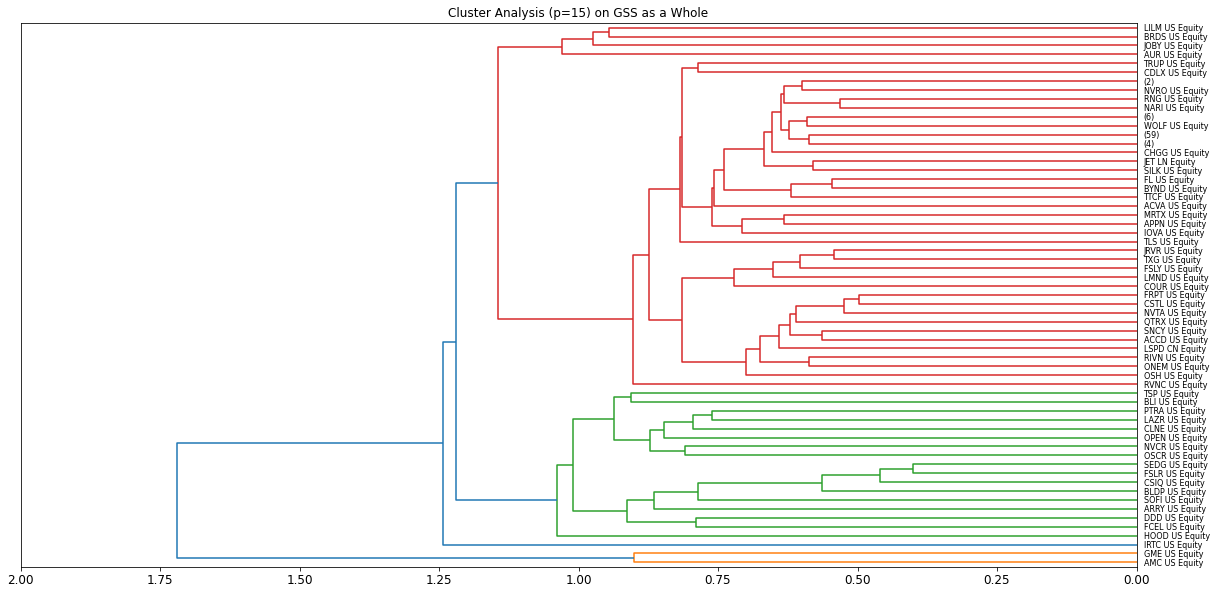

In [188]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(X)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
Z = plot_dendrogram(model, truncate_mode='level',labels=names,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])
ax = plt.gca()
#plt.rcParams["figure.figsize"] = (20,10)
fig.set_size_inches(20, 20)
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS as a Whole")
plt.savefig(dirpath+"Total_Cluster.png") 


## Shorts

In [73]:
attrib

PK  Weights          STRATEGY
3     AAL US Equity  -0.0017       SHORT HEDGE
4    ACCD US Equity  -0.0002       IPO&HD beta
5    ACVA US Equity  -0.0003       IPO&HD beta
6     AEO US Equity  -0.0015     DISCRETIONARY
7     AMC US Equity  -0.0060       SHORT ALPHA
..              ...      ...               ...
130   WSM US Equity  -0.0016     DISCRETIONARY
131   WTW US Equity   0.0215  LOW VOL, QUALITY
132    XP US Equity  -0.0004   FAILURE MODEL A
133   ZEN US Equity  -0.0004   FAILURE MODEL A
134   ZZZ CN Equity  -0.0010     DISCRETIONARY

[107 rows x 3 columns]

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Short Positions")

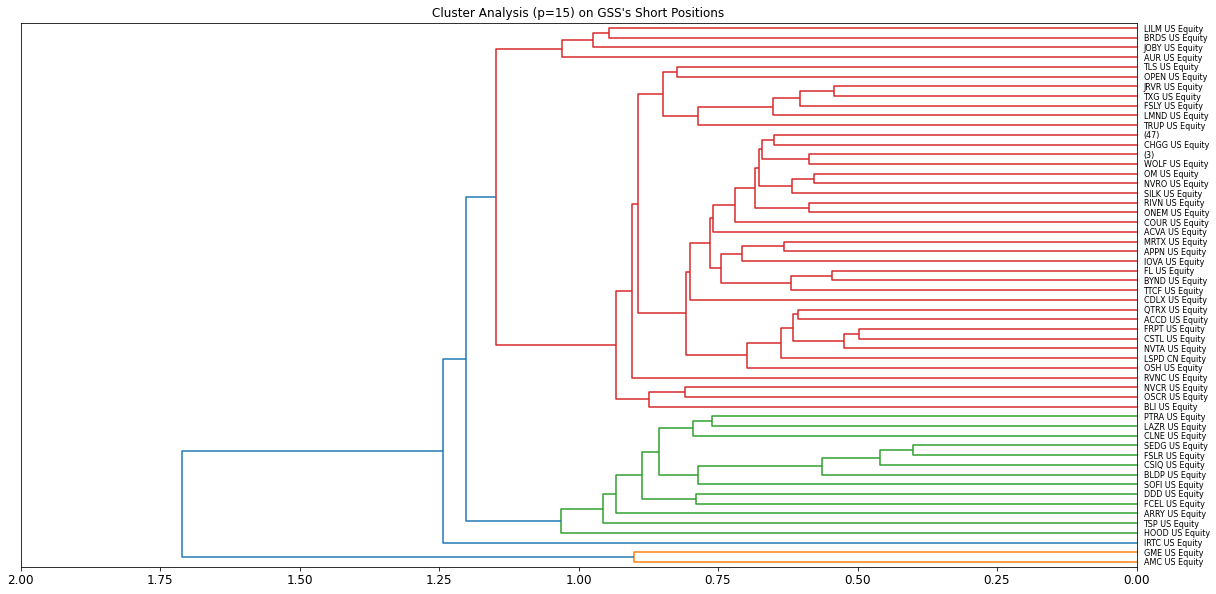

In [191]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(sX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
sZ = plot_dendrogram(model, truncate_mode='level',labels=snames,
                    p=15,leaf_font_size=6,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.xlim([2, 0])
#plt.subplots(figsize=(20,10))
fig.set_size_inches(20, 20)
ax = plt.gca()
#fig, ax = plt.subplots(figsize=(20,10))
#plt.rc({'font.size':'12'})
plt.rc('axes', titlesize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.title("Cluster Analysis (p=15) on GSS\'s Short Positions")
plt.savefig(dirpath+"Short_Cluster.png") 



array([[ 0.01022848, -0.01305488, -0.01791899, ...,  0.0160034 ,
         0.09913746,  0.09913746],
       [-0.04286306,  0.13725026,  0.10175892, ..., -0.01493879,
         0.02623365,  0.02623365],
       [ 0.00810969, -0.01719256,  0.04088764, ...,  0.00778928,
         0.06901897,  0.06901897],
       ...,
       [ 0.00633227,  0.00625436,  0.0003863 , ..., -0.01286761,
         0.01284436,  0.01284436],
       [-0.009295  ,  0.00831795,  0.01077652, ..., -0.02217285,
         0.03671197,  0.03671197],
       [-0.02690031, -0.02356843, -0.03711472, ...,  0.        ,
         0.        ,  0.        ]])

In [175]:
model.children_
model.labels_
snames[model.labels_]
model.distances_

array([[ 29,  39],
       [  7,  21],
       [ 74, 105],
       [101, 104],
       [106, 107],
       [  3, 108],
       [ 14, 109],
       [ 32,  94],
       [ 75, 110],
       [ 22, 112],
       [ 81,  92],
       [111, 113],
       [ 17,  42],
       [114, 116],
       [ 90, 117],
       [ 12, 100],
       [ 44,  53],
       [115, 118],
       [ 31,  54],
       [ 76, 119],
       [ 36,  40],
       [ 88, 121],
       [ 95, 124],
       [120, 123],
       [  8,  91],
       [ 25,  65],
       [122, 125],
       [ 93, 130],
       [ 23, 127],
       [ 85, 128],
       [ 68, 131],
       [126, 134],
       [ 78, 132],
       [ 13, 129],
       [  4, 135],
       [ 59,  99],
       [133, 138],
       [ 35,  66],
       [ 67, 141],
       [136, 140],
       [ 30,  82],
       [ 16,  26],
       [ 46,  62],
       [ 37, 145],
       [ 34, 139],
       [143, 144],
       [ 55, 142],
       [ 71,  80],
       [ 11,  96],
       [ 79,  83],
       [146, 149],
       [102, 153],
       [  9,

array([ 59,  55,  89,  98,  69,  81,  87, 102,  79, 103,  67,  56,  88,
        70,  97,  91,  62,  92,  77,  95,  63, 100,  94,  75,  93,  78,
        65,  99,  71,  51,  64,  85,  96,  48,  60,  66,  83,  29,  31,
        86,  76,  37,  90,  57,  43,  61,  30, 101,  34,  47,  80,  84,
        73,  32,  82,  58,  44,  72,  52,  68,  33,  14,  28,  42,  53,
        38,  45,  15,  74,  41,  27,  13,  18,  25,  50,  23,  20,  49,
        35,  54,  26,  46,  12,  36,  39,  17,  24,   6,  40,  19,  21,
        16,  22,   8,   7,   9,  11,   3,  10,   4,   1,   5,   2,   0],
      dtype=int64)

Index(['RNG US Equity', 'PHR US Equity', 'BRDS US Equity', 'LILM US Equity',
       'TTCF US Equity', 'KGF LN Equity', 'AUR US Equity', 'SNCY US Equity',
       'BAP US Equity', 'TSP US Equity',
       ...
       'ATO US Equity', 'BLDP US Equity', 'BYND US Equity', 'AAL US Equity',
       'BLI US Equity', 'AEO US Equity', 'AMC US Equity', 'APPN US Equity',
       'ACCD US Equity', 'ACVA US Equity'],
      dtype='object', length=104)

array([0.13239502, 0.15351293, 0.16303098, 0.1664375 , 0.19888356,
       0.22972958, 0.24794265, 0.2779964 , 0.29199923, 0.29620378,
       0.29929873, 0.30909806, 0.31029458, 0.3207822 , 0.32657462,
       0.33090748, 0.35847849, 0.35944745, 0.36139236, 0.36993748,
       0.37924413, 0.38722267, 0.39087896, 0.39280349, 0.39479693,
       0.40014866, 0.40162991, 0.40510271, 0.43101137, 0.43455866,
       0.43783436, 0.4521939 , 0.45836283, 0.45920571, 0.46589881,
       0.46613754, 0.46782208, 0.46933362, 0.47906434, 0.48176386,
       0.4855847 , 0.49767721, 0.52240056, 0.52374631, 0.52385739,
       0.53125303, 0.53857078, 0.54131051, 0.54483853, 0.54742379,
       0.5562705 , 0.55889117, 0.56432237, 0.57640554, 0.57767008,
       0.58750193, 0.58756513, 0.59258743, 0.60343411, 0.60736999,
       0.61529478, 0.61652199, 0.61875041, 0.63263284, 0.63753644,
       0.64982264, 0.65207952, 0.67201667, 0.67708011, 0.68397005,
       0.69884838, 0.70645099, 0.7189975 , 0.74449174, 0.75910

C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


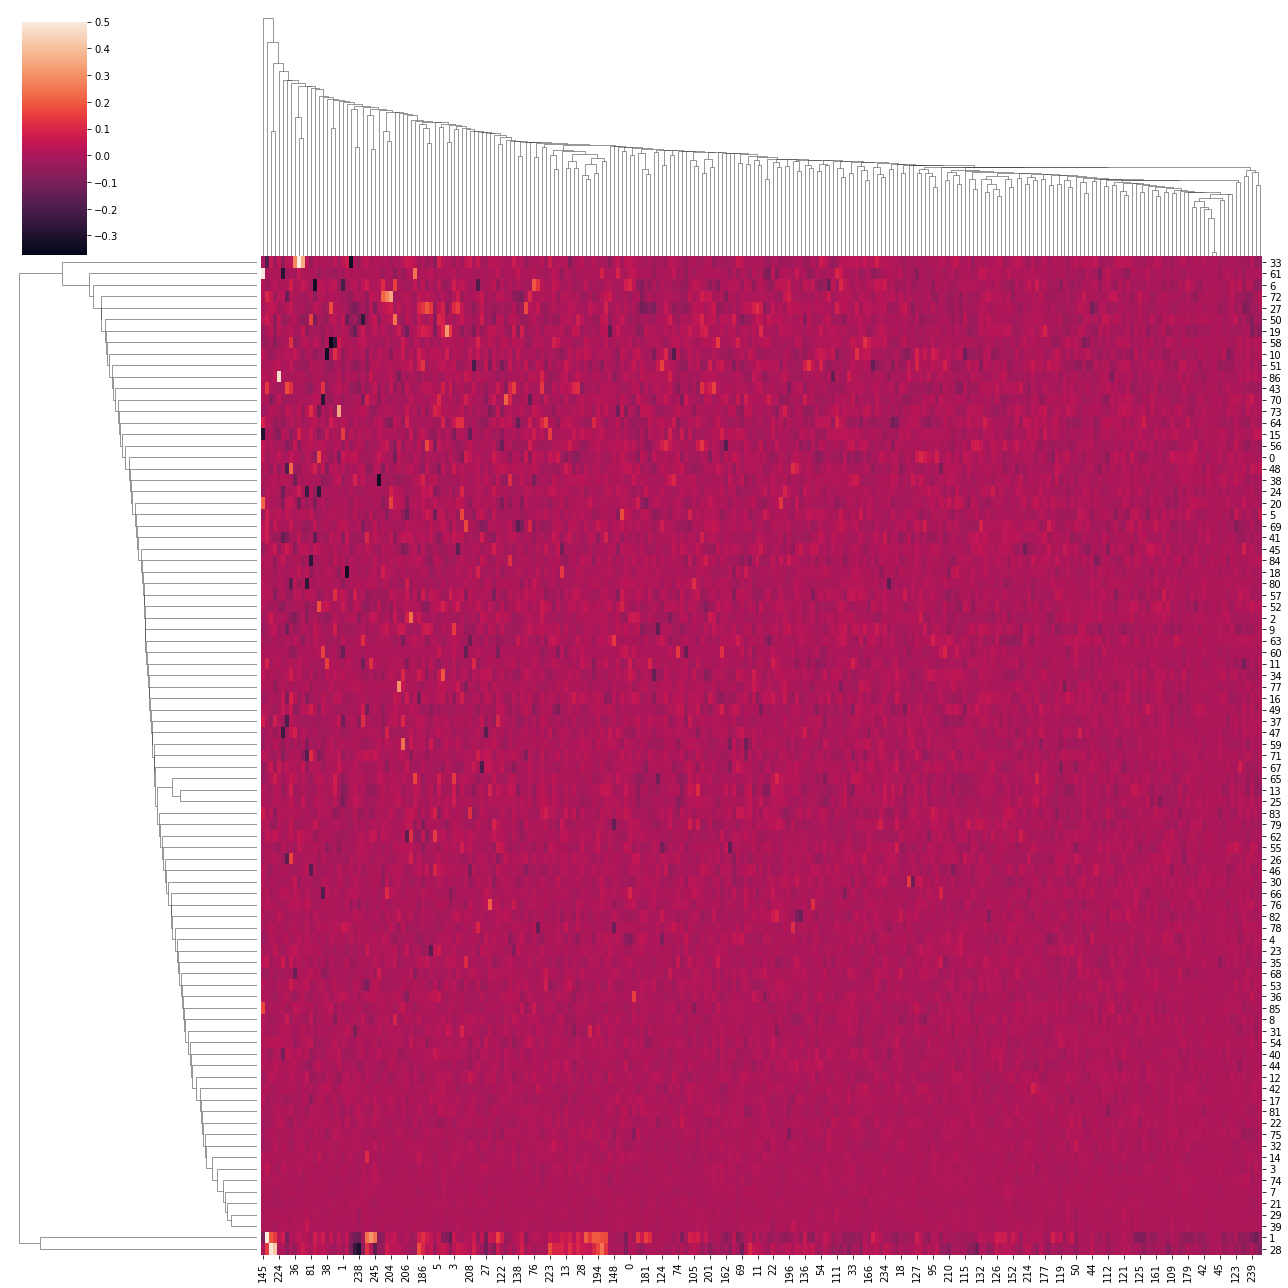

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(sX, figsize=(18,18),  yticklabels=True)

## Longs

Text(0.5, 0, '')

(2.0, 0.0)

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Long Positions")

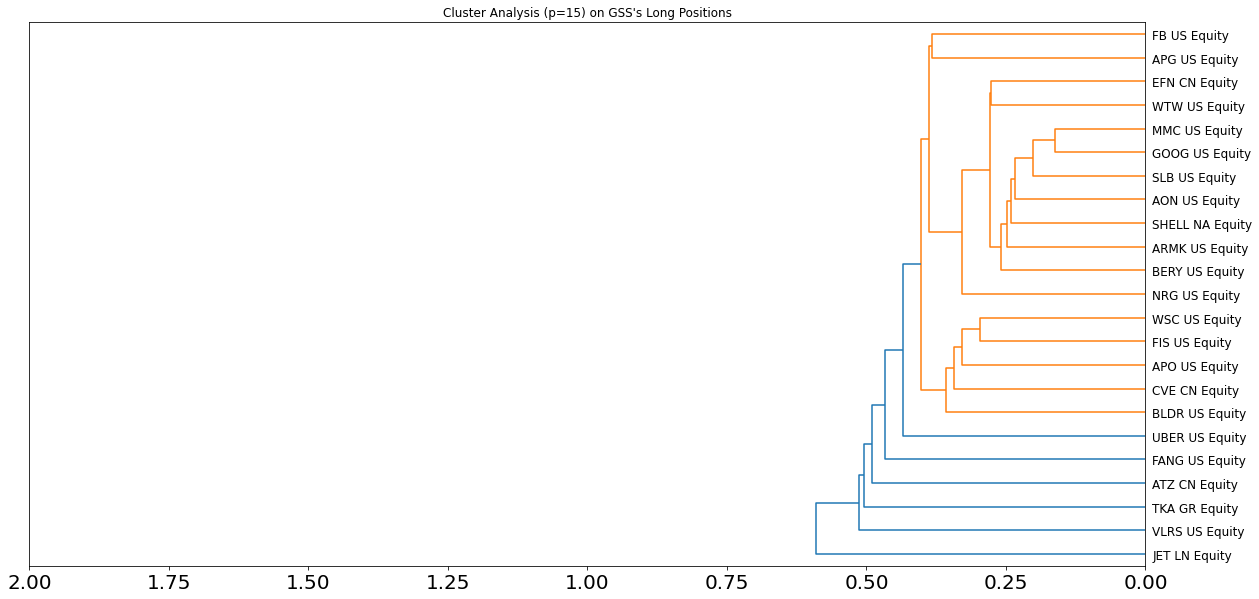

In [192]:
#model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(lX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
lZ = plot_dendrogram(model, truncate_mode='level',labels=lnames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
#plt.ytick(fontsize=6)
fig.set_size_inches(20, 20)
plt.rc('ytick', labelsize=8) 
#plt.xlabel('xlabel', fontsize=18)
plt.xlim([2, 0])
plt.title("Cluster Analysis (p=15) on GSS\'s Long Positions")
plt.savefig(dirpath+"Long_Cluster.png") 

In [115]:
dirpath

'C:/Users/jknechtel/Documents/Equity Risk Modeling/'

In [77]:
model.children_.shape[0]
model.labels_

19

array([19, 12, 17, 16, 11, 13, 18, 14, 15,  5, 10,  6,  7,  2,  8,  9,  3,
        4,  1,  0], dtype=int64)

In [78]:
#residuals['AC-15 (longs)'] 
model.labels_.T

array([19, 12, 17, 16, 11, 13, 18, 14, 15,  5, 10,  6,  7,  2,  8,  9,  3,
        4,  1,  0], dtype=int64)

In [79]:
residuals['AC-15 (longs)'].sort_values()

KeyError: 'AC-15 (longs)'

# Regional Style Factors

In [224]:
#dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
dirpath = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/'
ffile = 'FactorTSraw_hist.xlsx'
#tab = 'bbTickers'

In [225]:
usfactors = pd.read_excel(dirpath+ffile,sheet_name='USAM')
cafactors = pd.read_excel(dirpath+ffile,sheet_name='CAND')
wldfactors = pd.read_excel(dirpath+ffile,sheet_name='WRLD')
usfactors.set_index('date',inplace=True)
usfactors.sort_index(inplace=True) 
cafactors.set_index('date',inplace=True)
cafactors.sort_index(inplace=True) 
wldfactors.set_index('date',inplace=True)
wldfactors.sort_index(inplace=True) 
us_frets = usfactors.pct_change()
ca_frets = cafactors.pct_change()
wld_frets = wldfactors.pct_change()

In [228]:
sdate
date
#us_frets = us_frets.loc[sdate:]
#ca_frets = ca_frets.loc[sdate:]
#wld_frets = wld_frets.loc[sdate:]

'2021-04-21'

'2022-04-08'

In [229]:
with pd.ExcelWriter(dirpath+'Factor Detailed Stats '+date+'.xlsx') as writer:  
    us_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'US Factor Detailed Stats')
    ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'CA Factor Detailed Stats')
    wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(writer,sheet_name = 'WLD Factor Detailed Stats')
    pd.options.display.float_format = "{:,.2}".format  
    uscorr = us_frets.loc[sdate:].corr()
    uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'US Factor Correlations')
    cacorr = ca_frets.loc[sdate:].corr()
    cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'CA Factor Correlations')
    wldcorr = wld_frets.loc[sdate:].corr()
    wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'WLD Factor Correlations')
    mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'US Factor Returns')
    mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'CA Factor Returns')
    mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(writer,sheet_name = 'WLD Factor Returns')

In [84]:

ca_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'CA Factor Detailed Stats.xlsx')

In [85]:
wld_frets.loc[sdate:].apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'WLD Factor Detailed Stats.xlsx')

In [11]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23             0.0010              0.0004          -0.0001   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25             0.0001              0.0005          -0.0011   
2002-01-28             0.0009              0.0002          -0.0028   
...                       ...                 ...              ...   
2022-03-03             0.0018             -0.0008          -0.0041   
2022-03-04             0.0016             -0.0014          -0.0010   
2022-03-07             0.0024              0.0005          -0.0002   
2022-03-08            -0.0006              0.0001          -0.0026   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                NaN                 NaN              NaN   
2002-01-23            -0.0001              0.0012           0.0131   
2002-01-24            -0.0012              0.0020           0.0074   
2002-01-25            -0.0002              0.0002           0.0024   
2002-01-28            -0.0005             -0.0006           0.0005   
...                       ...                 ...              ...   
2022-03-03             0.0013             -0.0005          -0.0101   
2022-03-04             0.0007              0.0006          -0.0138   
2022-03-07            -0.0011             -0.0000          -0.0316   
2022-03-08            -0.0008             -0.0002          -0.0005   
2022-03-09             0.0000              0.0000           0.0000   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                NaN              NaN                NaN   
2002-01-23             0.0001           0.0021            -0.0002   
2002-01-24            -0.0045          -0.0003            -0.0019   
2002-01-25             0.0001          -0.0001             0.0002   
2002-01-28             0.0017           0.0007            -0.0004   
...                       ...              ...                ...   
2022-03-03             0.0038           0.0022             0.0018   
2022-03-04             0.0050           0.0011             0.0006   
2022-03-07            -0.0032          -0.0010             0.0009   
2022-03-08            -0.0029          -0.0016            -0.0036   
2022-03-09             0.0000           0.0000             0.0000   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22            NaN                NaN             NaN   
2002-01-23        -0.0026            -0.0027          0.0009   
2002-01-24        -0.0014            -0.0008         -0.0018   
2002-01-25        -0.0006            -0.0011          0.0003   
2002-01-28        -0.0001             0.0008          0.0017   
...                   ...                ...             ...   
2022-03-03        -0.0003             0.0031          0.0024   
2022-03-04        -0.0010             0.0024         -0.0009   
2022-03-07        -0.0019             0.0062         -0.0025   
2022-03-08        -0.0002            -0.0013          0.0033   
2022-03-09         0.0000             0.0000          0.0000   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  NaN  
2002-01-23               0.0070  
2002-01-24               0.0058  
2002-01-25              -0.0020  
2002-01-28              -0.0008  
...                         ...  
2022-03-03              -0.0106  
2022-03-04              -0.0133  
2022-03-07              -0.0118  
2022-03-08               0.0118  
2022-03-09               0.0000  

[5062 rows x 13 

In [89]:
cs.insertTable(us_frets.loc[sdate:],"EQ_USFactorIndices")
cs.insertTable(ca_frets.loc[sdate:],"EQ_CAFactorIndices")
cs.insertTable(wld_frets.loc[sdate:],"EQ_WLDFactorIndices")

In [13]:
pd.options.display.float_format = "{:,.2}".format  

uscorr = us_frets.loc[sdate:].corr()
uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Correlations.xlsx')

In [14]:
pd.options.display.float_format = "{:,.2}".format  

cacorr = ca_frets.loc[sdate:].corr()
cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Correlations.xlsx')


In [15]:
pd.options.display.float_format = "{:,.2}".format  

wldcorr = wld_frets.loc[sdate:].corr()
wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Correlations.xlsx')

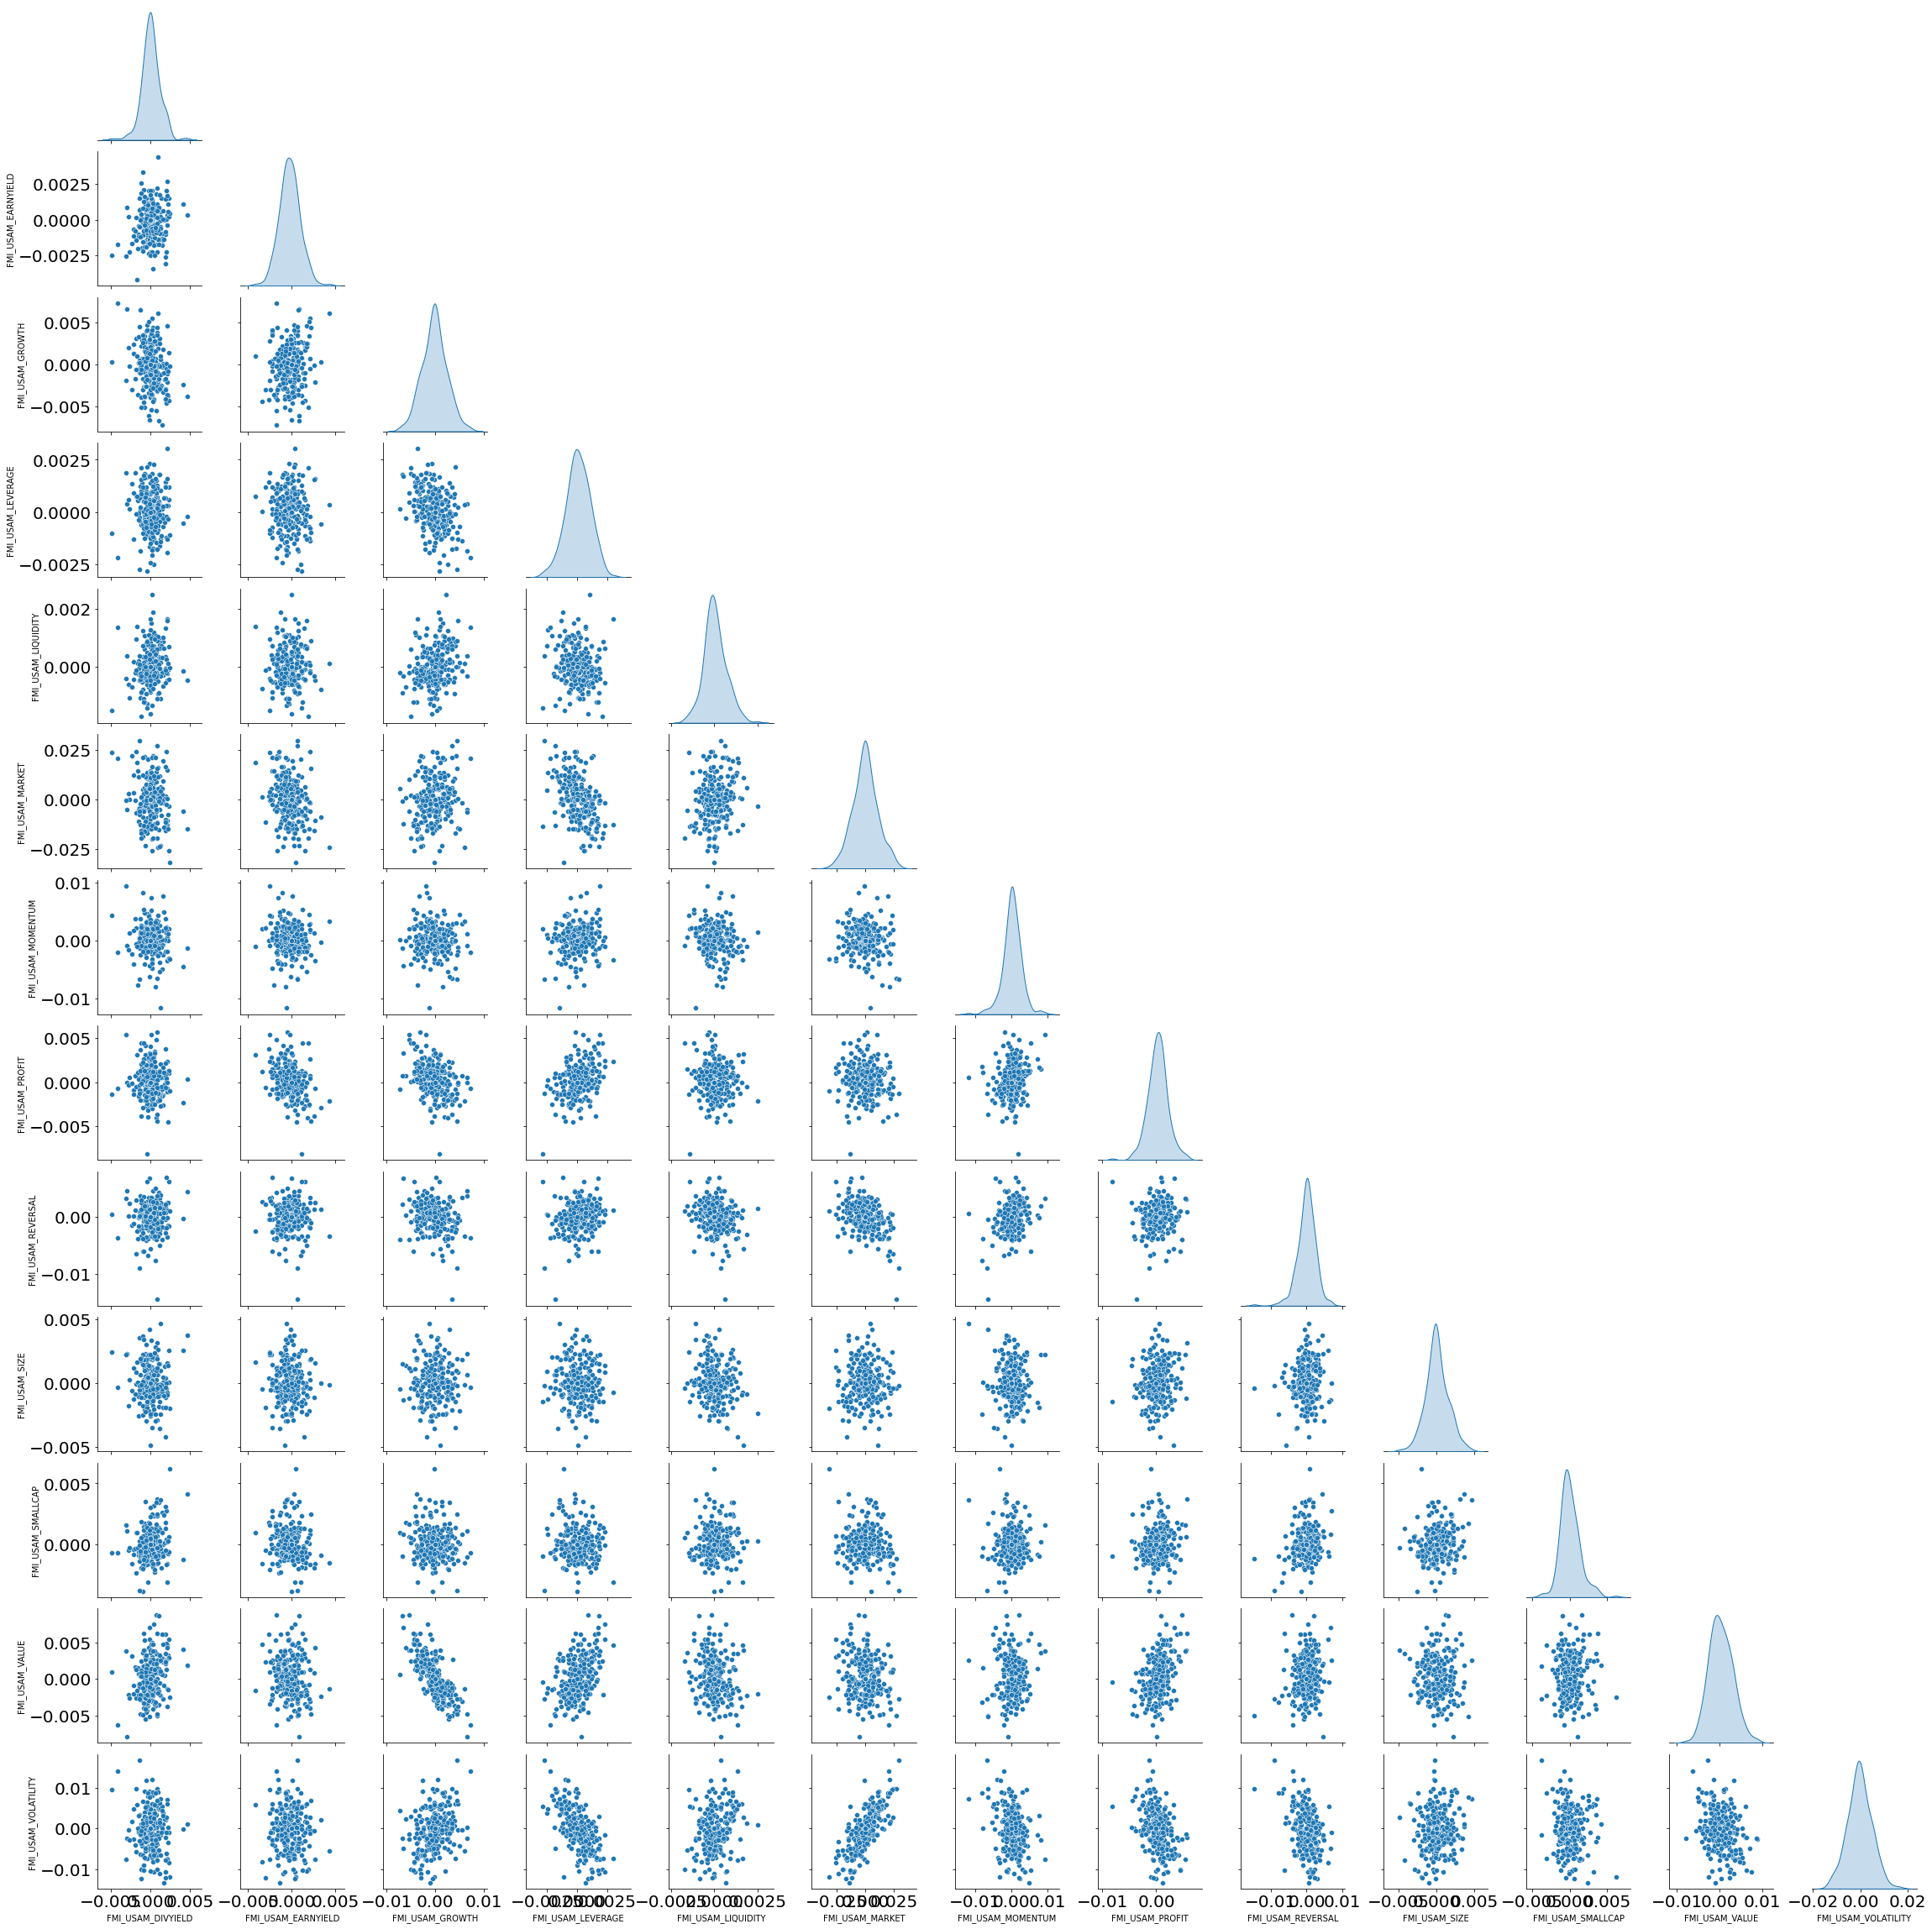

In [238]:

sns_plot = sns.pairplot(us_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"USStyleFactors_PairPlot.png") 

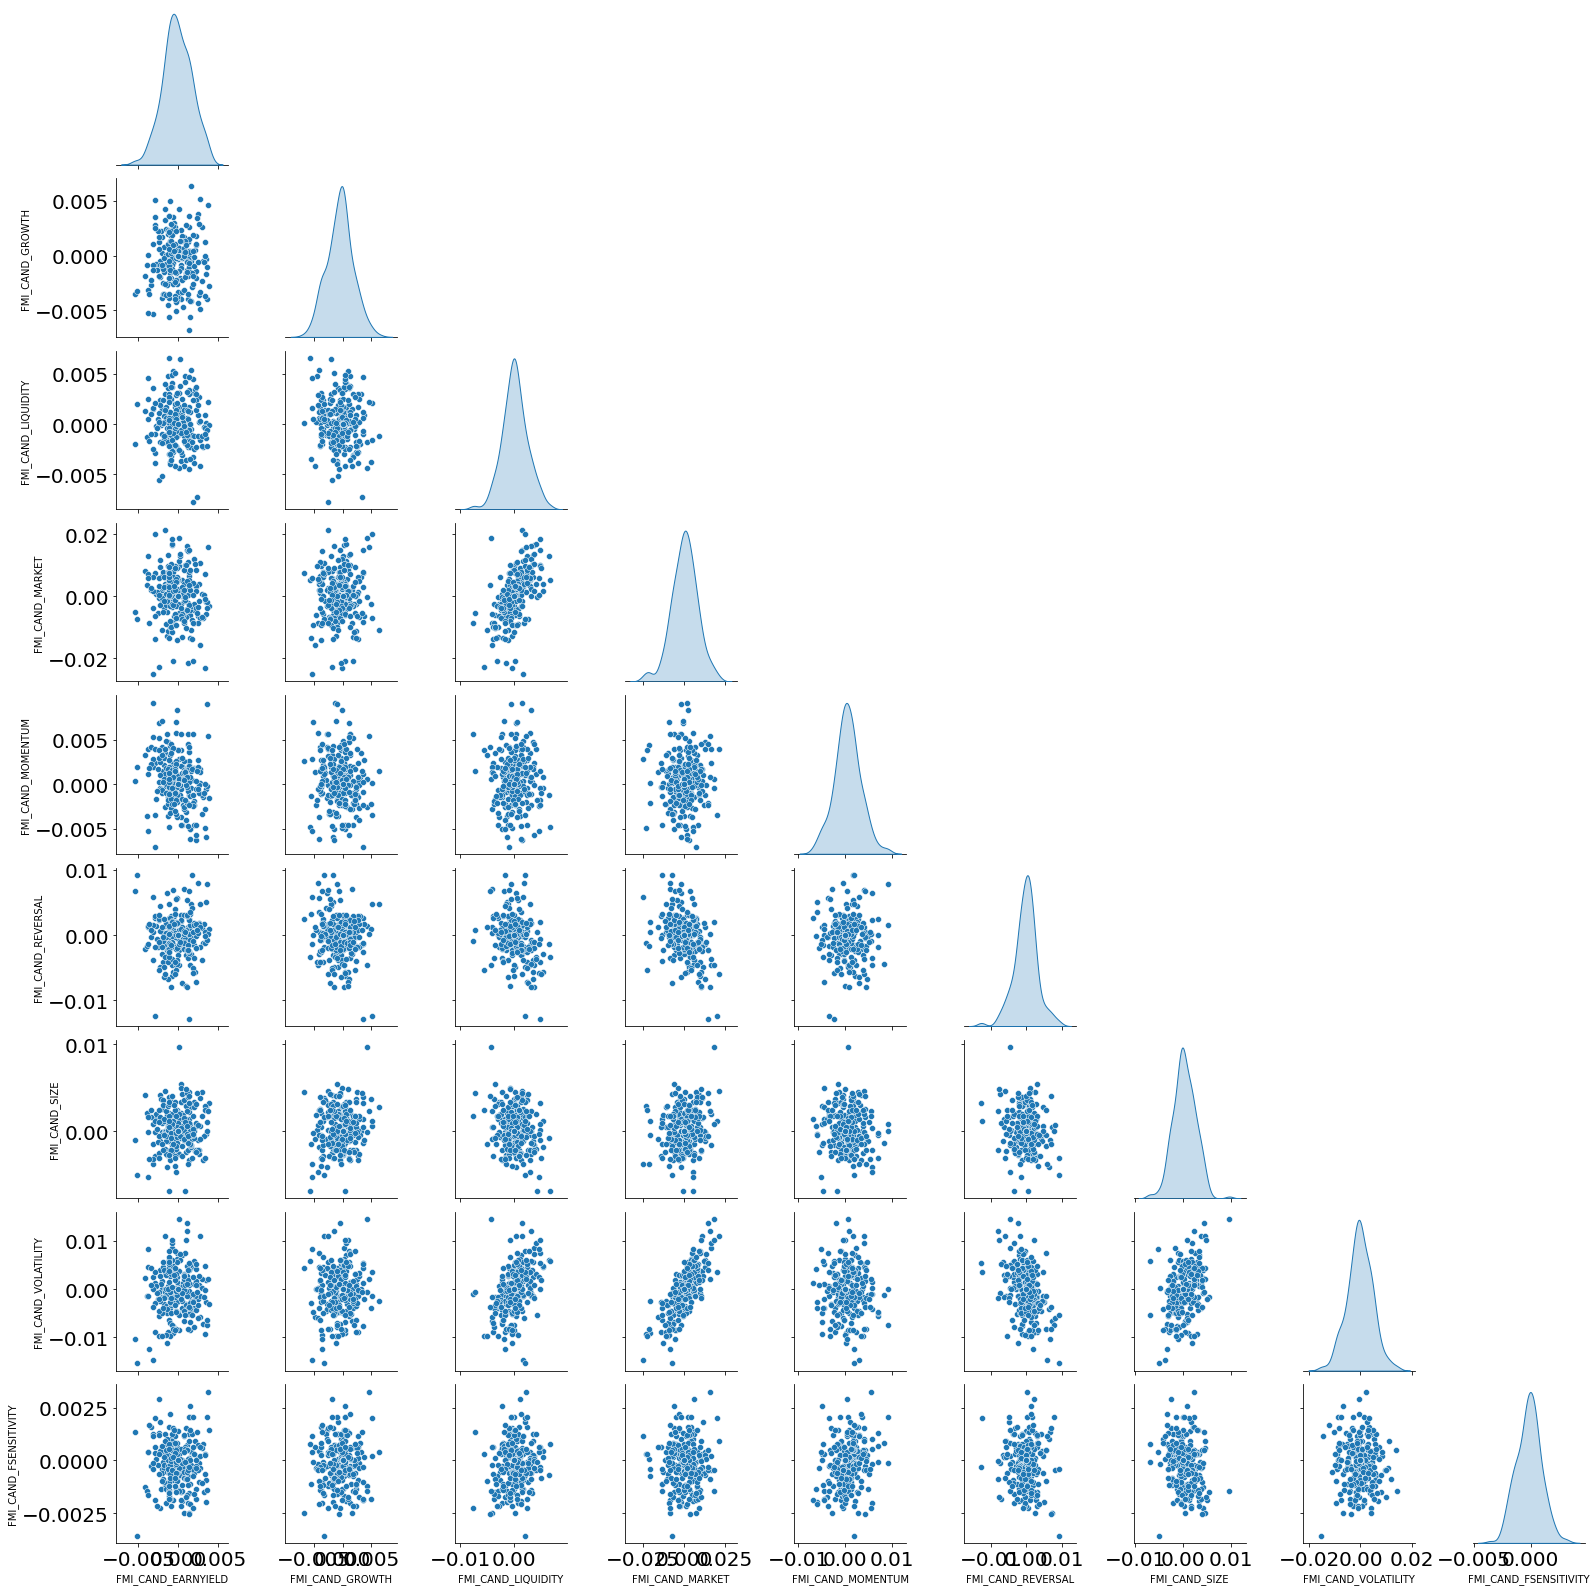

In [239]:
sns_plot = sns.pairplot(ca_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"CAStyleFactors_PairPlot.png") 

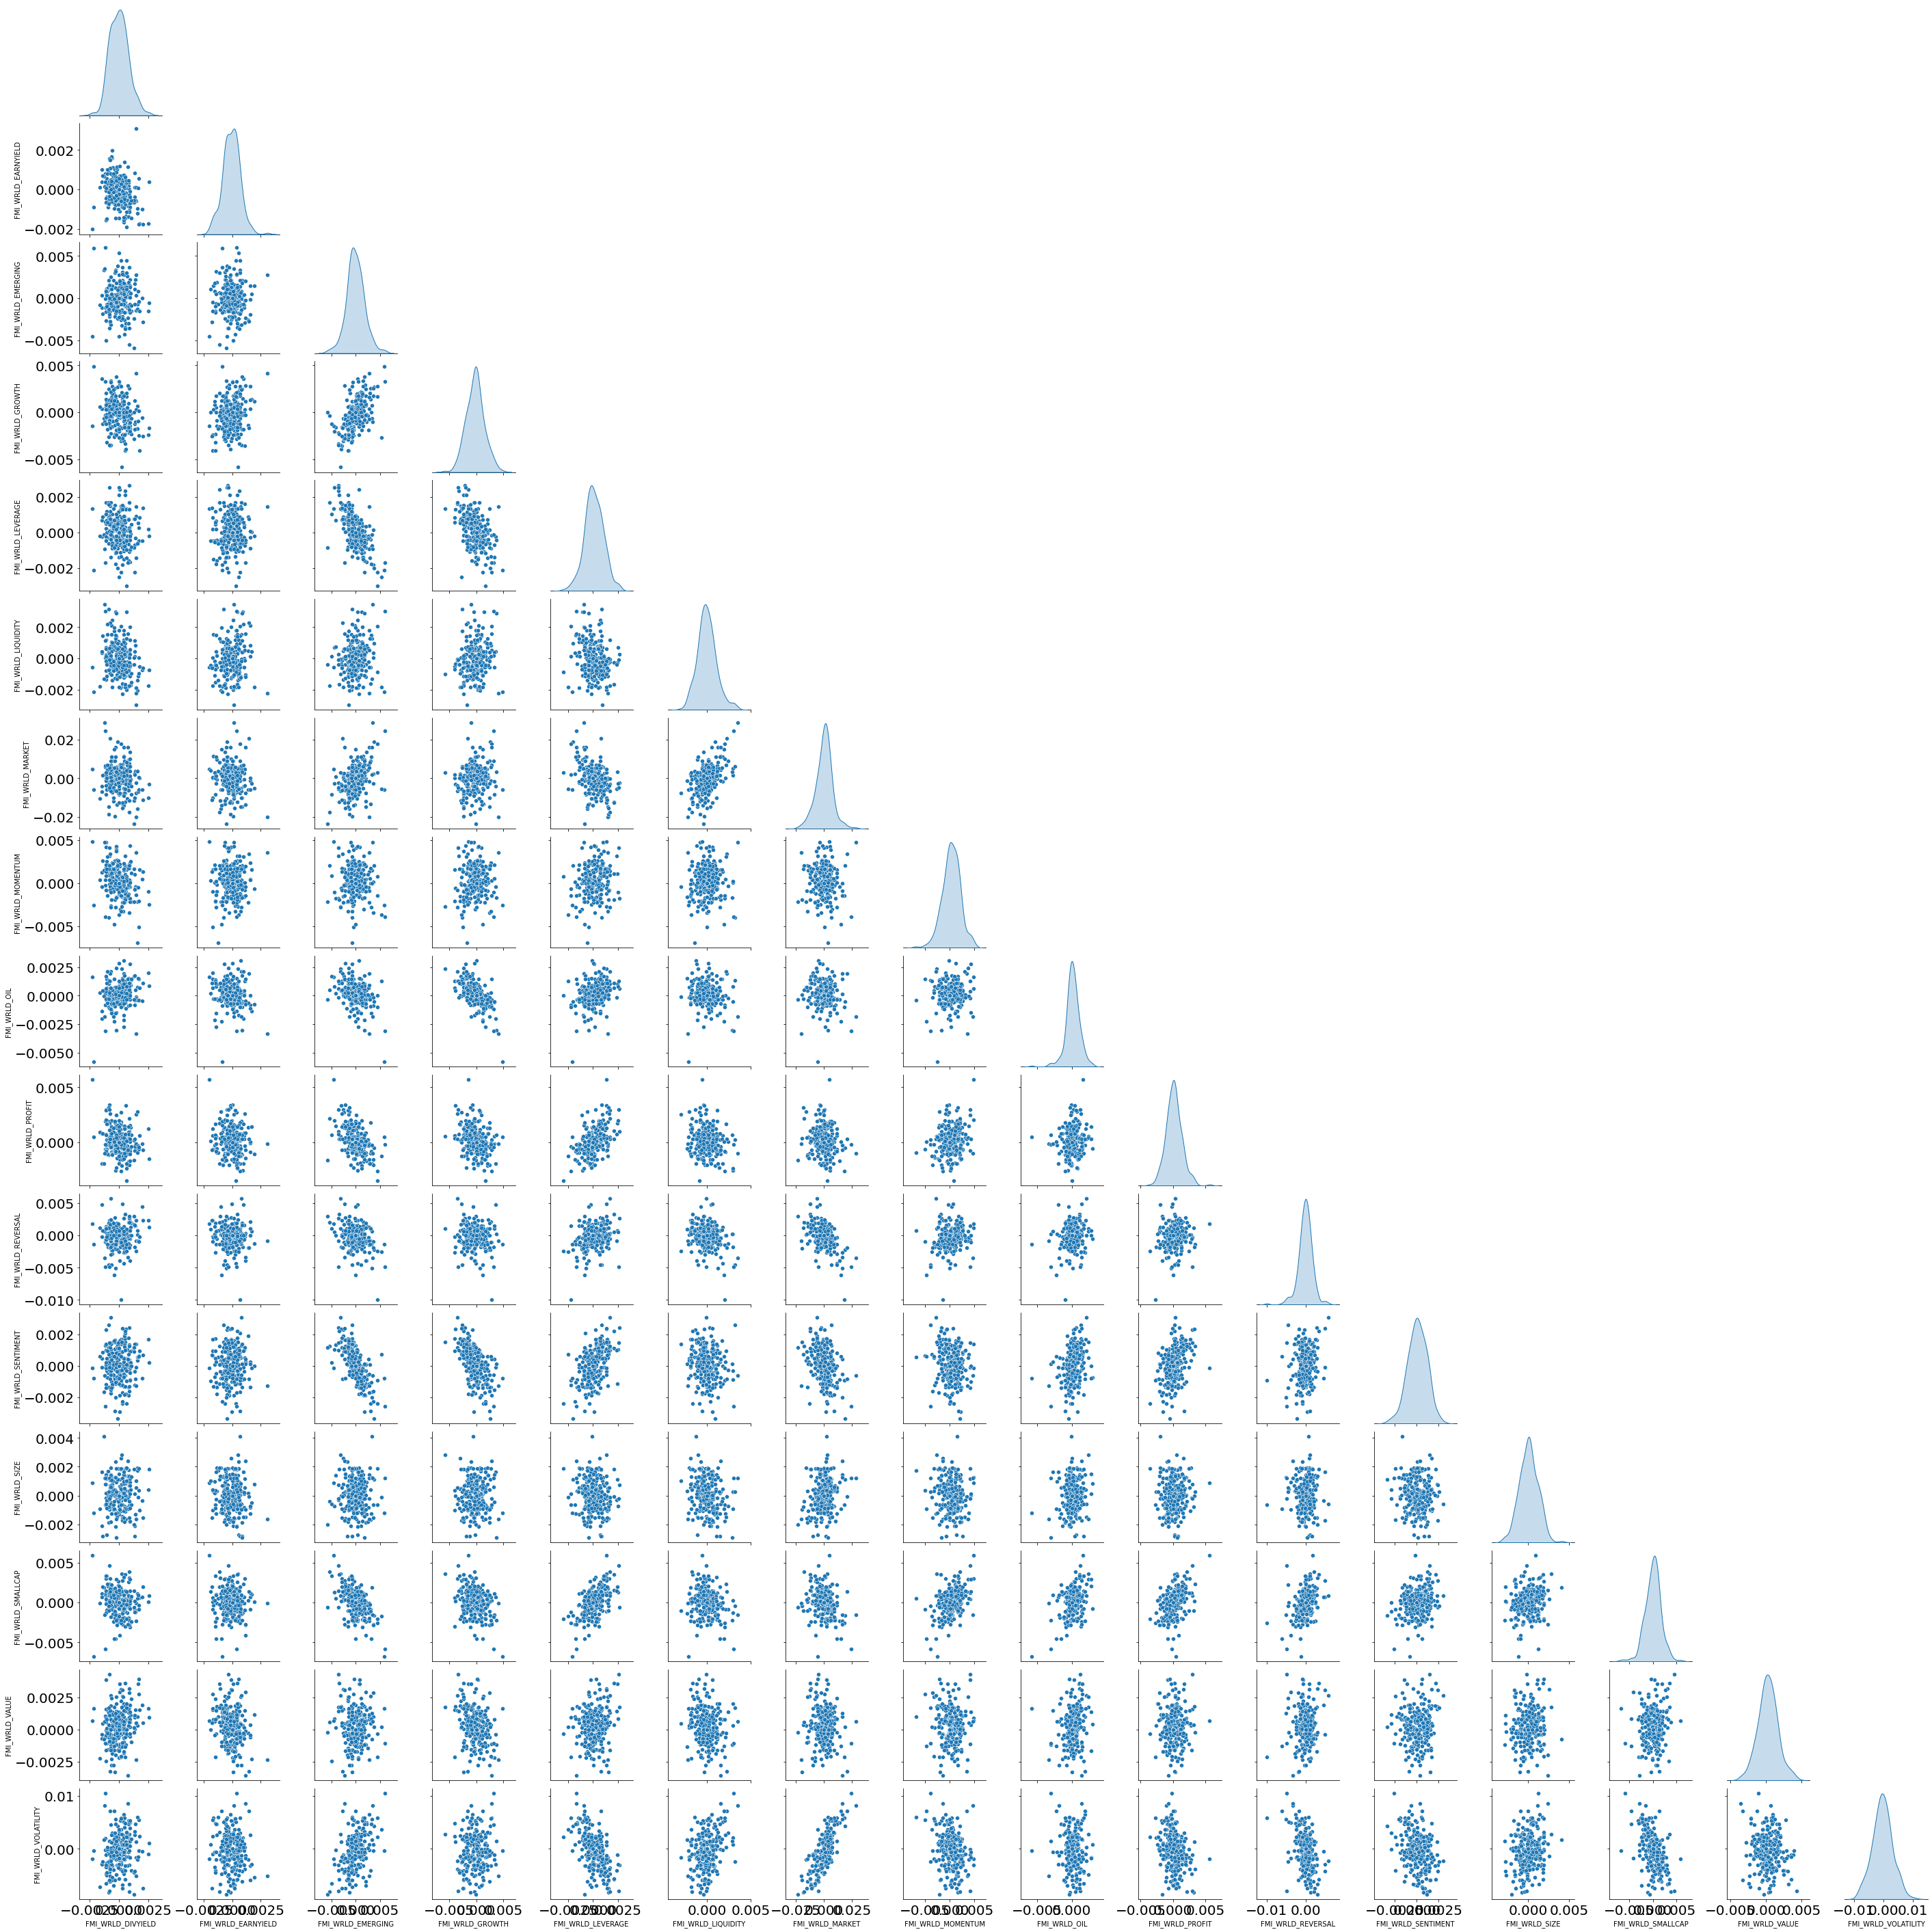

In [240]:
sns_plot = sns.pairplot(wld_frets.loc[sdate:], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"WldStyleFactors_PairPlot.png") 

In [22]:
mri.SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Returns.xlsx')
mri.SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Returns.xlsx')
mri.SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Returns.xlsx')

In [ ]:
usfactors.columns.str.lstrip('FMI_USAM')

## Factor Turbulence

In [91]:
import MacroRiskIndictators as mri

In [105]:
returns = us_frets.join(wld_frets).join(ca_frets)

In [106]:
corr = returns.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='RdBu').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_36308/1955355093.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdBu').set_precision(2)


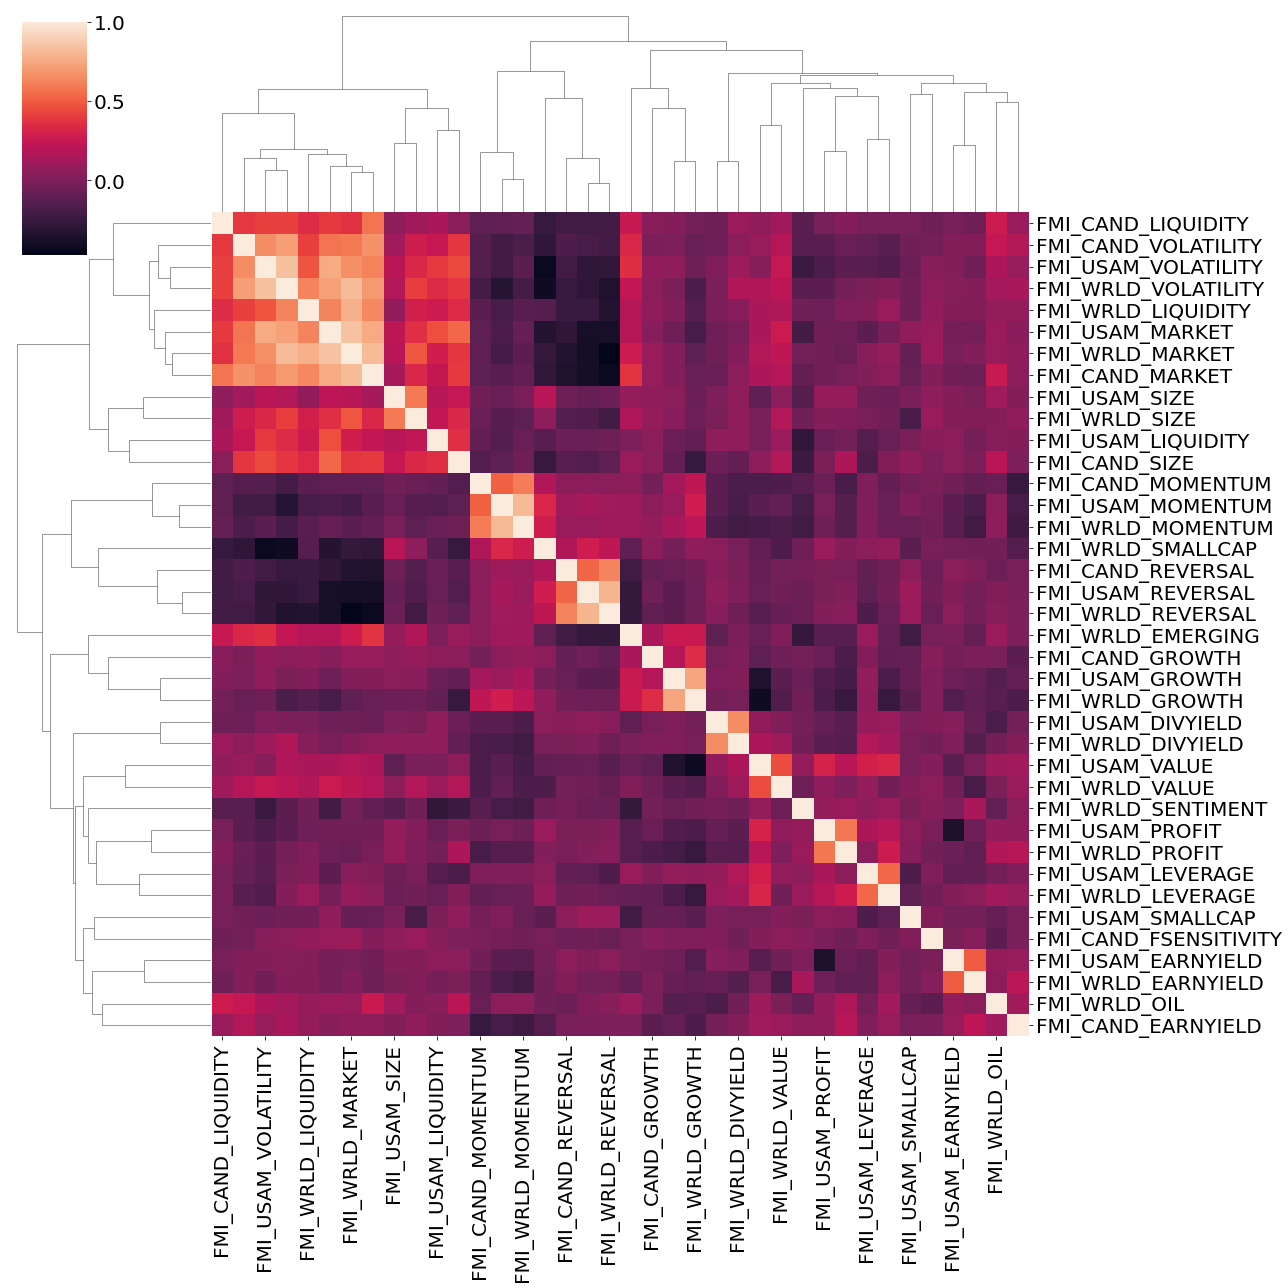

In [107]:
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.clustermap(returns.corr(), figsize=(18,18),  yticklabels=True).savefig(dirpath+'Alladin Factor Cluster Map.png')

In [36]:
us_frets.index.name = 'Dates'
us_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(us_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(us_frets, window_size=250)

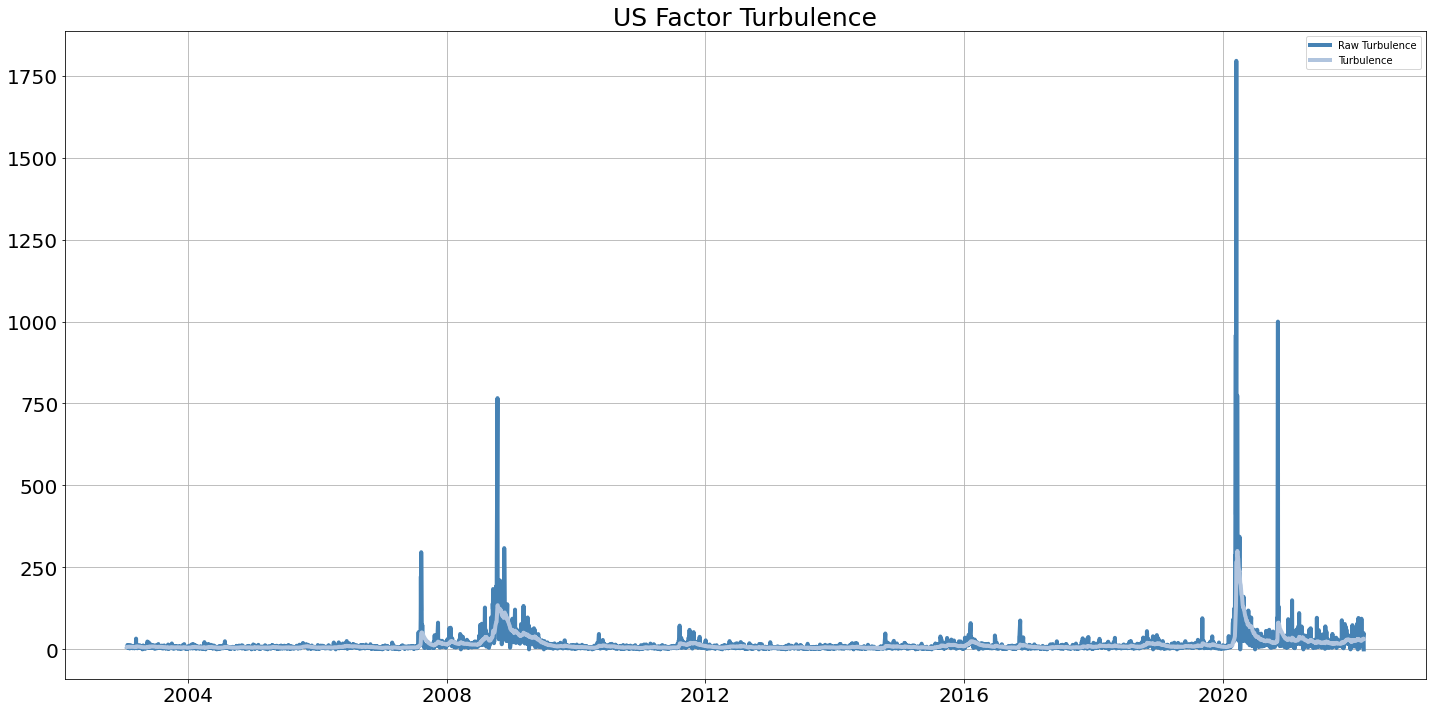

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Turbulence'}>)

In [37]:
utils.StandardLinePlot(turbulence.set_index('Dates'),"US Factor Turbulence",save=True)

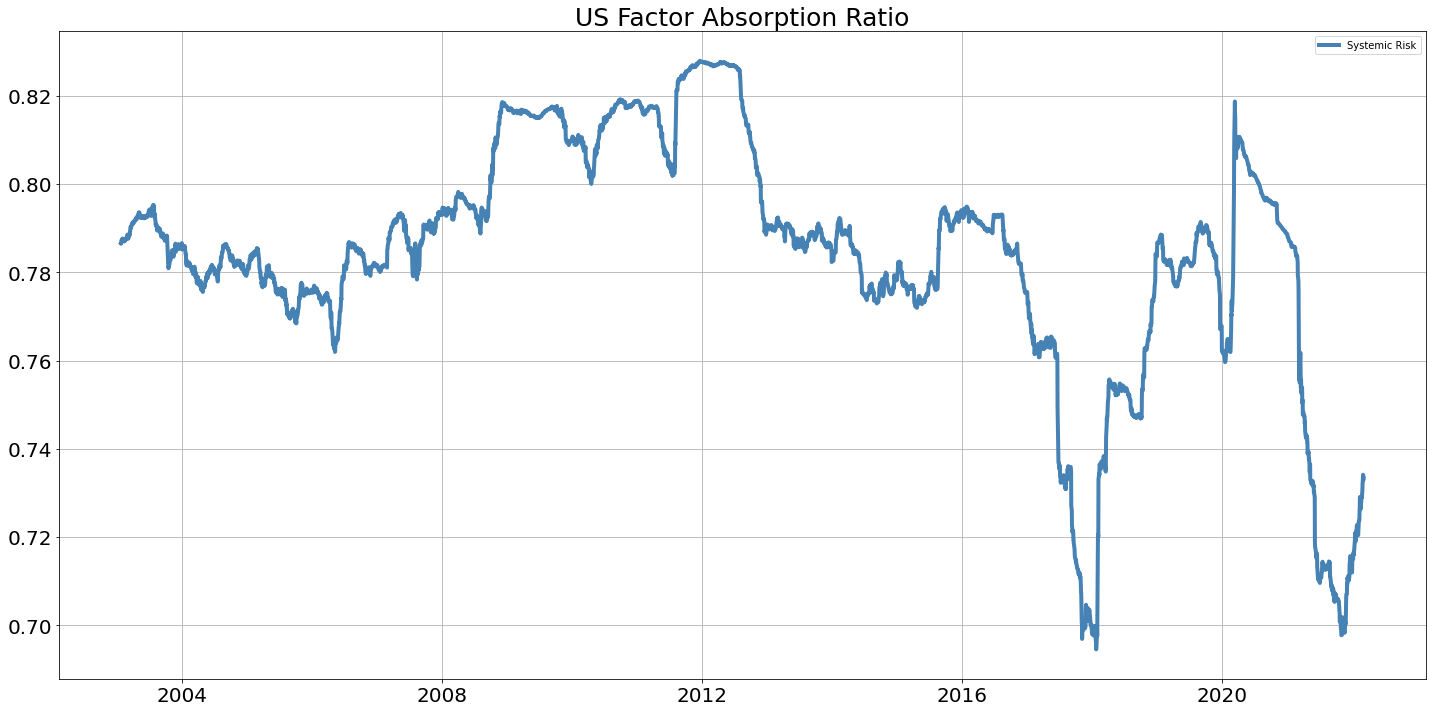

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Absorption Ratio'}>)

In [38]:

utils.StandardLinePlot(absorbRatio.set_index('Dates'),"US Factor Absorption Ratio",save=True)

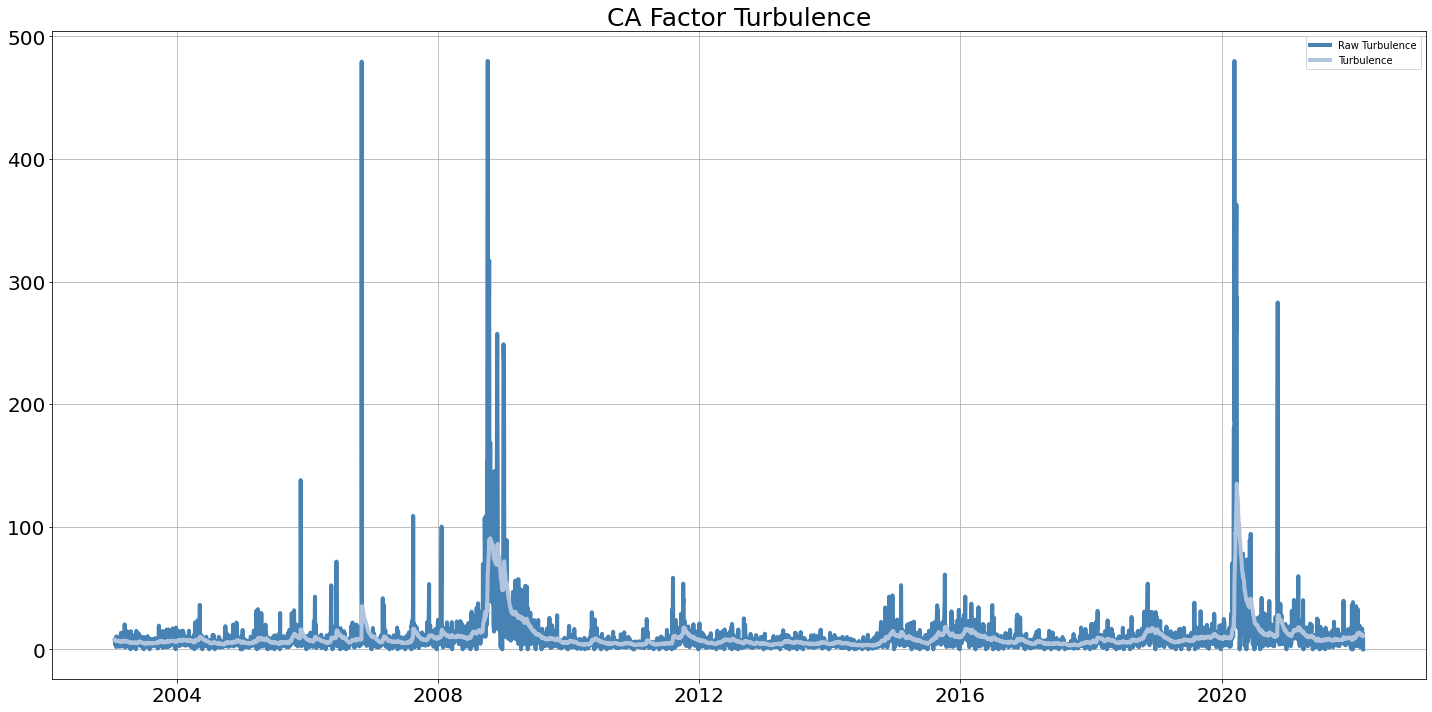

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Turbulence'}>)

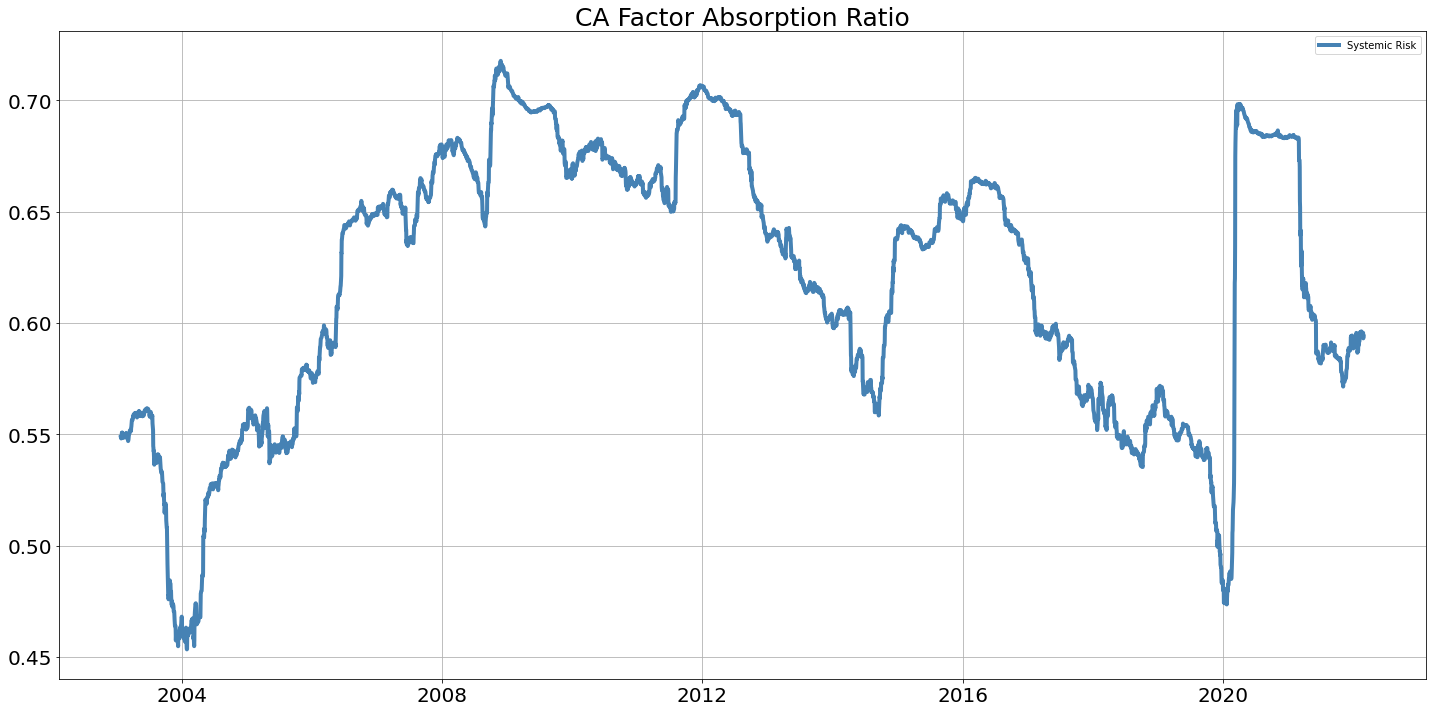

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'CA Factor Absorption Ratio'}>)

In [83]:
ca_frets.index.name = 'Dates'
ca_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(ca_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(ca_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"CA Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"CA Factor Absorption Ratio",save=True)

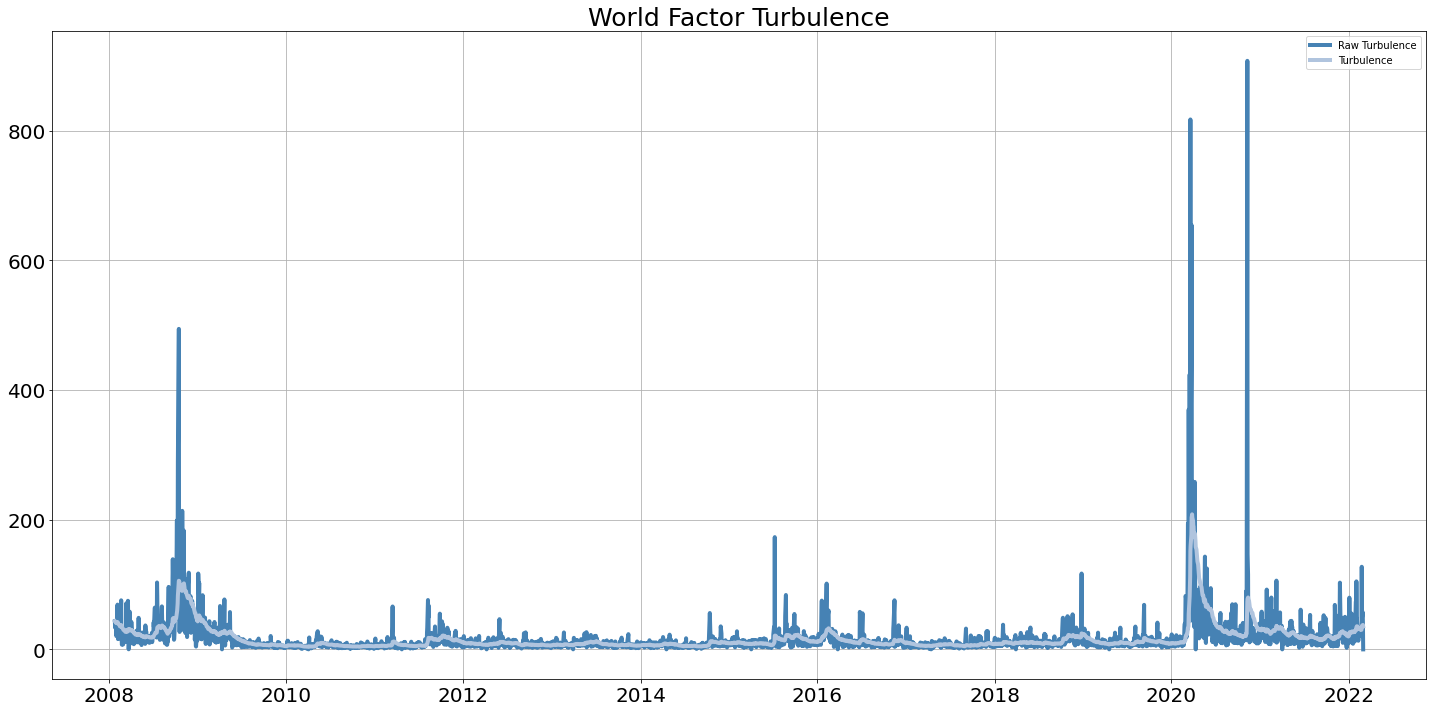

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Turbulence'}>)

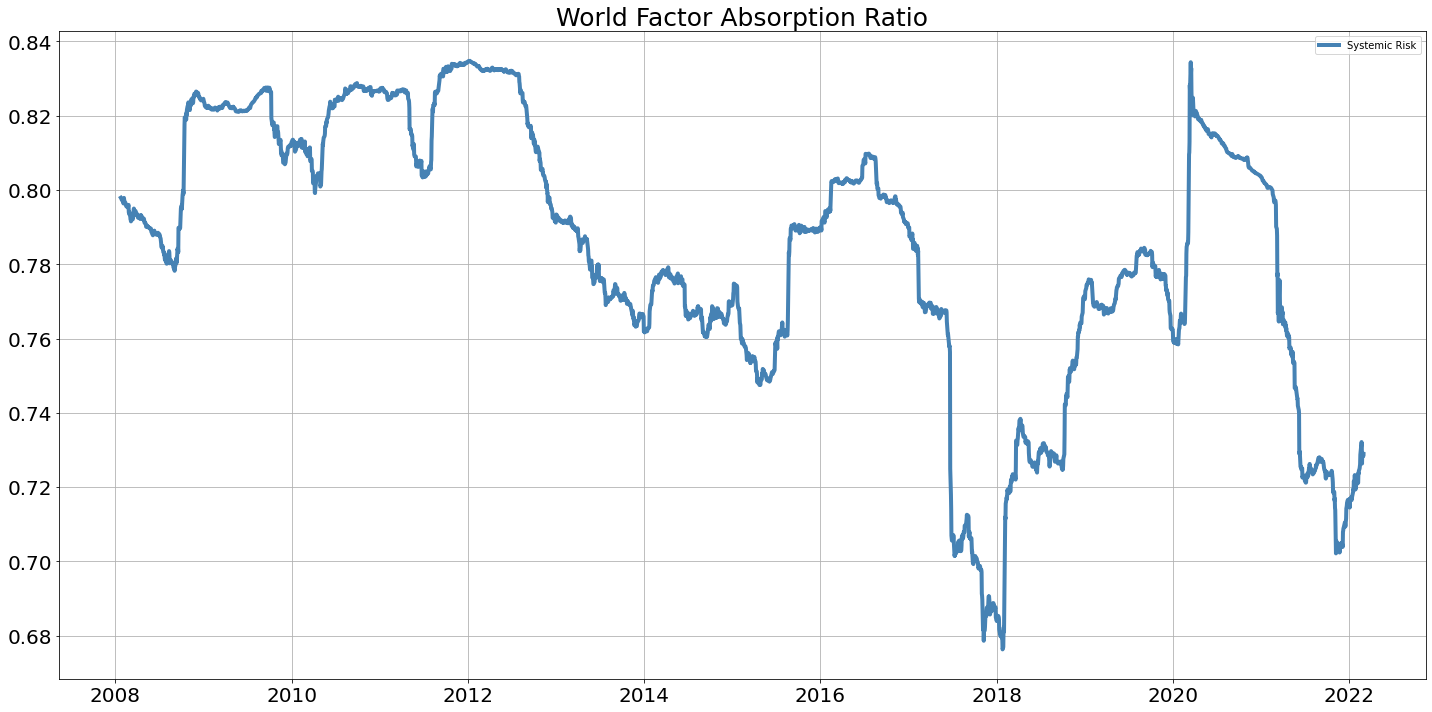

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Absorption Ratio'}>)

In [84]:
wld_frets.index.name = 'Dates'
wld_frets.reset_index(inplace=True)
turbulence = mri.calculate_turbulence(wld_frets, initial_window_size=250)
turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)
absorbRatio = mri.calculate_systemic_risk(wld_frets, window_size=250)
utils.StandardLinePlot(turbulence.set_index('Dates'),"World Factor Turbulence",save=True)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"World Factor Absorption Ratio",save=True)

## Factor Graphs

In [230]:
#us_frets.set_index('Dates',inplace=True)
us_frets.dropna(how='all',inplace=True)

In [231]:
us_frets

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-23            0.00099             0.00043         -0.00012   
2002-01-24             0.0015             -0.0011          -0.0027   
2002-01-25            0.00013             0.00053          -0.0011   
2002-01-28            0.00092             0.00021          -0.0028   
2002-01-29            0.00051            -5.6e-05          -0.0014   
...                       ...                 ...              ...   
2022-04-04           -0.00018            -6.7e-05           0.0029   
2022-04-05            -0.0012             0.00039         -0.00056   
2022-04-06             0.0019             -0.0031           -0.003   
2022-04-07                0.0                 0.0              0.0   
2022-04-08                0.0                 0.0              0.0   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-23           -9.5e-05              0.0012            0.013   
2002-01-24            -0.0012               0.002           0.0074   
2002-01-25            -0.0002             0.00019           0.0024   
2002-01-28           -0.00046            -0.00058           0.0005   
2002-01-29           -0.00047            -0.00093           -0.021   
...                       ...                 ...              ...   
2022-04-04           -4.5e-05             0.00027           0.0057   
2022-04-05            0.00088            -0.00085           -0.017   
2022-04-06             0.0012            -0.00012           -0.011   
2022-04-07                0.0                 0.0              0.0   
2022-04-08                0.0                 0.0              0.0   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-23            7.3e-05           0.0021           -0.00016   
2002-01-24            -0.0045         -0.00027            -0.0019   
2002-01-25            0.00012         -0.00014            0.00022   
2002-01-28             0.0017          0.00067           -0.00041   
2002-01-29            0.00075          0.00068           -0.00098   
...                       ...              ...                ...   
2022-04-04            -0.0063         -0.00024           -0.00046   
2022-04-05             0.0023         -0.00014             0.0028   
2022-04-06             0.0021         -0.00057             0.0022   
2022-04-07                0.0              0.0                0.0   
2022-04-08                0.0              0.0                0.0   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-23        -0.0026            -0.0027         0.00088   
2002-01-24        -0.0014           -0.00077         -0.0018   
2002-01-25        -0.0006            -0.0011         0.00028   
2002-01-28       -0.00011            0.00085          0.0017   
2002-01-29        -0.0052            -0.0012         0.00056   
...                   ...                ...             ...   
2022-04-04         0.0042             0.0018         -0.0051   
2022-04-05       -0.00014            0.00057         0.00036   
2022-04-06        -0.0019           -0.00047          0.0023   
2022-04-07            0.0                0.0             0.0   
2022-04-08            0.0                0.0             0.0   

            FMI_USAM_VOLATILITY  
date                             
2002-01-23                0.007  
2002-01-24               0.0058  
2002-01-25               -0.002  
2002-01-28             -0.00079  
2002-01-29              -0.0088  
...                         ...  
2022-04-04               0.0078  
2022-04-05               -0.012  
2022-04-06               -0.012  
2022-04-07                  0.0  
2022-04-08                  0.0  

[5083 rows x 13 

In [232]:
usfactors

FMI_USAM_DIVYIELD  FMI_USAM_EARNYIELD  FMI_USAM_GROWTH  \
date                                                                 
2002-01-22               0.99                 1.1              0.9   
2002-01-23               0.99                 1.1              0.9   
2002-01-24                1.0                 1.1              0.9   
2002-01-25                1.0                 1.1              0.9   
2002-01-28                1.0                 1.1              0.9   
...                       ...                 ...              ...   
2022-04-04               0.92                0.97             0.85   
2022-04-05               0.92                0.97             0.85   
2022-04-06               0.92                0.96             0.84   
2022-04-07               0.92                0.96             0.84   
2022-04-08               0.92                0.96             0.84   

            FMI_USAM_LEVERAGE  FMI_USAM_LIQUIDITY  FMI_USAM_MARKET  \
date                                                                 
2002-01-22                1.0                0.97              2.7   
2002-01-23                1.0                0.97              2.7   
2002-01-24                1.0                0.97              2.8   
2002-01-25                1.0                0.97              2.8   
2002-01-28                1.0                0.97              2.8   
...                       ...                 ...              ...   
2022-04-04               0.99                 1.0          2.6e+01   
2022-04-05                1.0                 1.0          2.5e+01   
2022-04-06                1.0                 1.0          2.5e+01   
2022-04-07                1.0                 1.0          2.5e+01   
2022-04-08                1.0                 1.0          2.5e+01   

            FMI_USAM_MOMENTUM  FMI_USAM_PROFIT  FMI_USAM_REVERSAL  \
date                                                                
2002-01-22                1.4              1.2               0.51   
2002-01-23                1.4              1.2               0.51   
2002-01-24                1.4              1.2               0.51   
2002-01-25                1.4              1.2               0.51   
2002-01-28                1.4              1.2               0.51   
...                       ...              ...                ...   
2022-04-04                1.6              1.7               0.26   
2022-04-05                1.6              1.7               0.26   
2022-04-06                1.6              1.7               0.26   
2022-04-07                1.6              1.7               0.26   
2022-04-08                1.6              1.7               0.26   

            FMI_USAM_SIZE  FMI_USAM_SMALLCAP  FMI_USAM_VALUE  \
date                                                           
2002-01-22           0.92                1.1             1.2   
2002-01-23           0.92                1.1             1.2   
2002-01-24           0.92                1.1             1.2   
2002-01-25           0.92                1.1             1.2   
2002-01-28           0.92                1.1             1.2   
...                   ...                ...             ...   
2022-04-04           0.84                1.1             1.6   
2022-04-05           0.84                1.1             1.6   
2022-04-06           0.84                1.1             1.6   
2022-04-07           0.84                1.1             1.6   
2022-04-08           0.84                1.1             1.6   

            FMI_USAM_VOLATILITY  
date                             
2002-01-22                  1.3  
2002-01-23                  1.3  
2002-01-24                  1.3  
2002-01-25                  1.3  
2002-01-28                  1.3  
...                         ...  
2022-04-04                  1.7  
2022-04-05                  1.7  
2022-04-06                  1.6  
2022-04-07                  1.6  
2022-04-08                  1.6  

[5084 rows x 13 

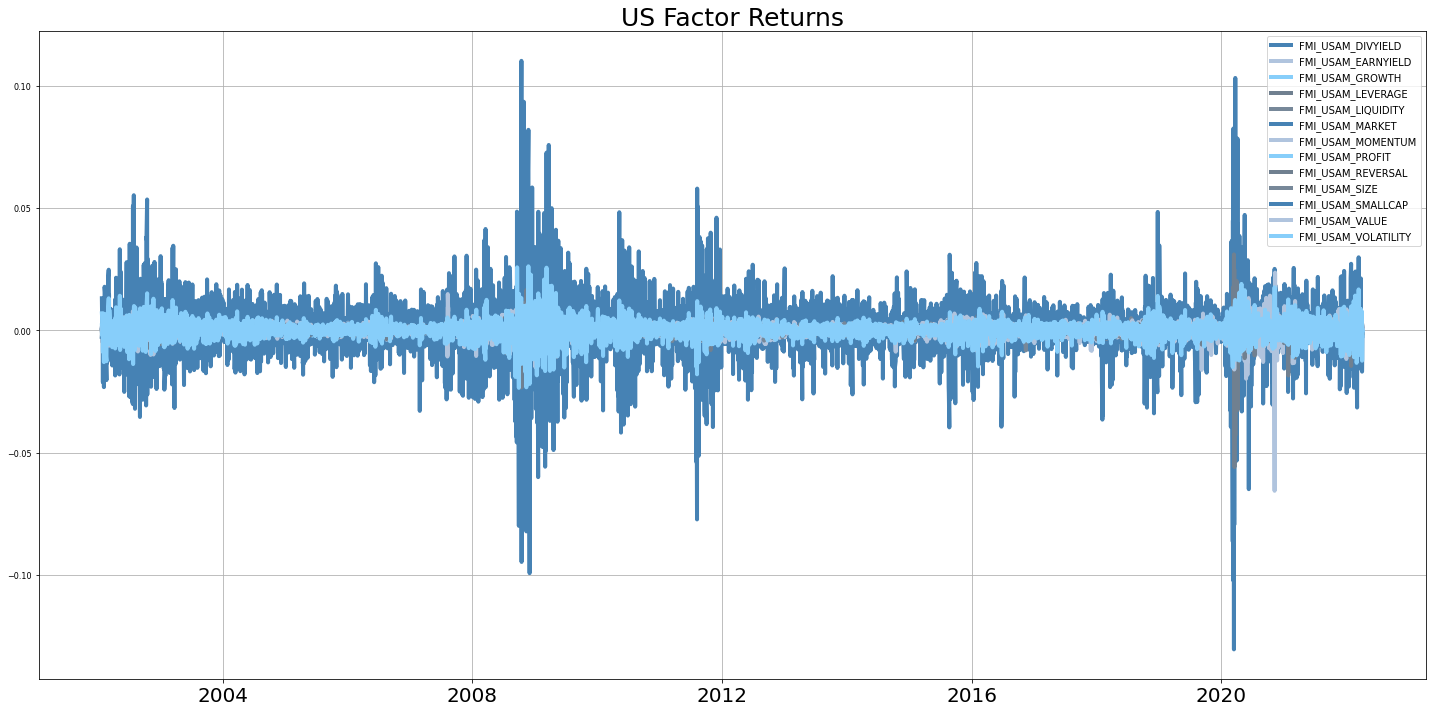

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Returns'}>)

In [233]:

utils.StandardLinePlot(us_frets,"US Factor Returns",save=True)

In [234]:
def MultiLinePlot(graph_data,plot_title,include_lines="",win=120,save=False):
    '''
    Standardized Line Plot with "onbrand" color scheme/theme
    Arguments:
        graph_data: needs to be a DF currently
        plot_title: string
        save: optional, names the file the plot_title
    Returns:
        fig, ax: for further customization if needed
    '''
    fig, ax = plt.subplots(figsize=(20,10))
    parameters = {'xtick.labelsize': 20,'ytick.labelsize': 20,'figure.titlesize': 25}
    plt.rcParams.update(parameters)
    
    if include_lines == 'hist':
        graph_data['Historical average'] = graph_data.expanding(min_periods=12).mean()
        # '#4682b4': steelblue  ,'#b0c4de': lightsteelblue ,'#87cefa':lightskyblue
        # '#708090': slategrey  ,'#778899': lightslategrey ,'#d3d3d3':lightgrey
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    elif include_lines == 'move':
        graph_data[[graph_data.columns[0]]]
        graph_data['Moving {} average'.format(win)] = graph_data[[graph_data.columns[0]]].rolling(win).mean()
        graph_data['-std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()-graph_data[[graph_data.columns[0]]].rolling(win).std()
        graph_data['+std'] = graph_data[[graph_data.columns[0]]].rolling(win).mean()+graph_data[[graph_data.columns[0]]].rolling(win).std()
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#b0c4de','#b0c4de']))
    #else:
        #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    
    #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa']))
    ax.plot(graph_data,linewidth=4)
    plt.grid()
    plt.title(plot_title,fontsize=25)
    try:
        plt.legend(graph_data.columns.values) 
    except:
        print("not a dataframe")
    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(plot_title+'.png',format="png")
    return fig, ax

In [99]:
import matplotlib.pyplot as plt

In [100]:
sdate

'2021-04-06'

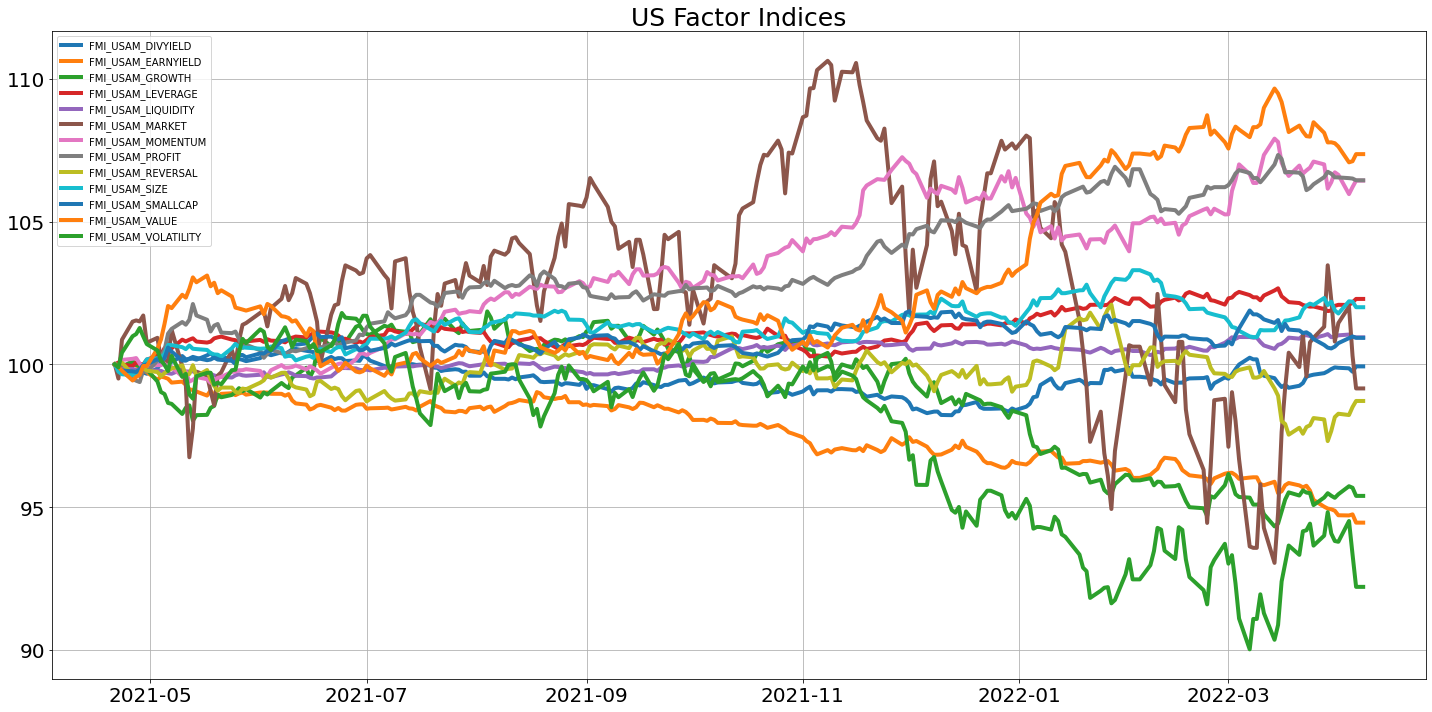

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'US Factor Indices'}>)

In [235]:

MultiLinePlot(100*usfactors.loc[sdate:]/usfactors.loc[sdate],"US Factor Indices",save=True)

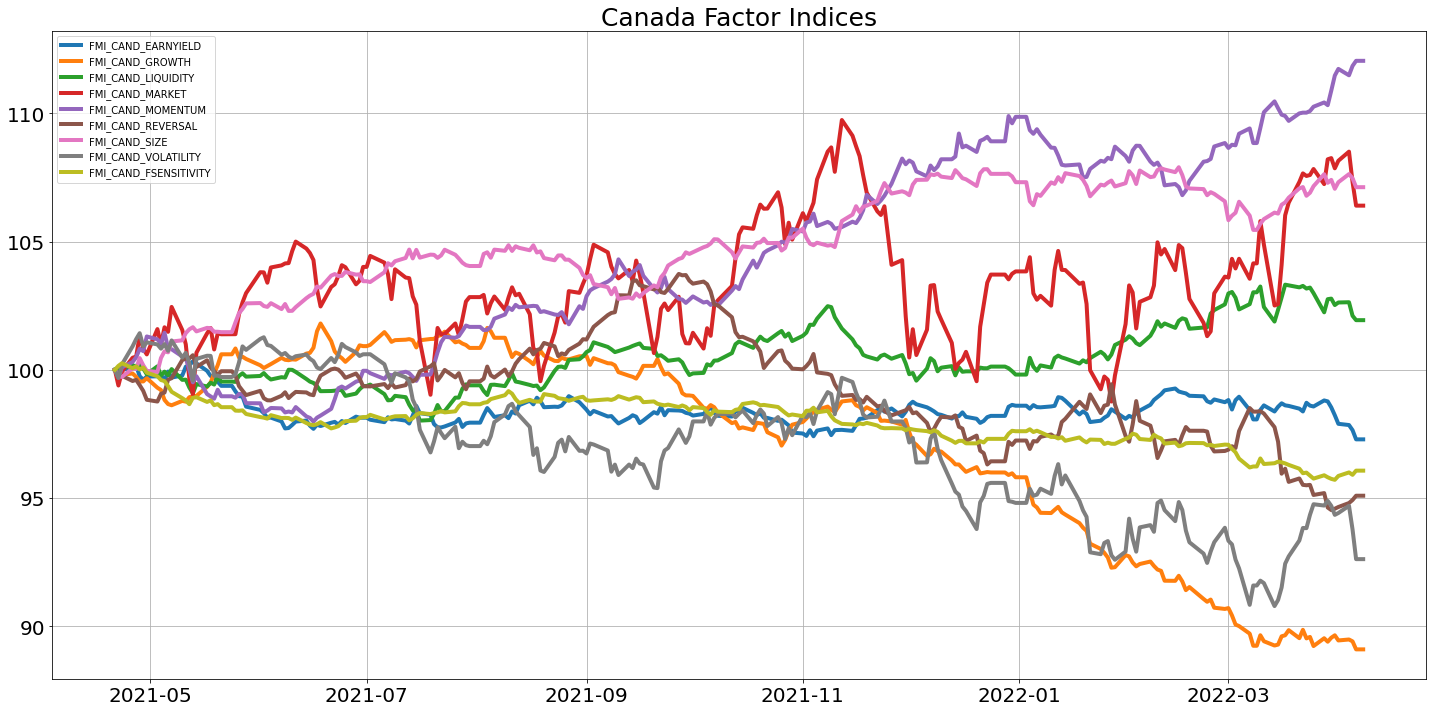

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Canada Factor Indices'}>)

In [236]:
MultiLinePlot(100*cafactors.loc[sdate:]/cafactors.loc[sdate],"Canada Factor Indices",save=True)

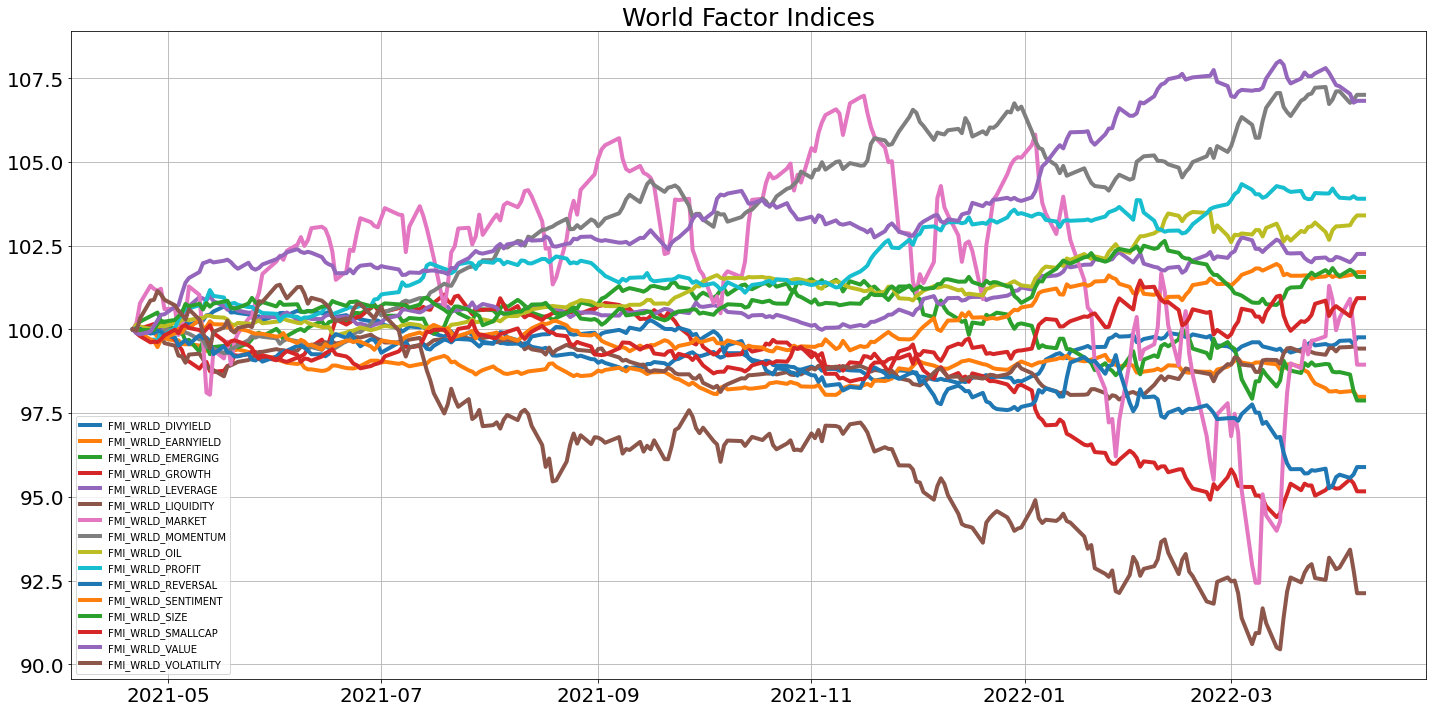

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'World Factor Indices'}>)

In [237]:
MultiLinePlot(100*wldfactors.loc[sdate:]/wldfactors.loc[sdate],"World Factor Indices",save=True)

# Sector by Factor loadings

In [3]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
fbsfile = 'Factor Risk Breakdown.xlsx'

In [9]:
unclean = pd.read_excel(dirpath+fbsfile,sheet_name='ONGSS',skiprows=3).dropna(subset=['Filter Level 1'])
unclean

Title Filter Level 1          Filter Level 2  \
0                     ONGSS          ONGSS                     NaN   
1    Communication Services          ONGSS  Communication Services   
2                     STYLE          ONGSS  Communication Services   
3                    Market          ONGSS  Communication Services   
4                      Size          ONGSS  Communication Services   
..                      ...            ...                     ...   
378                INDUSTRY          ONGSS               Utilities   
379               Utilities          ONGSS               Utilities   
380                      FX          ONGSS               Utilities   
381                 CAD/CAD          ONGSS               Utilities   
382                 USD/CAD          ONGSS               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN 1.0000              NaN           NaN         NaN   
1              NaN 2.0000              NaN           NaN         NaN   
2            STYLE 3.0000              NaN           NaN         NaN   
3            STYLE 0.0000     Style Return        4.4550      0.1541   
4            STYLE 0.0000     Style Return        1.1322      0.0191   
..             ...    ...              ...           ...         ...   
378       INDUSTRY 3.0000              NaN           NaN         NaN   
379       INDUSTRY 0.0000  Industry Return        0.6549      0.0661   
380             FX 3.0000              NaN           NaN         NaN   
381             FX 0.0000               FX        0.0100         NaN   
382             FX 0.0000               FX           NaN      0.0581   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN      1,372.5650             NaN   
1          NaN        NaN     NaN        263.9339             NaN   
2       0.1838        NaN  0.1838        186.5287             NaN   
3       0.1193        NaN  0.1193        183.7853             NaN   
4       0.3022        NaN  0.3022         57.8342             NaN   
..         ...        ...     ...             ...             ...   
378     6.2917        NaN  6.2917         41.5829             NaN   
379     6.2917        NaN  6.2917         41.5829             NaN   
380        NaN        NaN     NaN         36.5565             NaN   
381    -6.2917        NaN -6.2917             NaN             NaN   
382     6.2917        NaN  6.2917         36.5565             NaN   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0     1,372.5650        1,372.5650               NaN     1,372.5650  
1       263.9339          152.3655               NaN       152.3655  
2       186.5287          137.2263               NaN       137.2263  
3       183.7853          154.7120               NaN       154.7120  
4        57.8342            2.1802               NaN         2.1802  
..           ...               ...               ...            ...  
378      41.5829          -12.5528               NaN       -12.5528  
379      41.5829          -12.5528               NaN       -12.5528  
380      36.5565          -18.4022               NaN       -18.4022  
381          NaN               NaN               NaN            NaN  
382      36.5565          -18.4022               NaN       -18.4022  

[383 rows x 17 columns]

In [10]:
unclean.loc[unclean['Filter Level 3']=='STYLE']

Title Filter Level 1          Filter Level 2 Filter Level 3  Level  \
2         STYLE          ONGSS  Communication Services          STYLE 3.0000   
3        Market          ONGSS  Communication Services          STYLE 0.0000   
4          Size          ONGSS  Communication Services          STYLE 0.0000   
5    Volatility          ONGSS  Communication Services          STYLE 0.0000   
6      Momentum          ONGSS  Communication Services          STYLE 0.0000   
..          ...            ...                     ...            ...    ...   
369      Growth          ONGSS               Utilities          STYLE 0.0000   
370    Leverage          ONGSS               Utilities          STYLE 0.0000   
371   Sentiment          ONGSS               Utilities          STYLE 0.0000   
372    Emerging          ONGSS               Utilities          STYLE 0.0000   
373         Oil          ONGSS               Utilities          STYLE 0.0000   

      Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
2             NaN           NaN         NaN     0.1838        NaN  0.1838   
3    Style Return        4.4550      0.1541     0.1193        NaN  0.1193   
4    Style Return        1.1322      0.0191     0.3022        NaN  0.3022   
5    Style Return        0.5723      0.0567    -0.0391        NaN -0.0391   
6    Style Return        3.7573      0.0459     0.0517        NaN  0.0517   
..            ...           ...         ...        ...        ...     ...   
369  Style Return        0.7656      0.0230     0.0509        NaN  0.0509   
370  Style Return        0.7294      0.0166    -0.0177        NaN -0.0177   
371  Style Return        0.9180      0.0182    -0.0104        NaN -0.0104   
372  Style Return        1.0798      0.0240    -0.0124        NaN -0.0124   
373  Style Return        1.0220      0.0161    -0.0342        NaN -0.0342   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
2          186.5287             NaN     186.5287          137.2263   
3          183.7853             NaN     183.7853          154.7120   
4           57.8342             NaN      57.8342            2.1802   
5           22.1702             NaN      22.1702          -12.9071   
6           23.6993             NaN      23.6993           -3.2007   
..              ...             ...          ...               ...   
369         11.6865             NaN      11.6865            0.1814   
370          2.9305             NaN       2.9305           -0.0546   
371          1.8901             NaN       1.8901            0.0227   
372          2.9809             NaN       2.9809           -0.7358   
373          5.4871             NaN       5.4871           -1.6745   

     Benchmark (bp).1  Active (bp).1  
2                 NaN       137.2263  
3                 NaN       154.7120  
4                 NaN         2.1802  
5                 NaN       -12.9071  
6                 NaN        -3.2007  
..                ...            ...  
369               NaN         0.1814  
370               NaN        -0.0546  
371               NaN         0.0227  
372               NaN        -0.7358  
373               NaN        -1.6745  

[170 rows x 17 columns]

# Read in Sector by Factor Sheets

In [46]:
import matplotlib.pyplot as plt

In [222]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
#file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
file = 'GS PIF Sector by Factor 03-31-22.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)
sxf_df

Title Filter Level 1          Filter Level 2  \
0                             ONPIF          ONPIF                     NaN   
1            Communication Services          ONPIF  Communication Services   
2                             STYLE          ONPIF  Communication Services   
3                            Market          ONPIF  Communication Services   
4                              Size          ONPIF  Communication Services   
..                              ...            ...                     ...   
182           CAND EQ Idiosyncratic          ONPIF               Utilities   
183                        INDUSTRY          ONPIF               Utilities   
184  Int Oil & Gas, Sto, Coal & Cfu          ONPIF               Utilities   
185                     Industrials          ONPIF               Utilities   
186                       Utilities          ONPIF               Utilities   

    Filter Level 3  Level      Factor Type  Factor Level  Factor Vol  \
0              NaN      1              NaN           NaN         NaN   
1              NaN      2              NaN           NaN         NaN   
2            STYLE      3              NaN           NaN         NaN   
3            STYLE      0     Style Return         2e+01        0.16   
4            STYLE      0     Style Return          0.68        0.04   
..             ...    ...              ...           ...         ...   
182       SPECIFIC      0    Specific Risk           NaN         NaN   
183       INDUSTRY      3              NaN           NaN         NaN   
184       INDUSTRY      0  Industry Return           1.2        0.15   
185       INDUSTRY      0  Industry Return          0.84       0.079   
186       INDUSTRY      0  Industry Return          0.22        0.11   

     Portfolio  Benchmark  Active  Portfolio (bp)  Benchmark (bp)  \
0          NaN        NaN     NaN         1.3e+03         1.4e+03   
1          NaN        NaN     NaN         3.7e+01         5.9e+01   
2      -0.0034    -0.0056  0.0022         2.8e+01         6.3e+01   
3        0.017      0.048  -0.031         2.8e+01         7.7e+01   
4        0.015      0.064  -0.049             6.0         2.6e+01   
..         ...        ...     ...             ...             ...   
182     0.0073     0.0022  0.0066         7.3e+01         2.2e+01   
183        7.7        4.5     3.2         6.3e+01           4e+01   
184        NaN       0.25   -0.25             NaN             3.6   
185        2.6       0.76     1.9         2.1e+01             6.0   
186        5.1        3.5     1.6         5.5e+01         3.8e+01   

     Active (bp)  Portfolio (bp).1  Benchmark (bp).1  Active (bp).1  
0        3.4e+02           1.3e+03           1.4e+03        3.4e+02  
1        4.7e+01           2.4e+01             4e+01            6.9  
2          4e+01           2.5e+01           5.1e+01        1.1e+01  
3        4.9e+01           2.5e+01           7.2e+01        1.9e+01  
4          2e+01               1.5               6.4            1.2  
..           ...               ...               ...            ...  
182      6.6e+01               4.0              0.33        1.3e+01  
183      2.6e+01          -1.8e+01          -1.6e+01        1.2e+01  
184          3.6               NaN              0.79            1.1  
185      1.5e+01               1.1            -0.059            3.7  
186      1.7e+01          -1.9e+01          -1.6e+01            6.9  

[187 rows x 17 columns]

In [223]:
def create_SectorByFactorTable(sxf_df):
    df = sxf_df.loc[sxf_df['Filter Level 3']=='STYLE',[' Title','Filter Level 2','Active','Active (bp).1']].copy()
    df.rename(columns={'Active':'FactorExposure','Active (bp).1':'ActiveRiskContr(bp)',
                    'Filter Level 2':'GICsSectors',' Title':'Title'},inplace=True)
    df = df.pivot(index='Title', columns='GICsSectors', values=['FactorExposure','ActiveRiskContr(bp)'])
    df = df.swaplevel(axis=1)
    df.sort_index(axis=1,inplace=True)
    return df
df = create_SectorByFactorTable(sxf_df)
df.to_excel(path+'PIF SxF Summary.xlsx')

In [220]:
df.to_excel(path+'PIF SxF Summary.xlsx')

In [210]:


df = sxf_df.loc[sxf_df['Filter Level 3']=='STYLE',[' Title','Filter Level 2','Active','Active (bp).1']].copy()
df = df.pivot(index=' Title', columns='Filter Level 2', values=['Active','Active (bp).1'])
df.swaplevel(axis=1).sort_index(axis=1)

Filter Level 2 Communication Services               Consumer Discretionary  \
                               Active Active (bp).1                 Active   
 Title                                                                       
Earnings Yield                -0.0076         0.077               -0.00094   
Fsensitivity                    0.046           1.1                 0.0078   
Growth                          0.016           1.1                  0.013   
Liquidity                      -0.012           1.5                -0.0034   
Market                         -0.035       2.9e+01                 -0.024   
Momentum                       -0.011          -0.8                  0.012   
Reversal                       -0.003         -0.38                -0.0015   
STYLE                         -0.0094       2.5e+01                 -0.023   
Size                           -0.034           5.9                 -0.034   
Volatility                      0.031      -1.2e+01                 0.0066   

Filter Level 2               Consumer Staples               Energy  \
               Active (bp).1           Active Active (bp).1 Active   
 Title                                                               
Earnings Yield        0.0095         -0.00084        0.0084 -0.076   
Fsensitivity            0.19         -0.00071        -0.017  0.092   
Growth                  0.94          0.00089         0.062  0.056   
Liquidity               0.42         -0.00029         0.037 -0.089   
Market               1.9e+01          -0.0019           1.5  -0.12   
Momentum                0.93         -0.00026        -0.019 -0.025   
Reversal               -0.19         -0.00063        -0.079 -0.048   
STYLE                2.5e+01          -0.0012          0.62   -0.5   
Size                     6.0          0.00051        -0.091  -0.23   
Volatility              -2.6            0.002         -0.81 -0.061   

Filter Level 2               Financials               Health Care  \
               Active (bp).1     Active Active (bp).1      Active   
 Title                                                              
Earnings Yield          0.77    -0.0011         0.011     -0.0017   
Fsensitivity             2.2     0.0026         0.062      -0.018   
Growth                   3.9      0.039           2.7     -0.0088   
Liquidity            1.1e+01     0.0082          -1.0       0.012   
Market               9.7e+01     -0.037         3e+01       0.013   
Momentum                -1.9     -0.016          -1.2     -0.0015   
Reversal                -6.1      0.024           3.1     -0.0043   
STYLE                1.7e+02     -0.071       3.5e+01      -0.032   
Size                 4.1e+01      -0.15       2.7e+01      -0.016   
Volatility           2.4e+01      0.064      -2.5e+01     -0.0069   

Filter Level 2               Industrials               Materials  \
               Active (bp).1      Active Active (bp).1    Active   
 Title                                                             
Earnings Yield         0.017     -0.0014         0.014   -0.0091   
Fsensitivity           -0.43      0.0034         0.083    -0.044   
Growth                 -0.62     -0.0008        -0.056   0.00026   
Liquidity               -1.5     -0.0018          0.22   3.7e-06   
Market              -1.1e+01      0.0041          -3.3   -0.0039   
Momentum               -0.11     -0.0023         -0.17     0.012   
Reversal               -0.54     -0.0079          -1.0   -0.0048   
STYLE                   -8.5      -0.003          -5.5    -0.065   
Size                     2.8     0.00091         -0.16    -0.015   
Volatility               2.8      0.0027          -1.1  -0.00011   

Filter Level 2               Real Estate               Utilities                
               Active (bp).1      Active Active (bp).1    Active Active (bp).1  
 Title                                                                          
Earnings Yield         0.091       0.016        

In [ ]:
df

In [45]:
sxf_df['Filter Level 2'].unique()

array([nan, 'Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials', 'None',
       'Real Estate', 'Utilities'], dtype=object)

C:\Users\jknechtel\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


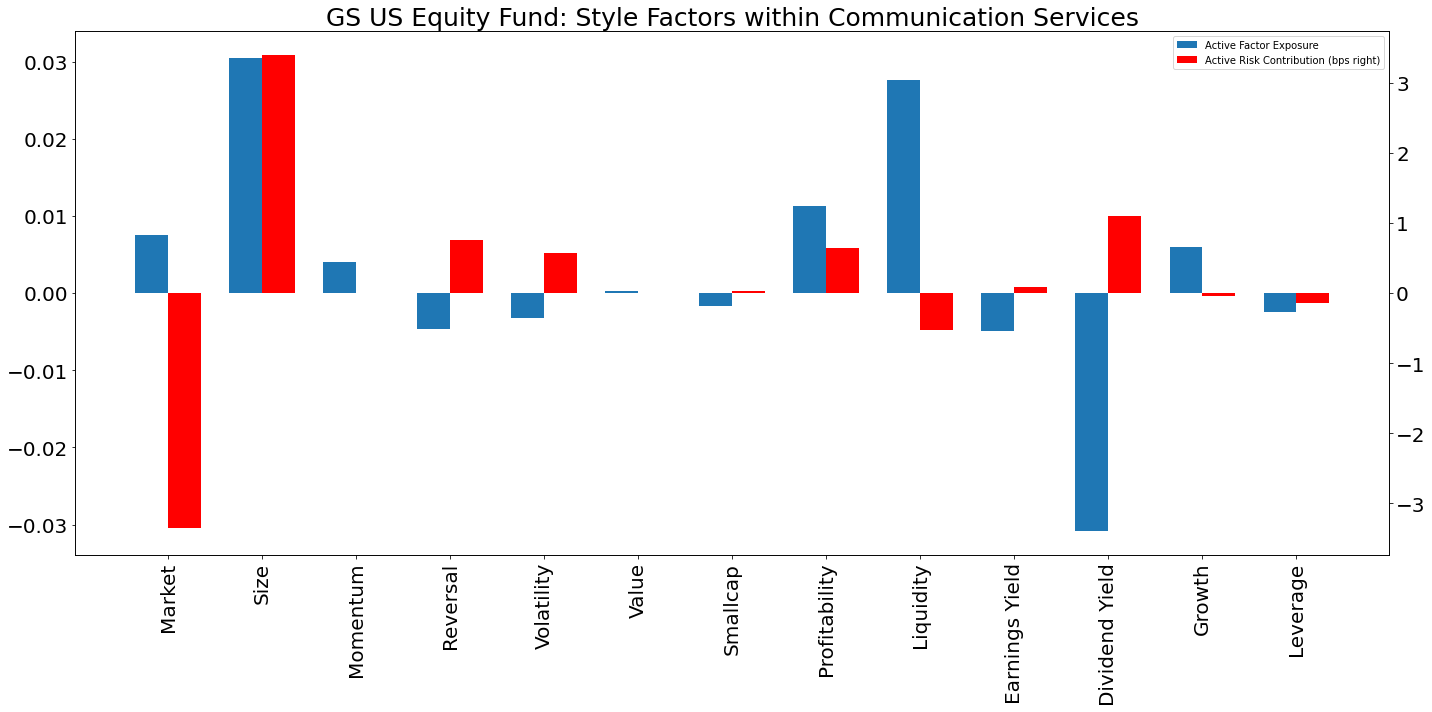

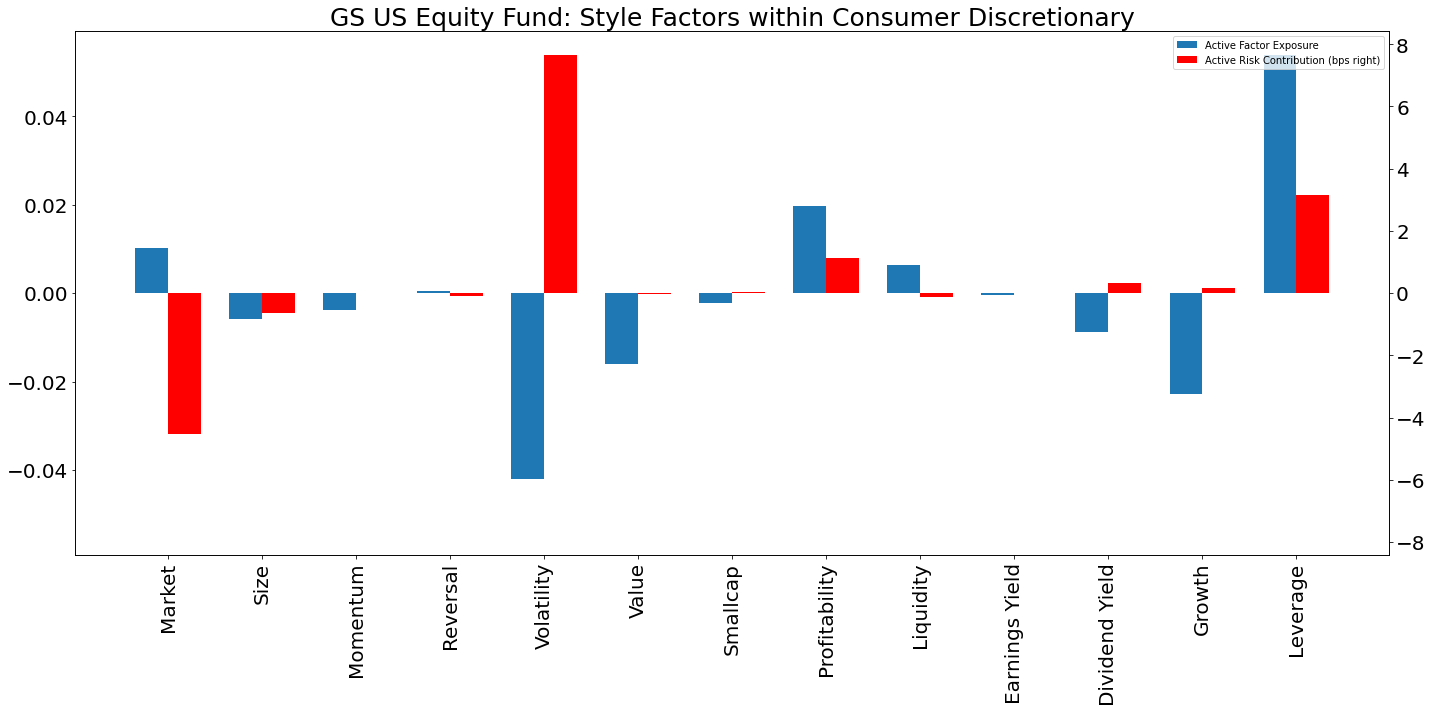

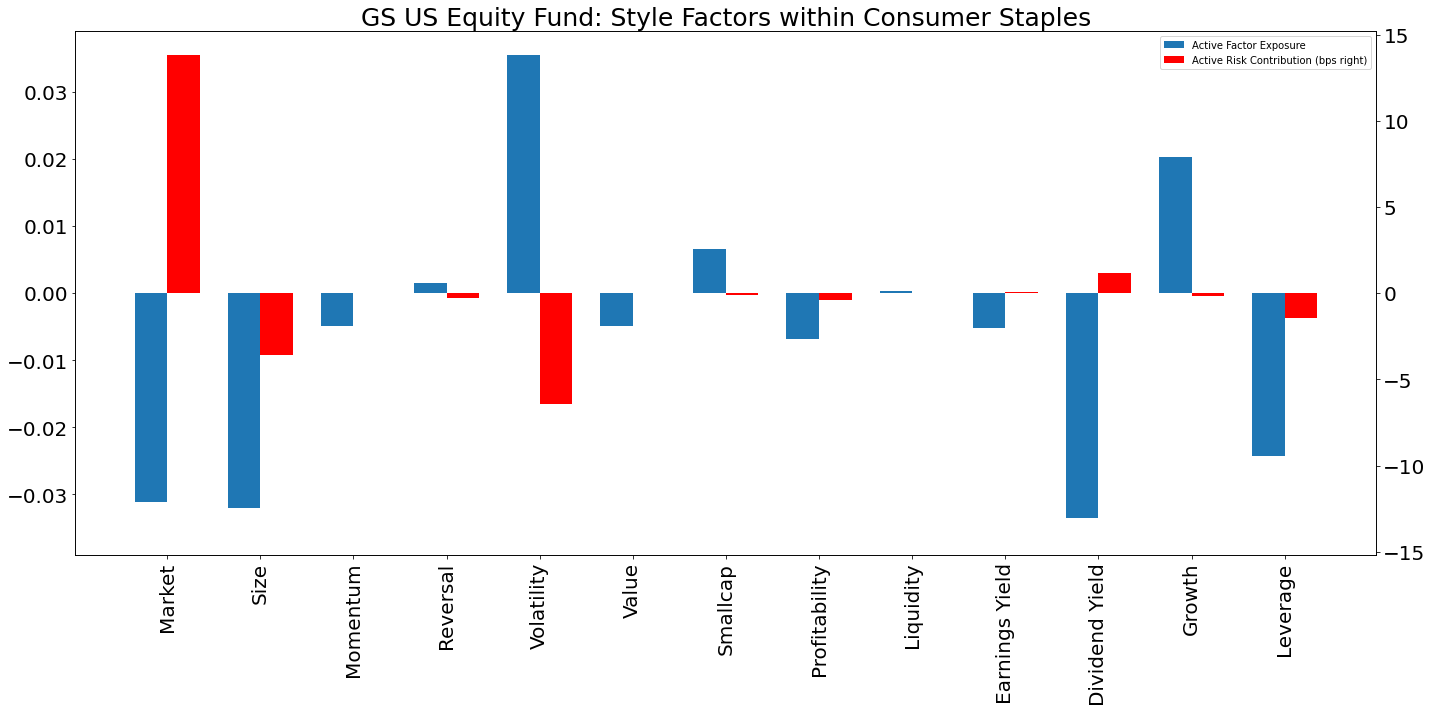

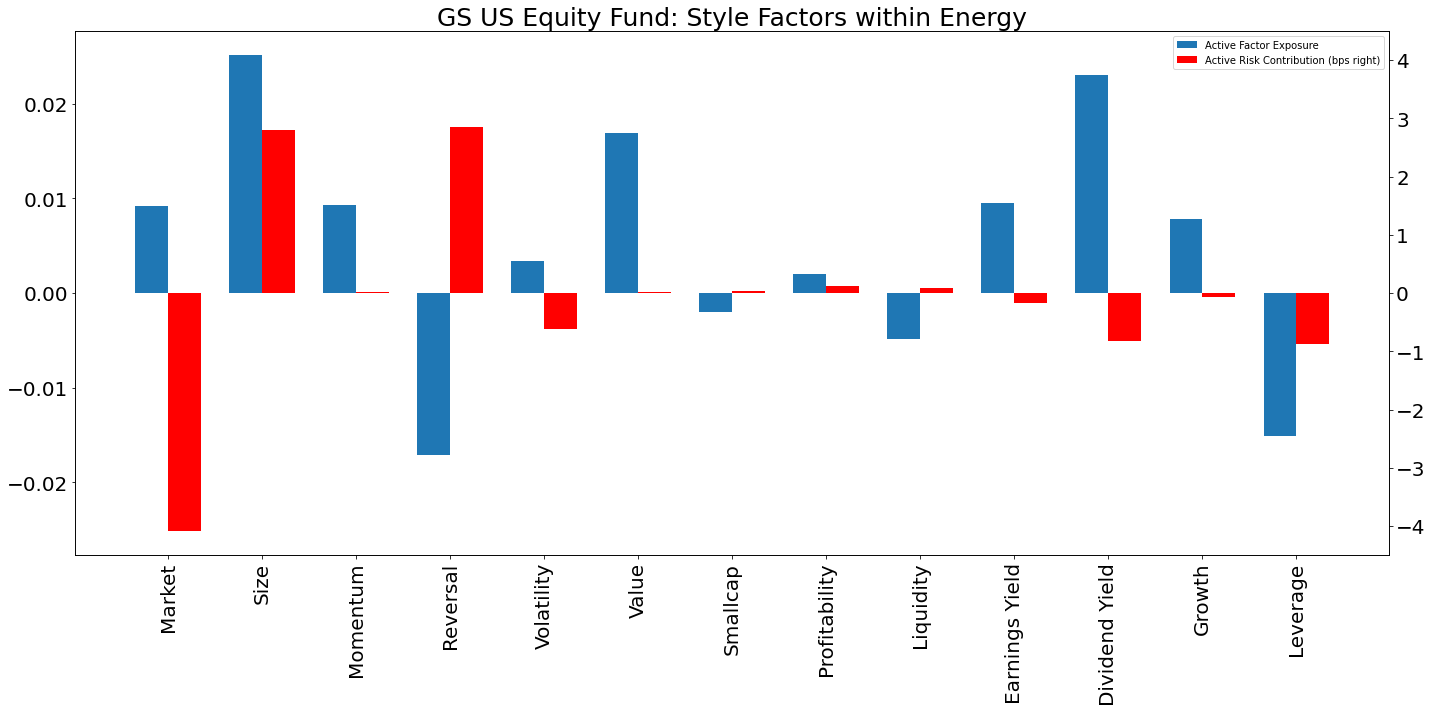

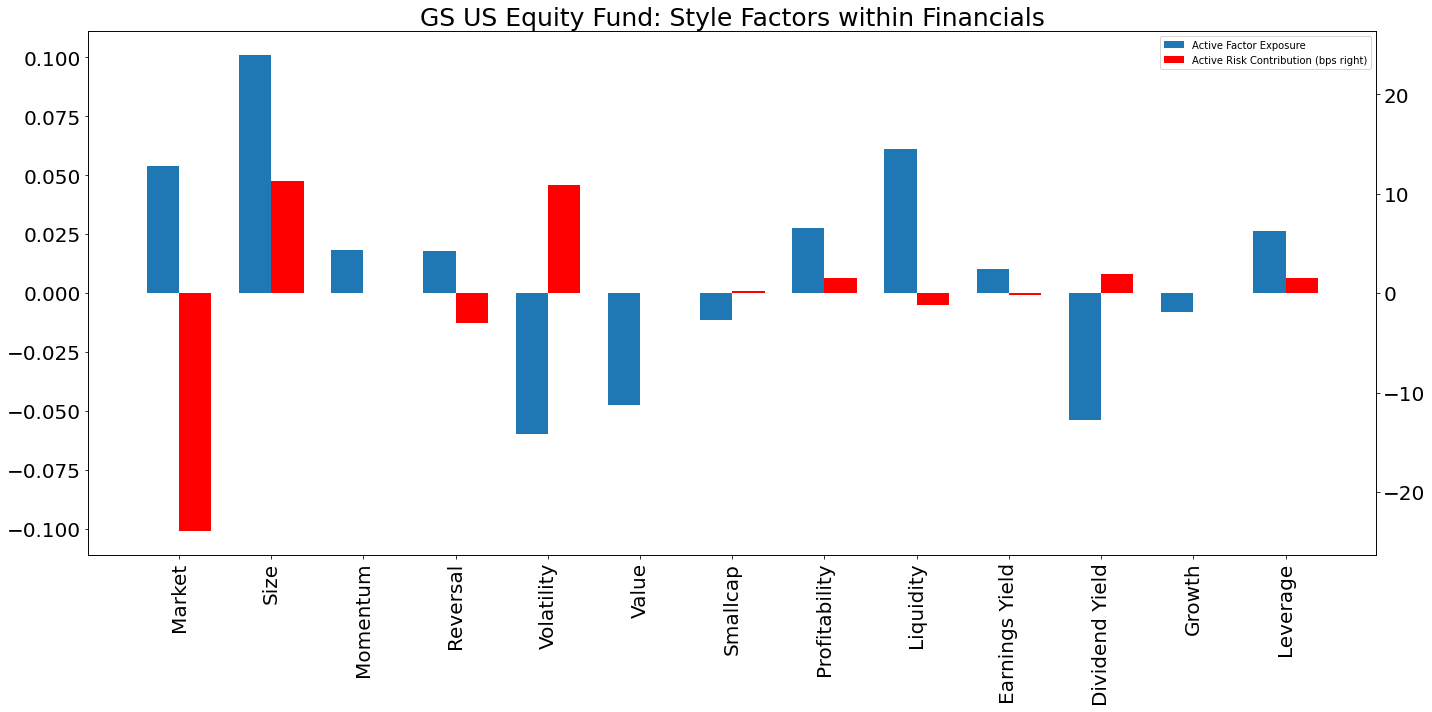

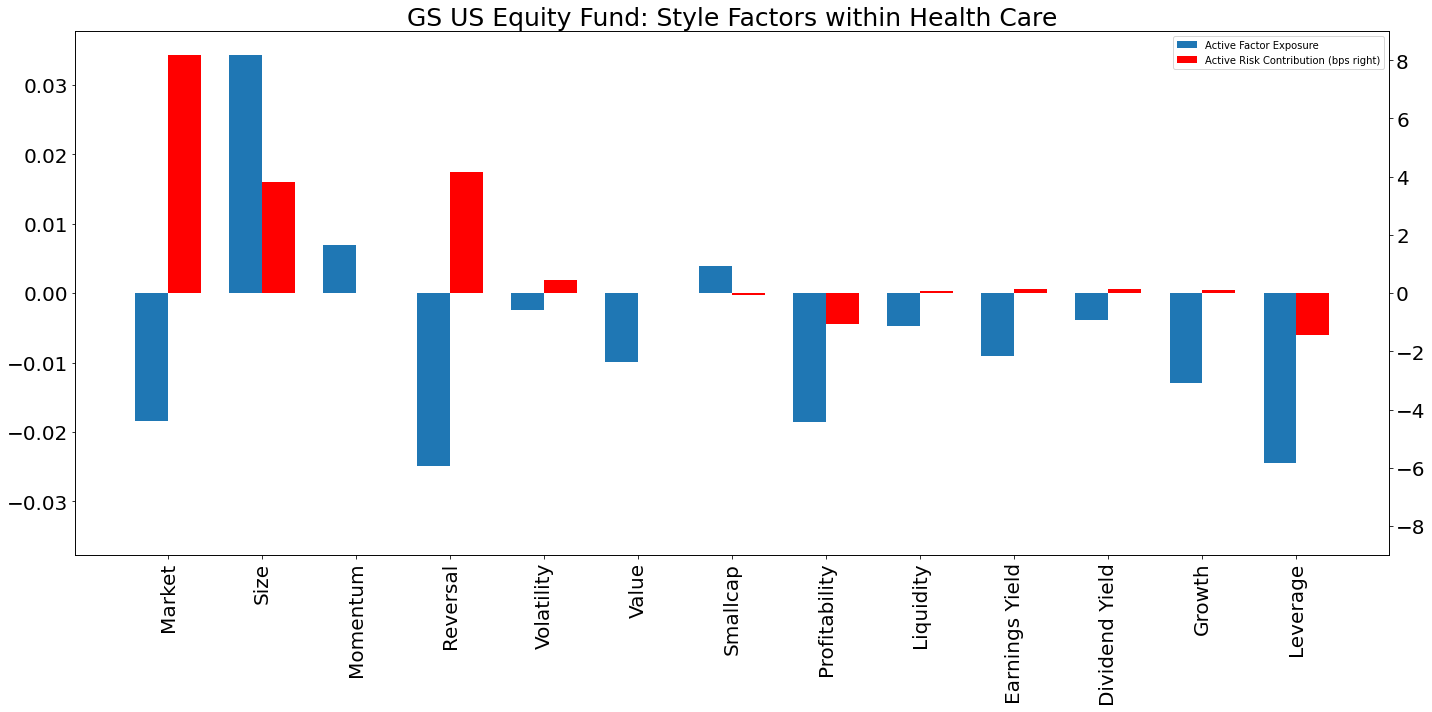

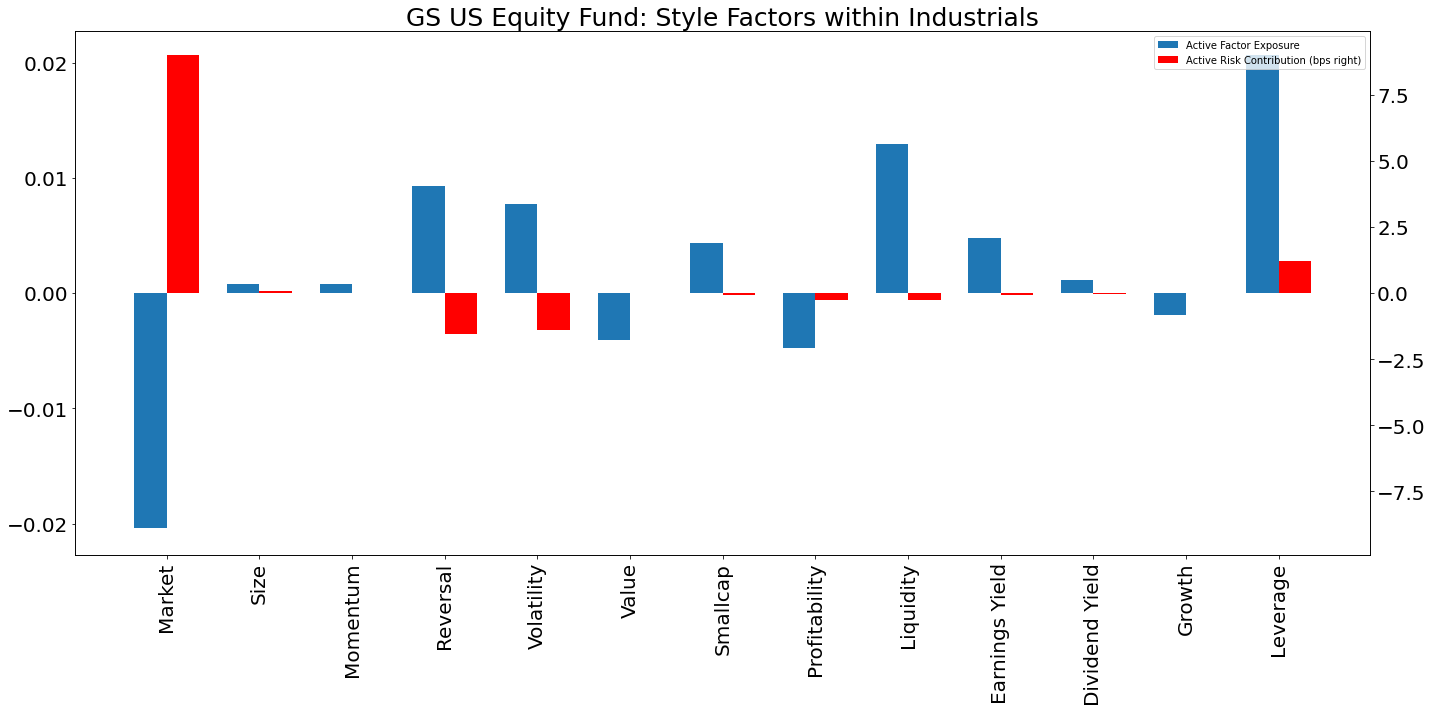

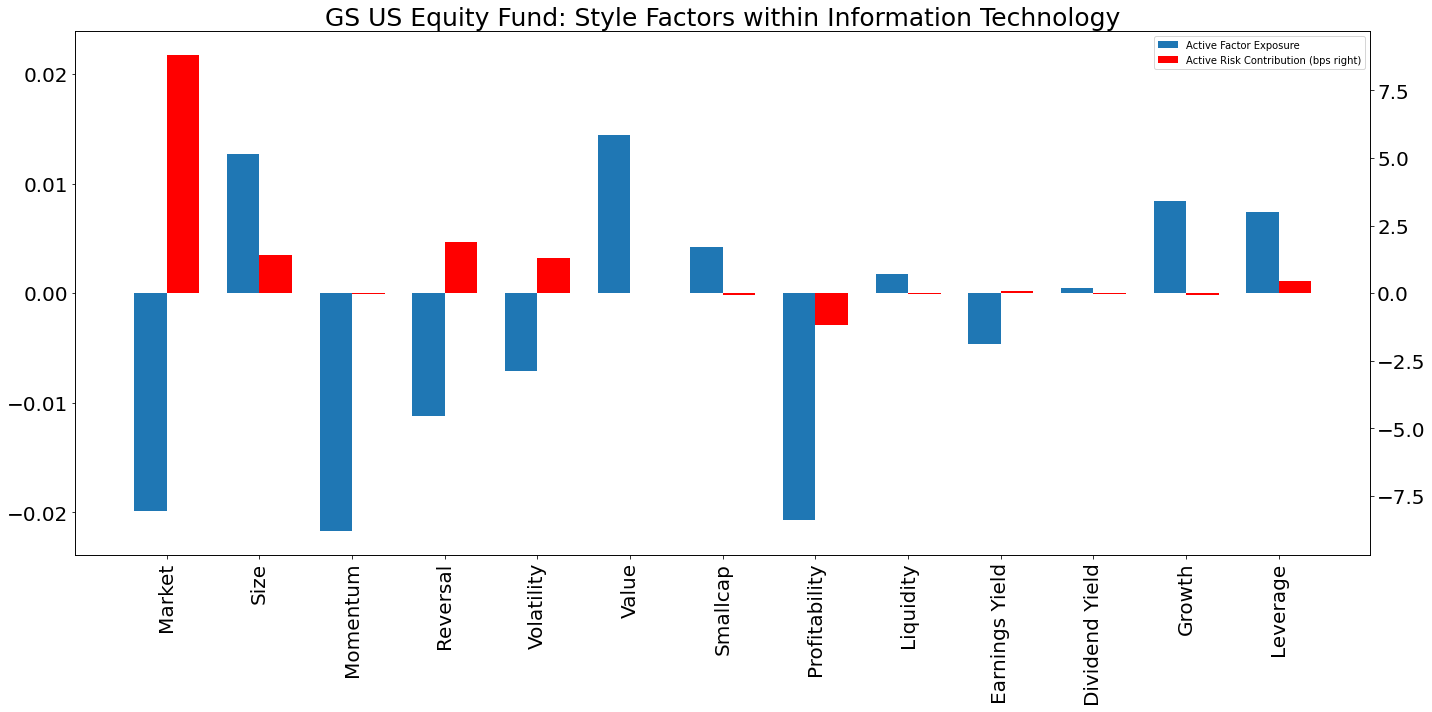

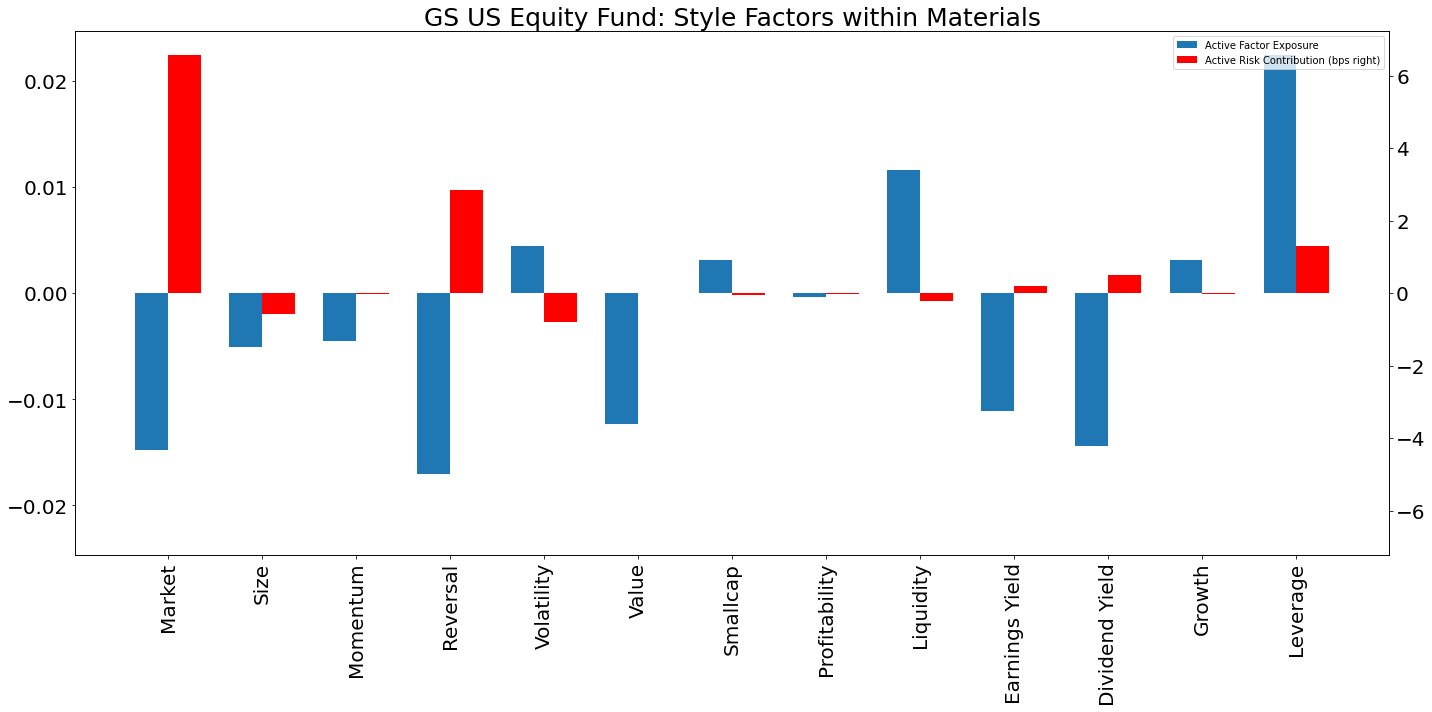

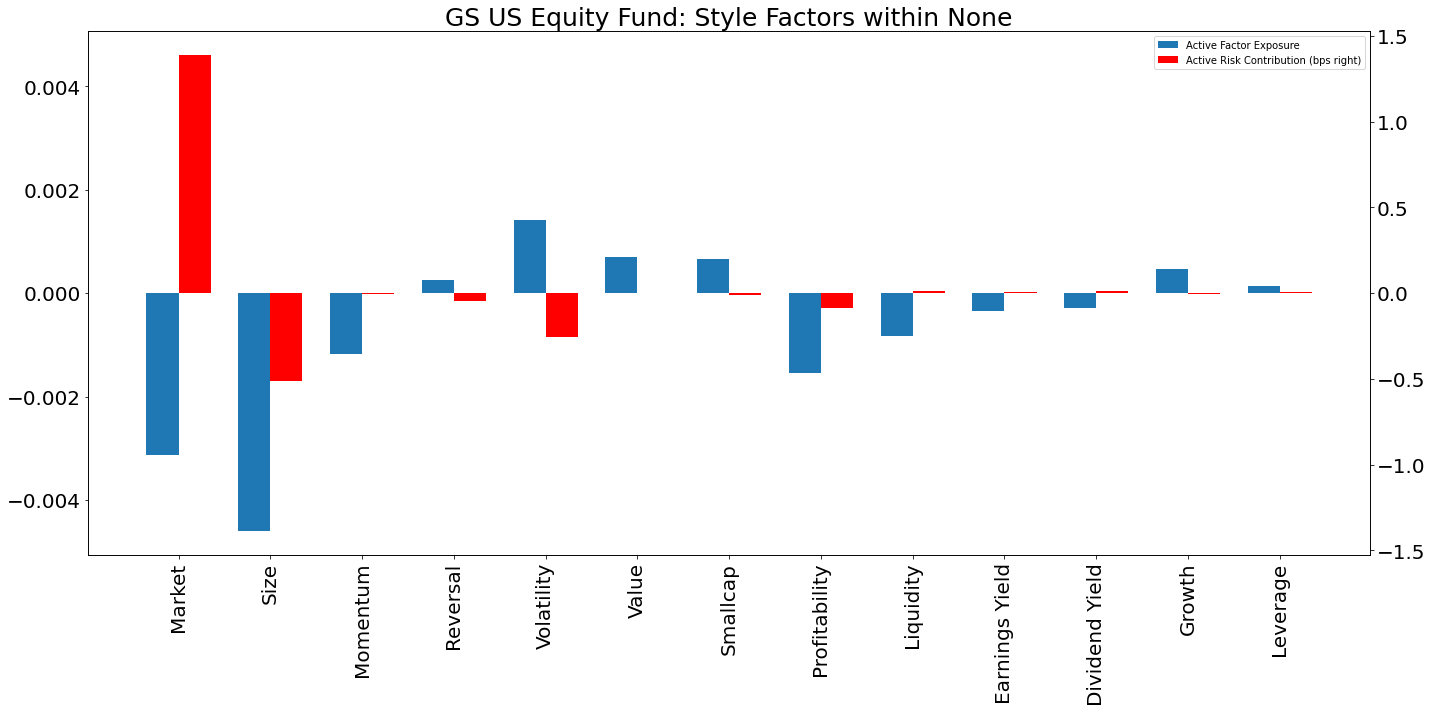

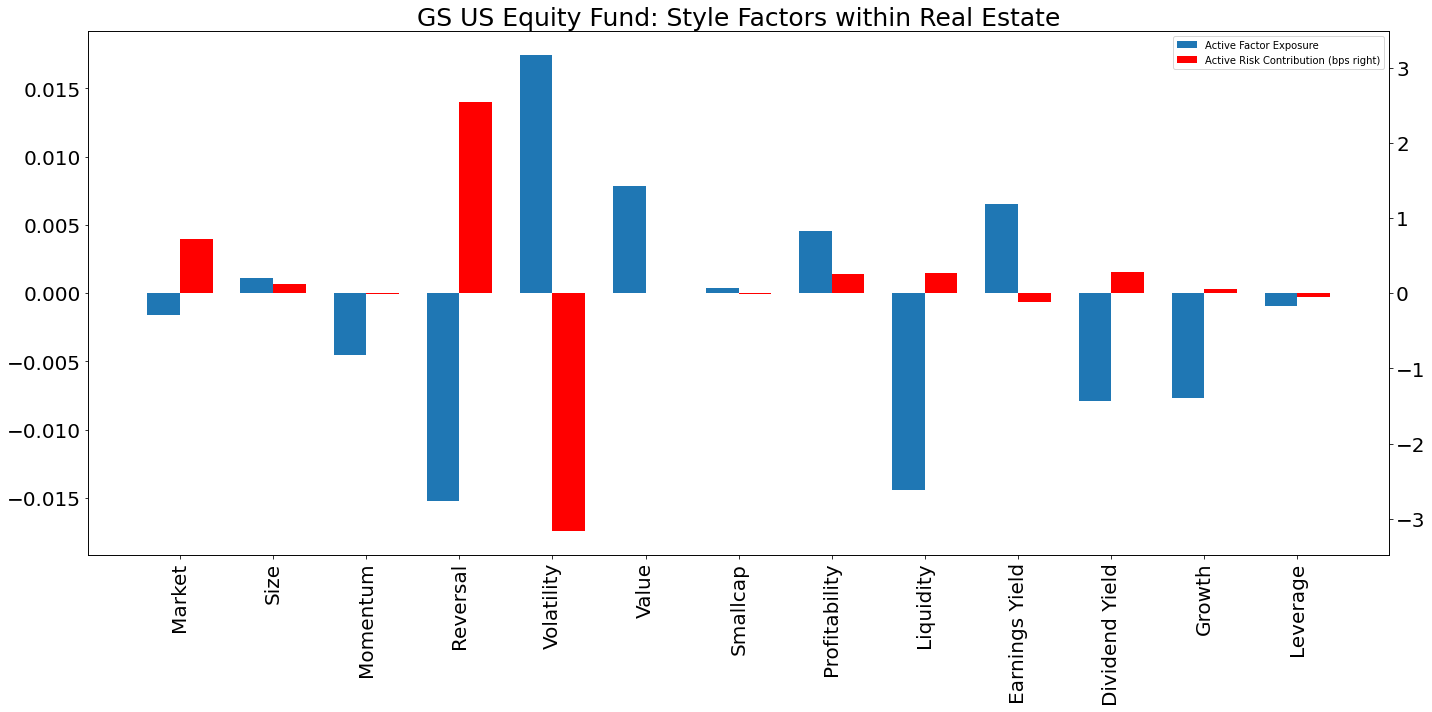

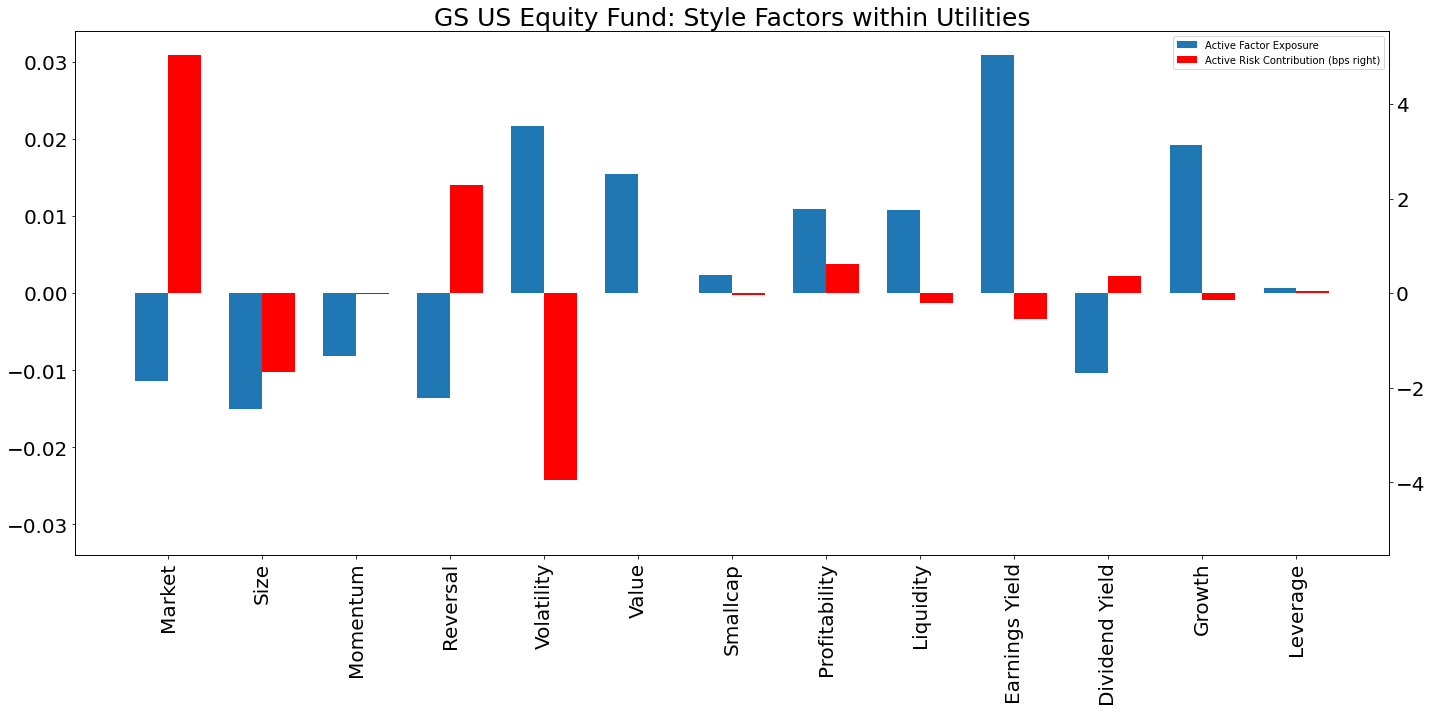

In [157]:
file = 'GS USEQ Sector by Factor 03-17-22.xlsx'
SectorByFactorCharts(file,'GS US Equity Fund')

In [169]:
def SectorByFactorCharts(file,fund):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    for sector in sxf_df['Filter Level 2'].unique():

        if str(sector) == 'nan':
            continue

        mask = (sxf_df['Filter Level 2']==sector)\
                                  &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')

        labels = sxf_df.loc[mask,' Title'].tolist()
        factor_exp = sxf_df.loc[mask,'Active']
        risk_contr = sxf_df.loc[mask,'Active (bp).1']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots(figsize=(20,10))
        ax2 = ax.twinx() 

        if fund != 'GSS':
            rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
            rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
        else:
            rects1 = ax.bar(x - width/2, factor_exp, width, label='Factor Exposure')
            rects2 = ax2.bar(x + width/2, risk_contr, width, label='Risk Contribution (bps right)', color='red',)

        ax.set_title(fund+': Style Factors within ' +sector,fontsize=25);

        ax.set_xticks(x);
        ax.set_xticklabels(labels, rotation='vertical');
        #ax.legend();
        fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
        
        try:
            ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
            ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
        except:
            pass
        #ax.bar_label(rects1, padding=3)
        #ax.bar_label(rects2, padding=3)

        fig.tight_layout()

        plt.show()

        fig.savefig(path+fund+'StyleFactors_' +sector+'.png',format="png")

Text(0.5, 1.0, 'Style Factors within Communication Services')

[Text(0, 0, 'Market'),
 Text(1, 0, 'Size'),
 Text(2, 0, 'Volatility'),
 Text(3, 0, 'Momentum'),
 Text(4, 0, 'Reversal'),
 Text(5, 0, 'Liquidity'),
 Text(6, 0, 'SmallCap'),
 Text(7, 0, 'Value'),
 Text(8, 0, 'Profitability'),
 Text(9, 0, 'Earnings Yield'),
 Text(10, 0, 'Dividend Yield'),
 Text(11, 0, 'Growth'),
 Text(12, 0, 'Leverage'),
 Text(13, 0, 'Sentiment'),
 Text(14, 0, 'Emerging'),
 Text(15, 0, 'Oil')]

(-0.03803744954950829, 0.03803744954950829)

(-1.65904564682203, 1.65904564682203)

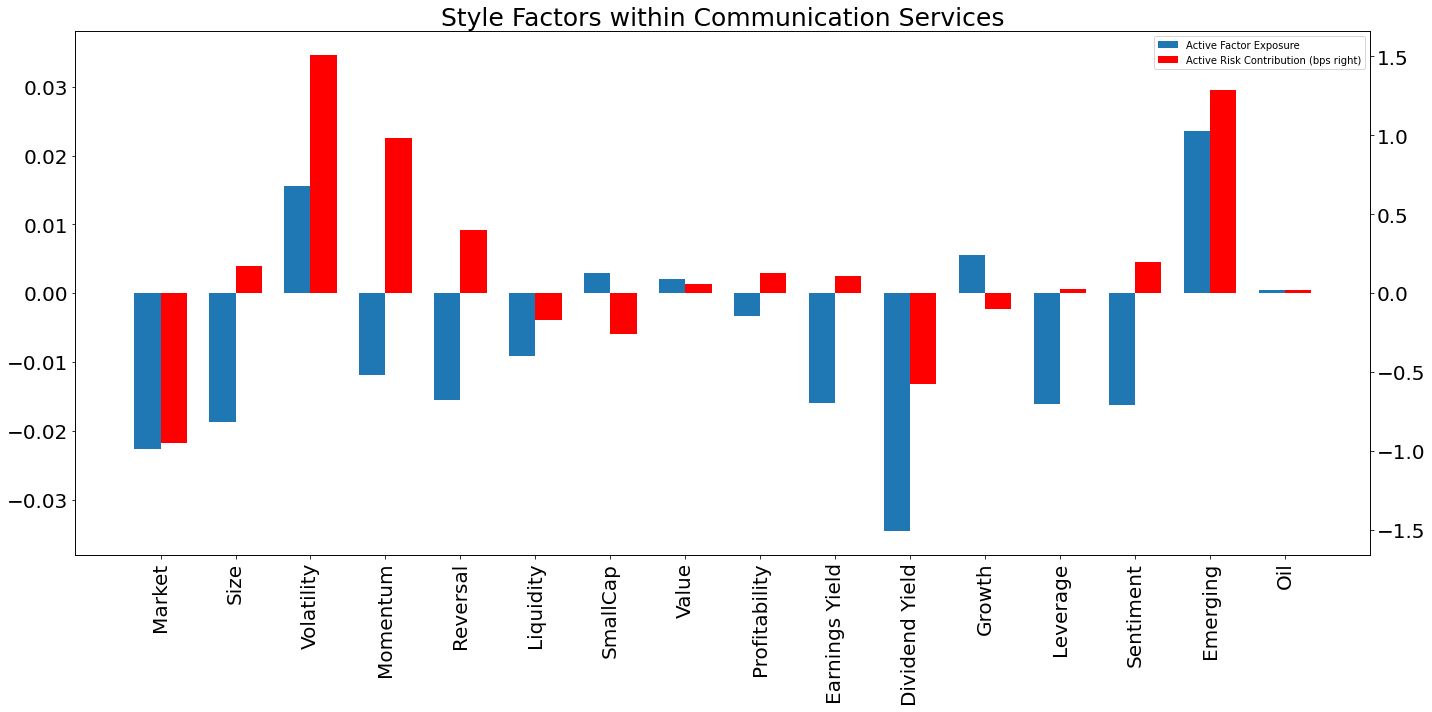

In [104]:
sector ='Communication Services'

mask = (sxf_df['Filter Level 2']==sector)\
                          &(sxf_df['Level']==0)&(sxf_df['Filter Level 3']=='STYLE')
#sector_slice = sxf_df.loc[mask,' Title']

labels = sxf_df.loc[mask,' Title'].tolist()
factor_exp = sxf_df.loc[mask,'Active']
risk_contr = sxf_df.loc[mask,'Active (bp).1']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10));
#ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx(); # C

rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
#ax.secondary_yaxis()
# Add some text for labels, title and custom x-axis tick labels, etc.

#ax.set_ylabel('Active Factor Exposure');
#ax2.set_ylabel('Active Risk Contribution (bps right)');
ax.set_title('Style Factors within ' +sector,fontsize=25);

ax.set_xticks(x);
ax.set_xticklabels(labels, rotation='vertical');
#ax.legend(rects1+rects2,[rects1.get_label(),rects2.get_label()]);
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout();

plt.show();

fig.savefig(path+'StyleFactors_' +sector+'.png',format="png")

In [ ]:
from pptx import Presentation
from pptx.util import Inches

X = Presentation()

Layout = X.slide_layouts[0]
first_slide = X.slides.add_slide(Layout)

first_slide.shapes.title.text = "Creating a powerpoint using Python" first_slide.placeholders[1].text = "Created by Tutorialpoints"

X.save("First_presentation.pptx")

Second_Layout = X.slide_layouts[5]
second_slide = X.slides.add_slide(Second_Layout)
second_slide.shapes.title.text = "Second slide"

textbox = second_slide.shapes.add_textbox(Inches(3), Inches(1.5),Inches(3), Inches(1)) textframe = textbox.text_frame
paragraph = textframe.add_paragraph()
paragraph.text = "This is a paragraph in the second slide!"

X.save("First_presentation.pptx")

In [166]:
path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
file = 'PIF Factor based analysis.xlsx'
sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

C:\Users\jknechtel\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [112]:
def FactorCharts(file,byfactor=True):
    path = "C:/Users/jknechtel/Documents/Equity Risk Modeling/"
    #file = 'ONGSINTL Sector by Factor 03-17-22.xlsx'
    sxf_df = pd.read_excel(path+file,skiprows=3,skipfooter=3)

    if "PIF" in file:
        rmodel = 'CAND Style'
        fund = 'PIF'
    elif "DDF" in file:
        rmodel = 'CAND Style'
        fund = 'DDF'
    elif "INTL" in file:    
        rmodel = 'WRLD Style'
        fund = 'GS International'
    elif "GSS" in file:    
        rmodel = 'WRLD Style'
        fund = 'GSS'
    elif "USEQ" in file:
        rmodel = 'USAM Style'
        fund = 'US Equity Fund'
    else:
        print('Can\'t find fund!')
    
    if byfactor:
        mask = (sxf_df['Level']==0)&(sxf_df['Filter Level 3']==rmodel)
    else:
        mask = (sxf_df['Level']==3) #&(sxf_df['Filter Level 3']==rmodel)

    labels = sxf_df.loc[mask,' Title'].tolist()
    factor_exp = sxf_df.loc[mask,'Active']
    risk_contr = sxf_df.loc[mask,'Active (bp).1']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(20,10))
    ax2 = ax.twinx() 

    if fund != 'GSS':
        rects1 = ax.bar(x - width/2, factor_exp, width, label='Active Factor Exposure')
        rects2 = ax2.bar(x + width/2, risk_contr, width, label='Active Risk Contribution (bps right)', color='red',)
    else:
        rects1 = ax.bar(x - width/2, factor_exp, width, label='Factor Exposure')
        rects2 = ax2.bar(x + width/2, risk_contr, width, label='Risk Contribution (bps right)', color='red',)
        
    if byfactor:
        ax.set_title(fund+': Risk Break-down by Style Factors',fontsize=25);
    else:
        ax.set_title(fund+': Risk by Broad Categories',fontsize=25);

    ax.set_xticks(x);
    ax.set_xticklabels(labels, rotation='vertical');
    #ax.legend();
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

    try:
        ax.set_ylim(-factor_exp.abs().max()*1.1,factor_exp.abs().max()*1.1);
        ax2.set_ylim(-risk_contr.abs().max()*1.1,risk_contr.abs().max()*1.1);
    except:
        pass
    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

    if byfactor:
        fig.savefig(path+fund+'StyleFactors.png',format="png")
    else:
        fig.savefig(path+fund+'MainRisks.png',format="png")        

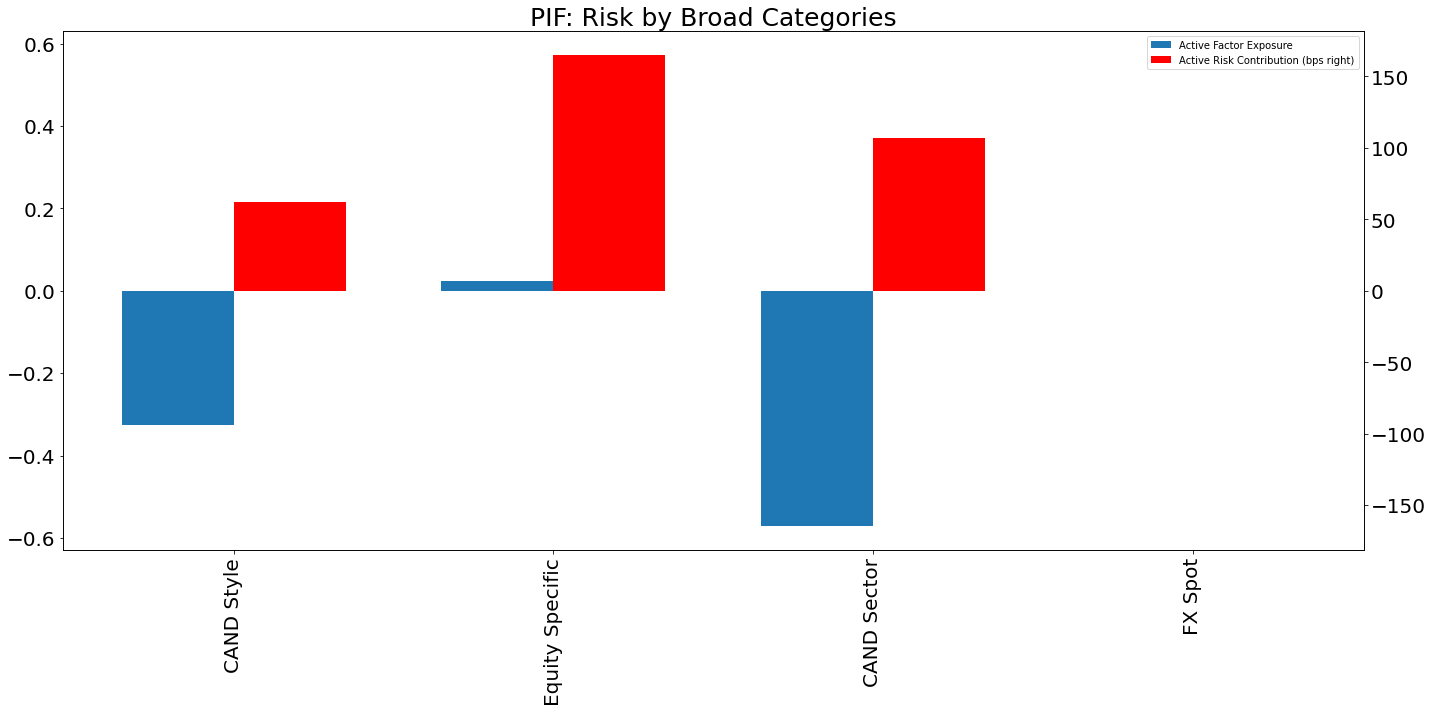

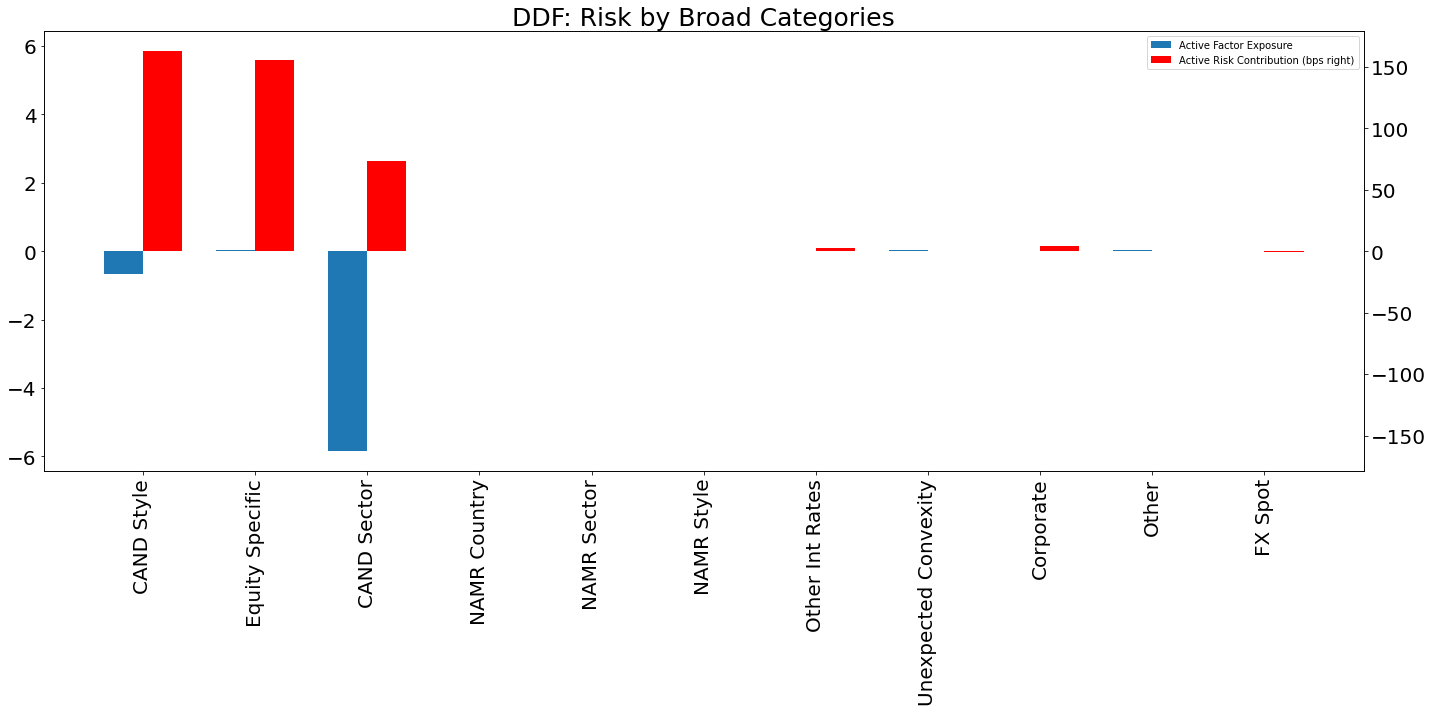

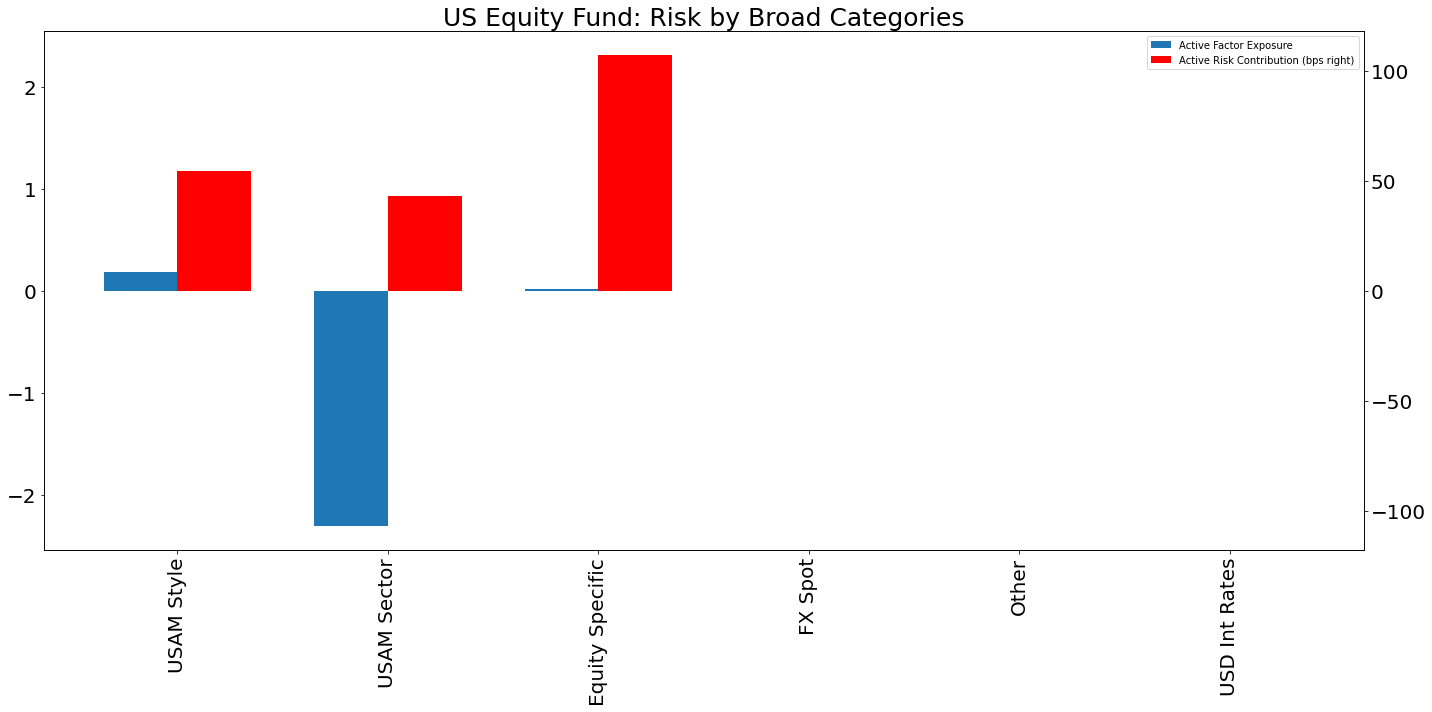

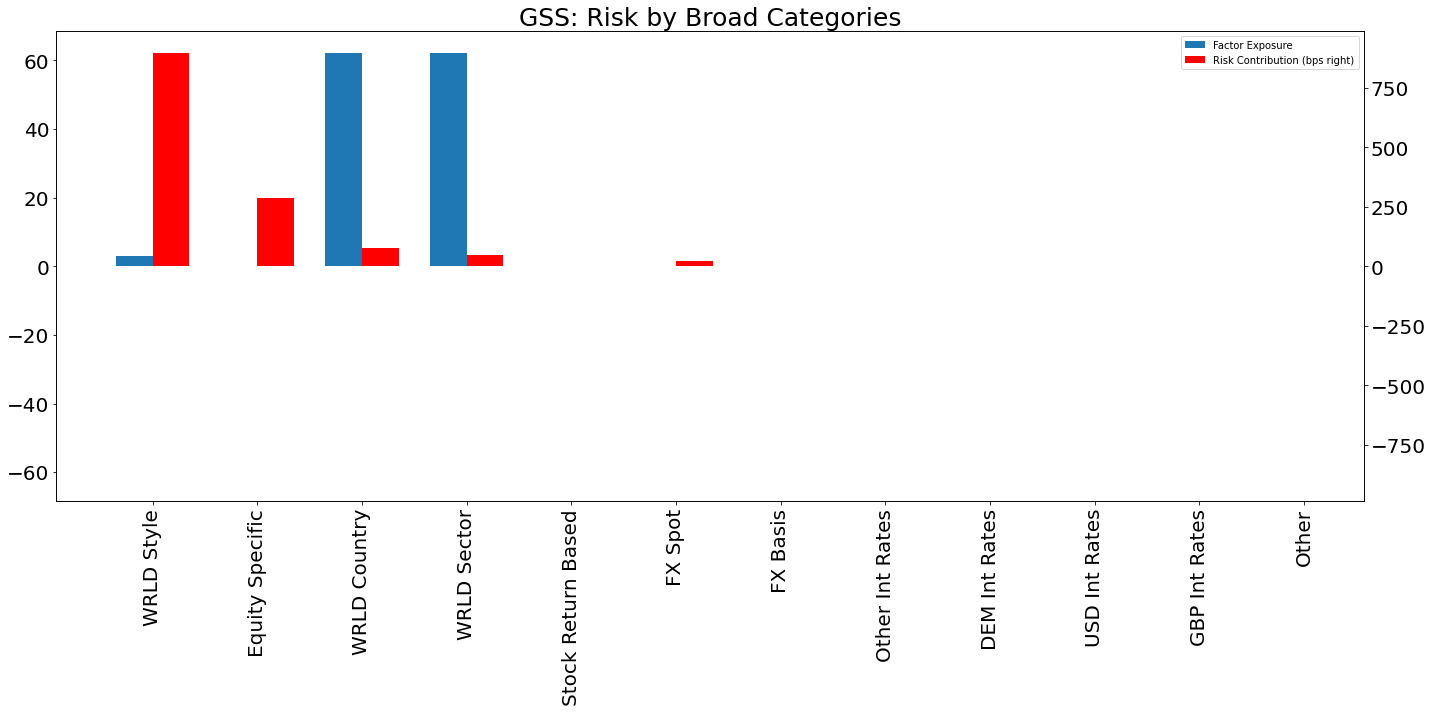

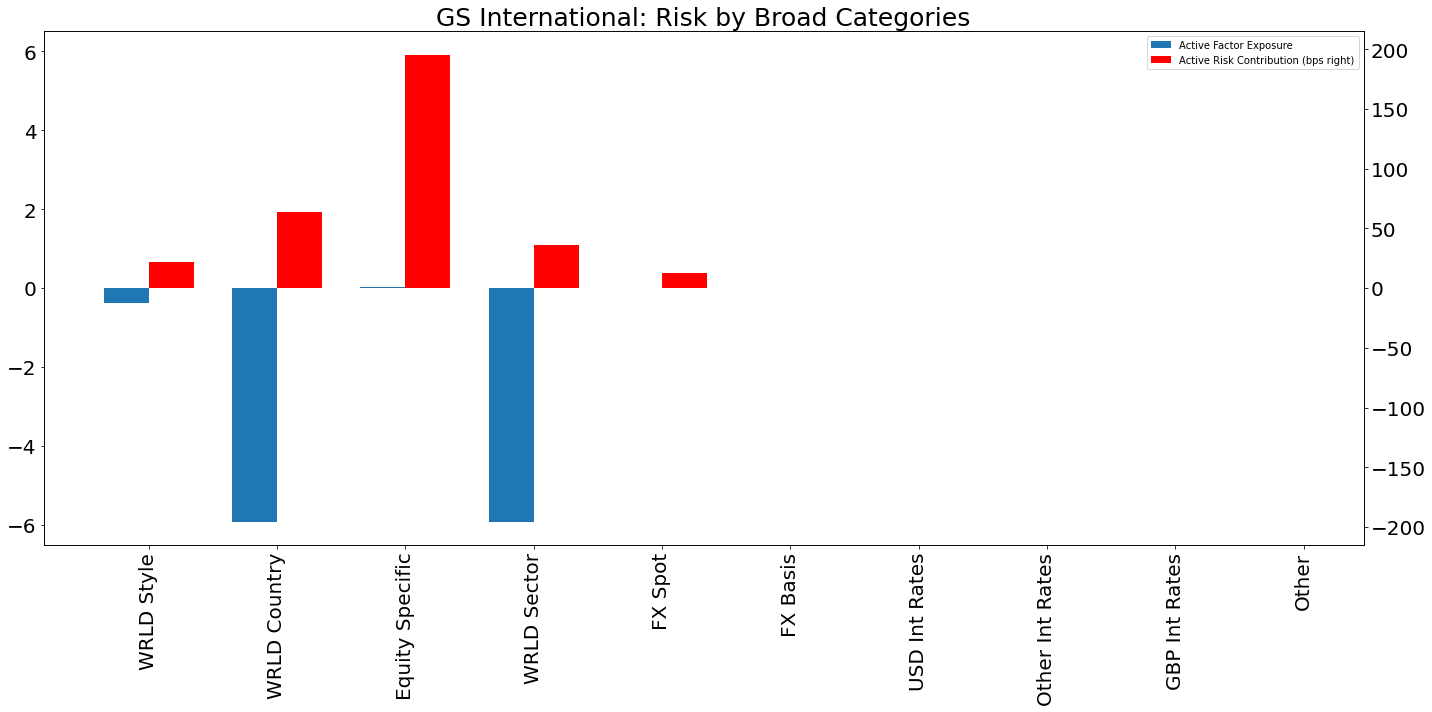

In [113]:
FactorCharts('PIF Factor based analysis.xlsx',False)
FactorCharts('DDF Factor based analysis.xlsx',False)
FactorCharts('USEQ Factor based analysis.xlsx',False)
FactorCharts('GSS Factor based analysis.xlsx',False)
FactorCharts('INTL Factor based analysis.xlsx',False)

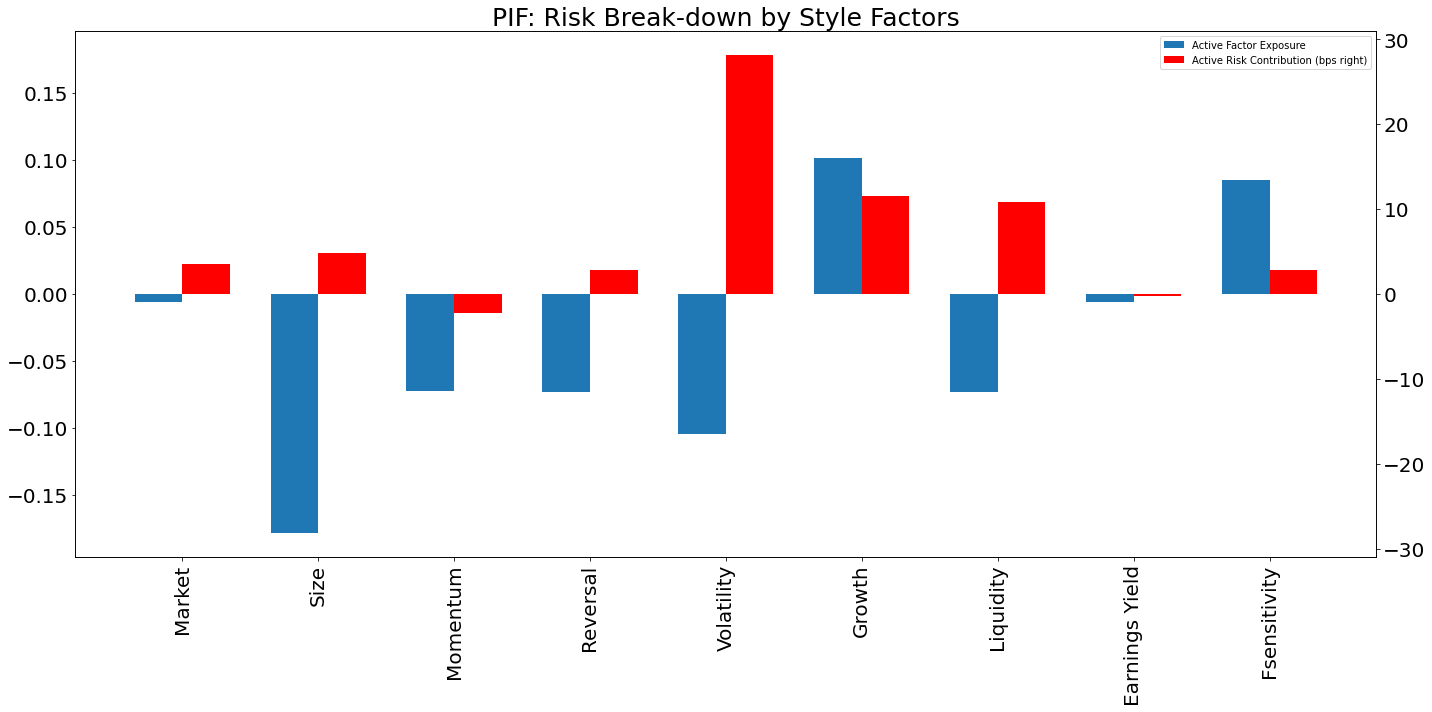

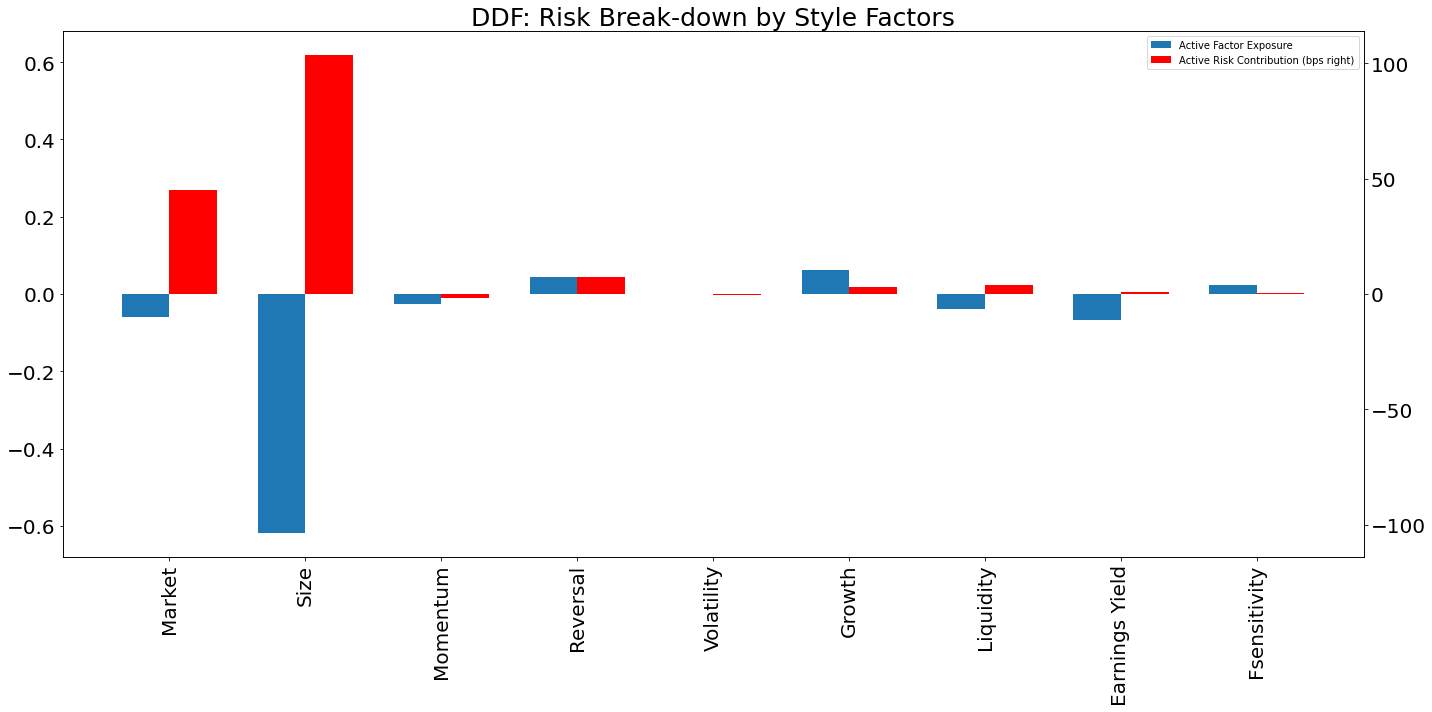

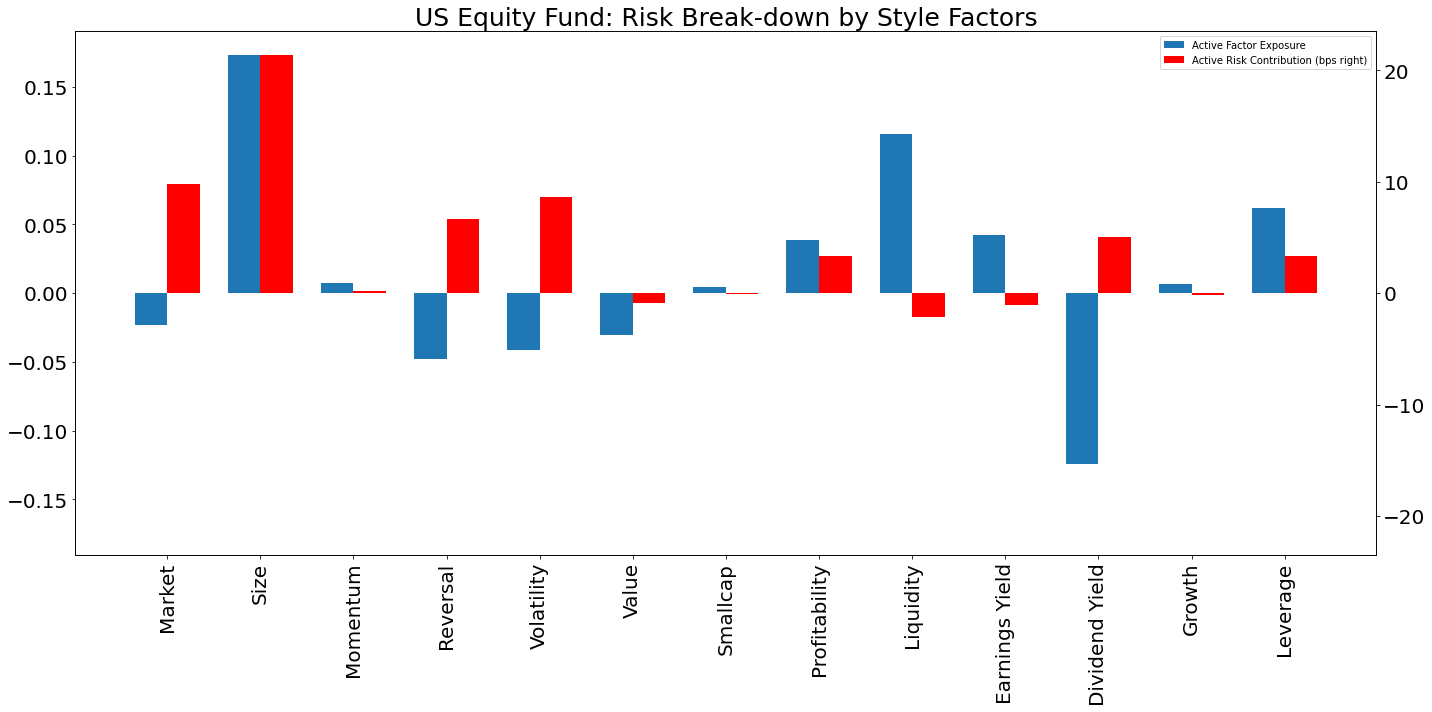

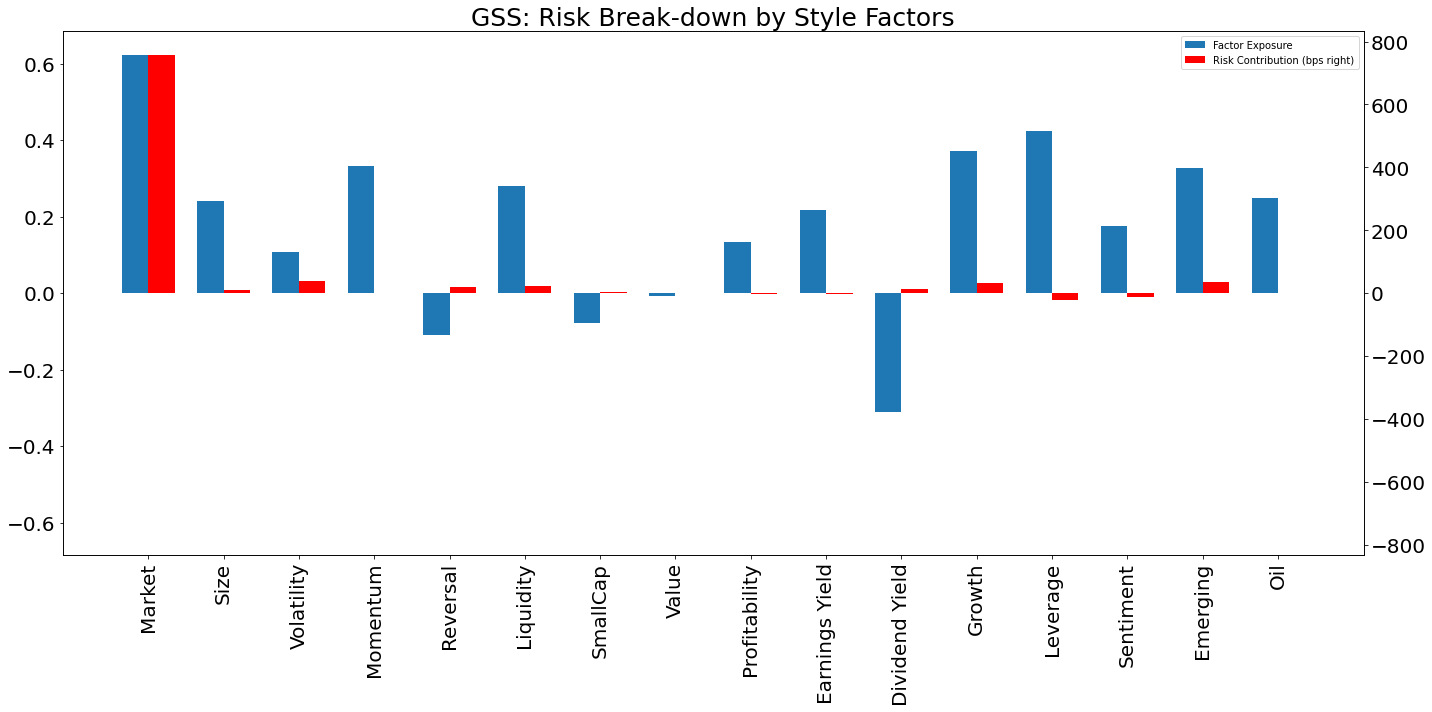

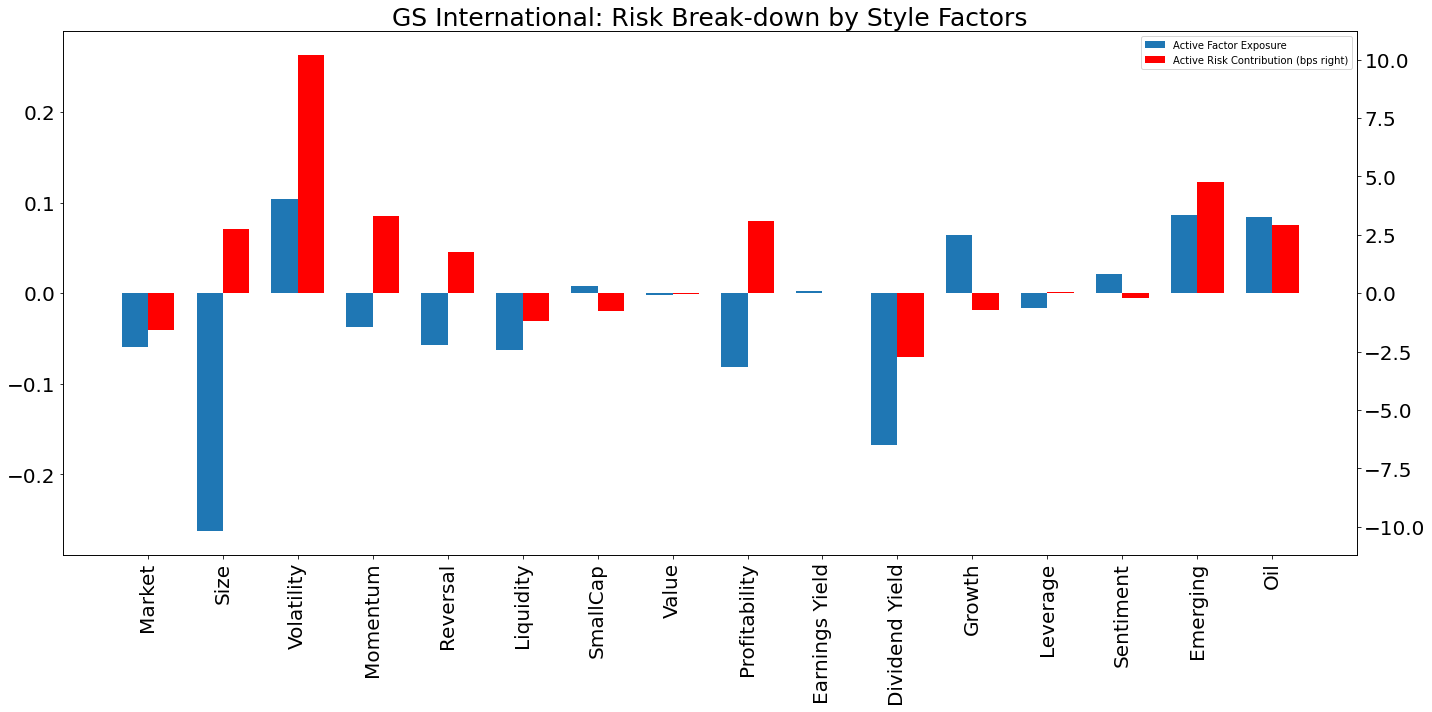

In [114]:
FactorCharts('PIF Factor based analysis.xlsx',True)
FactorCharts('DDF Factor based analysis.xlsx',True)
FactorCharts('USEQ Factor based analysis.xlsx',True)
FactorCharts('GSS Factor based analysis.xlsx',True)
FactorCharts('INTL Factor based analysis.xlsx',True)

In [168]:
sxf_df.loc[sxf_df['Level']==2]

Title Filter Level 1    Filter Level 2 Filter Level 3  Level  \
1              Equity          ONPIF            Equity            NaN    2.0   
145  Foreign Exchange          ONPIF  Foreign Exchange            NaN    2.0   
158              Time          ONPIF              Time            NaN    2.0   
160     Other Returns          ONPIF     Other Returns            NaN    2.0   
162    Base Risk-free          ONPIF    Base Risk-free            NaN    2.0   

    Factor Type  Factor Level  Factor Vol  Portfolio  Benchmark  Active  \
1           NaN           NaN         NaN        NaN        NaN     NaN   
145         NaN           NaN         NaN        NaN    4.1e-19 6.6e-18   
158         NaN           NaN         NaN     0.0019    0.00051  0.0014   
160         NaN           NaN         NaN        NaN        NaN     NaN   
162         NaN           NaN         NaN        NaN        NaN     NaN   

     Portfolio (bp)  Benchmark (bp)  Active (bp)  Portfolio (bp).1  \
1           1.5e+03         1.6e+03      3.5e+02           1.5e+03   
145         0.00094            0.31         0.31          -0.00045   
158             NaN             NaN          NaN               NaN   
160             NaN             NaN          NaN               NaN   
162             NaN             NaN          NaN               NaN   

     Benchmark (bp).1  Active (bp).1  Active Average Factor Exposure(1 MTD)  \
1             1.6e+03        3.5e+02                                    NaN   
145             -0.16         -0.092                                    NaN   
158               NaN            NaN                                    NaN   
160               NaN            NaN                                    NaN   
162               NaN            NaN                                    NaN   

     Factor P&L(1 MTD)  Active Factor Return Contribution(1 MTD) (bp)  
1              2.3e+06                                        4.9e+01  
145              2e+02                                         0.0044  
158                NaN                                            NaN  
160           -1.4e+03                                         -0.031  
162              1e+05                                            2.3